<a href="https://colab.research.google.com/github/nailaimtiyaz/TedTalk_Views_Almabetter/blob/main/Tedtalk_view_prediction_Almabetter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name**


Project Type - Regression
Contribution - Individual
Team Member 1 - Naila Imtiyaz
Team Member 2 -
Team Member 3 -
Team Member 4 -

## **Project Summary**

Predicting the exact number of views for a TED Talk is a challenging task, but you can estimate potential views by considering various factors:

Speaker's Popularity: Well-known speakers tend to attract more viewers.

Topic Relevance: Talks on popular or trending topics are more likely to get views.

Quality of Content: High-quality, engaging content is more shareable and viewable.

Promotion: TED's promotion, as well as speaker and organization efforts, can impact views.

Social Sharing: Social media shares, likes, and comments can indicate a talk's popularity.

Recommendations: TED's algorithms suggest talks to viewers based on their interests and past views.

Length: Shorter talks may have wider appeal, but longer talks can succeed if engaging.

Timeliness: Talks addressing current events may attract more viewers.

To predict views, gather data on these factors and use machine learning models to estimate potential views for a new TED Talk. However, predictions are uncertain, and audience reactions can be unpredictable. TED's platform and algorithms may also change over time, affecting viewership patterns.



my main objective is to build a predictive model to predict the number of views for the respective videos from the TEDx website.
As i have a continous variable to predict, i use regression models to predict the views of the TED talks.


## **GitHub Link-**

##**<u>Steps to follow:</u>**
##**1)Data loading**
##**2)Data Cleaning**
##**3)EDA**
##**4)Feature engineering**
##**5)Model buliding**
##**6)Evaluation of models**



In [ ]:
  # Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Loading the data**

In [ ]:
#Importing the dataset

#tedtalk_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/capstone 2/data_ted_talks.csv')

tedtalk_df = pd.read_csv('//content/drive/MyDrive/data_ted_talks.csv')

In [ ]:
tedtalk_df.head(3)

talk_id                            title     speaker_1  \
0        1      Averting the climate crisis       Al Gore   
1       92  The best stats you've ever seen  Hans Rosling   
2        7                 Simplicity sells   David Pogue   

          all_speakers                                    occupations  \
0       {0: 'Al Gore'}                      {0: ['climate advocate']}   
1  {0: 'Hans Rosling'}  {0: ['global health expert; data visionary']}   
2   {0: 'David Pogue'}                  {0: ['technology columnist']}   

                                      about_speakers     views recorded_date  \
0  {0: 'Nobel Laureate Al Gore focused the world’...   3523392    2006-02-25   
1  {0: 'In Hans Rosling’s hands, data sings. Glob...  14501685    2006-02-22   
2  {0: 'David Pogue is the personal technology co...   1920832    2006-02-24   

  published_date    event native_lang  \
0     2006-06-27  TED2006          en   
1     2006-06-27  TED2006          en   
2     2006-06-27  TED2006          en   

                                      available_lang  comments  duration  \
0  ['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...     272.0       977   
1  ['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...     628.0      1190   
2  ['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...     124.0      1286   

                                              topics  \
0  ['alternative energy', 'cars', 'climate change...   
1  ['Africa', 'Asia', 'Google', 'demo', 'economic...   
2  ['computers', 'entertainment', 'interface desi...   

                                       related_talks  \
0  {243: 'New thinking on the climate crisis', 54...   
1  {2056: "Own your body's data", 2296: 'A visual...   
2  {1725: '10 top time-saving tech tips', 2274: '...   

                                                 url  \
0  https://www.ted.com/talks/al_gore_averting_the...   
1  https://www.ted.com/talks/hans_rosling_the_bes...   
2  https://www.ted.com/talks/david_pogue_simplici...   

                                         description  \
0  With the same humor and humanity he exuded in ...   
1  You've never seen data presented like this. Wi...   
2  New York Times columnist David Pogue takes aim...   

                                          transcript  
0  Thank you so much, Chris. And it's truly a gre...  
1  About 10 years ago, I took on the task to teac...  
2  (Music: "The Sound of Silence," Simon & Garfun...

In [ ]:
tedtalk_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [ ]:
tedtalk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [ ]:
tedtalk_df.shape

(4005, 19)

We can observe that we have 4005 rows of data a=with 19 variables. Before starting with the EDA, we need to clean the data.

##**Data Cleaning**

In [ ]:
def missing_values_table(df):
        mis_val =df.isna().sum()
        mis_val_percent = 100 *df.isna().sum() / len(df)
        mz_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table.sort_values('% of Total Values', ascending=False).round(1)
        print (" selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]),"\n\n")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_values_table(tedtalk_df)

 selected dataframe has 19 columns and 4005 




Missing Values  % of Total Values Data Type
comments                   655               16.4   float64
occupations                522               13.0    object
about_speakers             503               12.6    object
all_speakers                 4                0.1    object
recorded_date                1                0.0    object
talk_id                      0                0.0     int64
description                  0                0.0    object
url                          0                0.0    object
related_talks                0                0.0    object
topics                       0                0.0    object
duration                     0                0.0     int64
event                        0                0.0    object
available_lang               0                0.0    object
native_lang                  0                0.0    object
title                        0                0.0    object
published_date               0                0.0    object
views                        0                0.0     int64
speaker_1                    0                0.0    object
transcript                   0                0.0    object

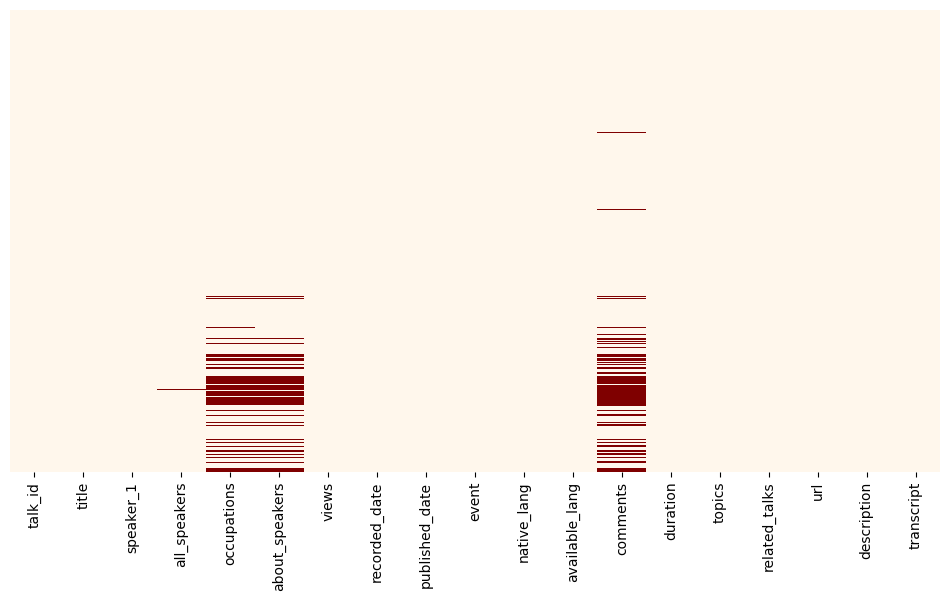

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(tedtalk_df.isnull(),cbar=False,yticklabels=False,cmap='OrRd');

We can see that we have missing values in several columns which needs to be treated after EDA.

Here many columns have the data in the form of a string and dictionaries. To access the data and to build model, we should have cleaned data which can be easily accessed. So we are converting all columns to its proper datatype.

In [ ]:
tedtalk_df['occupations'].fillna(str({0:['other']}),inplace=True)
#filling NA with other

tedtalk_df['occupations'] = tedtalk_df.apply(lambda row: eval(row['occupations']), axis=1)
#to convert from str to dict

tedtalk_df['occupations'] = tedtalk_df['occupations'].apply(lambda x: x.get(0))
#to extract the dict values

tedtalk_df['about_speakers'].fillna(str({0:'Not specified'}),inplace=True)
#filling the NA's with 'Not specified'

tedtalk_df['about_speakers'] = tedtalk_df.apply(lambda row: eval(row['about_speakers']), axis=1)
#to convert from str to dict

tedtalk_df['about_speakers'] = tedtalk_df['about_speakers'].apply(lambda x: x.get(0))
#to extract the dict values

tedtalk_df['recorded_date'].fillna(tedtalk_df['recorded_date'].mode()[0],inplace=True)
#since dates are kind of discrete vaariables, we replace NA with mode.

tedtalk_df['available_lang'] = tedtalk_df['available_lang'].apply(lambda row: eval(row))
tedtalk_df['topics'] = tedtalk_df['topics'].apply(lambda row: eval(row))
tedtalk_df['related_talks'] = tedtalk_df['related_talks'].apply(lambda row: eval(row))
#converting all the remaining columns which were in strings to their respective datatypes.


In [ ]:
tedtalk_df.drop(['talk_id','all_speakers','url'],axis=1,inplace=True)

These columns are deleted as its not carrying much significance.

In [ ]:
tedtalk_df.info()
#Apart from the numeric column we are going to deal with all other missing values as its usefull for the EDA.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           4005 non-null   object 
 1   speaker_1       4005 non-null   object 
 2   occupations     4005 non-null   object 
 3   about_speakers  4005 non-null   object 
 4   views           4005 non-null   int64  
 5   recorded_date   4005 non-null   object 
 6   published_date  4005 non-null   object 
 7   event           4005 non-null   object 
 8   native_lang     4005 non-null   object 
 9   available_lang  4005 non-null   object 
 10  comments        3350 non-null   float64
 11  duration        4005 non-null   int64  
 12  topics          4005 non-null   object 
 13  related_talks   4005 non-null   object 
 14  description     4005 non-null   object 
 15  transcript      4005 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory usage: 500.8+ KB


Date, month and year columns are converted to its proper Datetime datatype.

In [ ]:
import datetime
tedtalk_df['published_date']=pd.to_datetime(tedtalk_df['published_date'], format='%Y-%m-%d')
tedtalk_df['recorded_date']=pd.to_datetime(tedtalk_df['recorded_date'], format='%Y-%m-%d')
#converting the published and recorded date as datetime datatype

In [ ]:
tedtalk_df['release_day'] = tedtalk_df['published_date'].apply(lambda x: x.weekday())
tedtalk_df['release_month']=tedtalk_df['published_date'].apply(lambda x: x.month)
tedtalk_df['release_year'] = tedtalk_df['published_date'].apply(lambda x: x.year)
#finding out the respected day,month and year

In [ ]:
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
tedtalk_df['release_day']=tedtalk_df['release_day'].map(week_day)
#tedtalk_day was interms of numbers which were holding the record of monday till sunday...so converting that to exact days here

month_dict={1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
tedtalk_df['release_month']=tedtalk_df['release_month'].map(month_dict)
#again converting the month which was in numbers to exact month names

In [ ]:
tedtalk_df.head(2)

title     speaker_1  \
0      Averting the climate crisis       Al Gore   
1  The best stats you've ever seen  Hans Rosling   

                              occupations  \
0                      [climate advocate]   
1  [global health expert; data visionary]   

                                      about_speakers     views recorded_date  \
0  Nobel Laureate Al Gore focused the world’s att...   3523392    2006-02-25   
1  In Hans Rosling’s hands, data sings. Global tr...  14501685    2006-02-22   

  published_date    event native_lang  \
0     2006-06-27  TED2006          en   
1     2006-06-27  TED2006          en   

                                      available_lang  comments  duration  \
0  [ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...     272.0       977   
1  [ar, az, bg, bn, bs, cs, da, de, el, en, es, e...     628.0      1190   

                                              topics  \
0  [alternative energy, cars, climate change, cul...   
1  [Africa, Asia, Google, demo, economics, global...   

                                       related_talks  \
0  {243: 'New thinking on the climate crisis', 54...   
1  {2056: 'Own your body's data', 2296: 'A visual...   

                                         description  \
0  With the same humor and humanity he exuded in ...   
1  You've never seen data presented like this. Wi...   

                                          transcript release_day  \
0  Thank you so much, Chris. And it's truly a gre...     Tuesday   
1  About 10 years ago, I took on the task to teac...     Tuesday   

  release_month  release_year  
0          June          2006  
1          June          2006

In [ ]:
ted_talk_df = tedtalk_df.copy()

In [ ]:
tedtalk_df.head(2)

title     speaker_1  \
0      Averting the climate crisis       Al Gore   
1  The best stats you've ever seen  Hans Rosling   

                              occupations  \
0                      [climate advocate]   
1  [global health expert; data visionary]   

                                      about_speakers     views recorded_date  \
0  Nobel Laureate Al Gore focused the world’s att...   3523392    2006-02-25   
1  In Hans Rosling’s hands, data sings. Global tr...  14501685    2006-02-22   

  published_date    event native_lang  \
0     2006-06-27  TED2006          en   
1     2006-06-27  TED2006          en   

                                      available_lang  comments  duration  \
0  [ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...     272.0       977   
1  [ar, az, bg, bn, bs, cs, da, de, el, en, es, e...     628.0      1190   

                                              topics  \
0  [alternative energy, cars, climate change, cul...   
1  [Africa, Asia, Google, demo, economics, global...   

                                       related_talks  \
0  {243: 'New thinking on the climate crisis', 54...   
1  {2056: 'Own your body's data', 2296: 'A visual...   

                                         description  \
0  With the same humor and humanity he exuded in ...   
1  You've never seen data presented like this. Wi...   

                                          transcript release_day  \
0  Thank you so much, Chris. And it's truly a gre...     Tuesday   
1  About 10 years ago, I took on the task to teac...     Tuesday   

  release_month  release_year  
0          June          2006  
1          June          2006

Now that a basic level cleaning of dataset is done we will start with the process of EDA

#**EDA**

# **Speaker_1** **column**

##**Speakers with top 20 total views wrt their number of talks**

In [ ]:
tedtalk_df['speaker_1'].nunique()

3274

In [ ]:
speaker_with_most_talks = pd.DataFrame(tedtalk_df['speaker_1'].value_counts()).reset_index()
speaker_with_most_talks.rename(columns={'index':'speaker_1', 'speaker_1':'num_of_talks'}, inplace=True)


speaker_total_views_df=tedtalk_df.groupby('speaker_1').agg({'views' : 'sum'}).reset_index()
#speaker with respected total views
speaker_tv_df = speaker_total_views_df.head(20).sort_values('views',ascending=False)

speaker_report = speaker_with_most_talks.merge(speaker_total_views_df,on='speaker_1').reset_index()



In [ ]:
#taking only numeric columns to do the minmaxscaling
speaker_numeric = speaker_report[['num_of_talks','views']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(speaker_numeric)
#print(scaled)
speaker_report ['num_of_talks_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
speaker_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))
speaker_report = speaker_report.head(20)

Text(0.5, 1.0, 'Speaker with top 10 total views and number_of_talks')

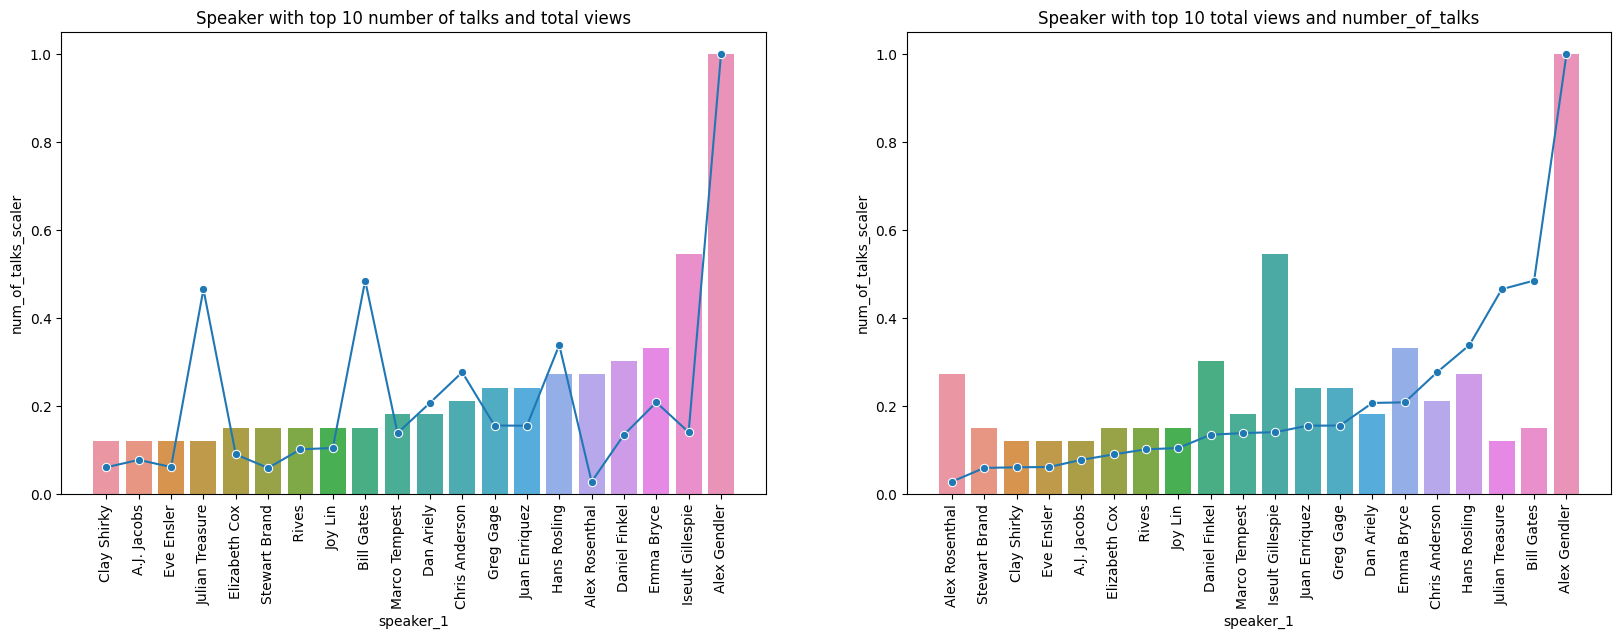

In [ ]:
# graph for speakers which has maximum talks with respect to views

# # plotting the graph

speaker_report_1 = speaker_report.sort_values('num_of_talks_scaler')
speaker_report_2 = speaker_report.sort_values('views')
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
#plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(x='speaker_1',y='num_of_talks_scaler',data = speaker_report_1)
sns.lineplot(x='speaker_1',y='views_scaler',data=speaker_report_1,marker='o')
plt.title('Speaker with top 10 number of talks and total views')

plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
sns.barplot(x='speaker_1',y='num_of_talks_scaler',data = speaker_report_2)
sns.lineplot(x='speaker_1',y='views_scaler',data=speaker_report_2,marker='o')
plt.title('Speaker with top 10 total views and number_of_talks')
#speaker_report


We have the visualization for the same data from two different aspect here.


(1) First is the graph which contains Speakers who had given most number of talks. And the line graph represents their Views.
We can observe that Bill Gates was the influenced person, so even if his number of talks are less, he has received more number of views. So the speaker influences the number of views fo the talks.We ca see some hike in the graoh for the influenced speakers.

(2) Second is the graph which is sorted according to the Number of views talks received. We can observe that the number of talks is not directly contributing to the number of views talks can receive.




## **Speaker who received more number of views for one video.**

In [ ]:
most_popular_video_df = tedtalk_df.nlargest(10,['views'])
most_popular_video_df[['speaker_1','views','title']]

speaker_1     views  \
4     Sir Ken Robinson  65051954   
1296         Amy Cuddy  57074270   
2062      James Veitch  56932551   
646        Simon Sinek  49730580   
796        Brené Brown  47544833   
1724   Julian Treasure  41504331   
2108         Tim Urban  37976820   
1366   Cameron Russell  33874546   
2724         Sam Berns  33691484   
1898        Bill Gates  33521780   

                                                  title  
4                           Do schools kill creativity?  
1296           Your body language may shape who you are  
2062  This is what happens when you reply to spam email  
646                    How great leaders inspire action  
796                          The power of vulnerability  
1724         How to speak so that people want to listen  
2108         Inside the mind of a master procrastinator  
1366  Looks aren't everything. Believe me, I'm a model.  
2724                     My philosophy for a happy life  
1898                 The next outbreak? We're not ready

<Axes: title={'center': 'most views received for the single video by speaker'}, xlabel='speaker_1', ylabel='views'>

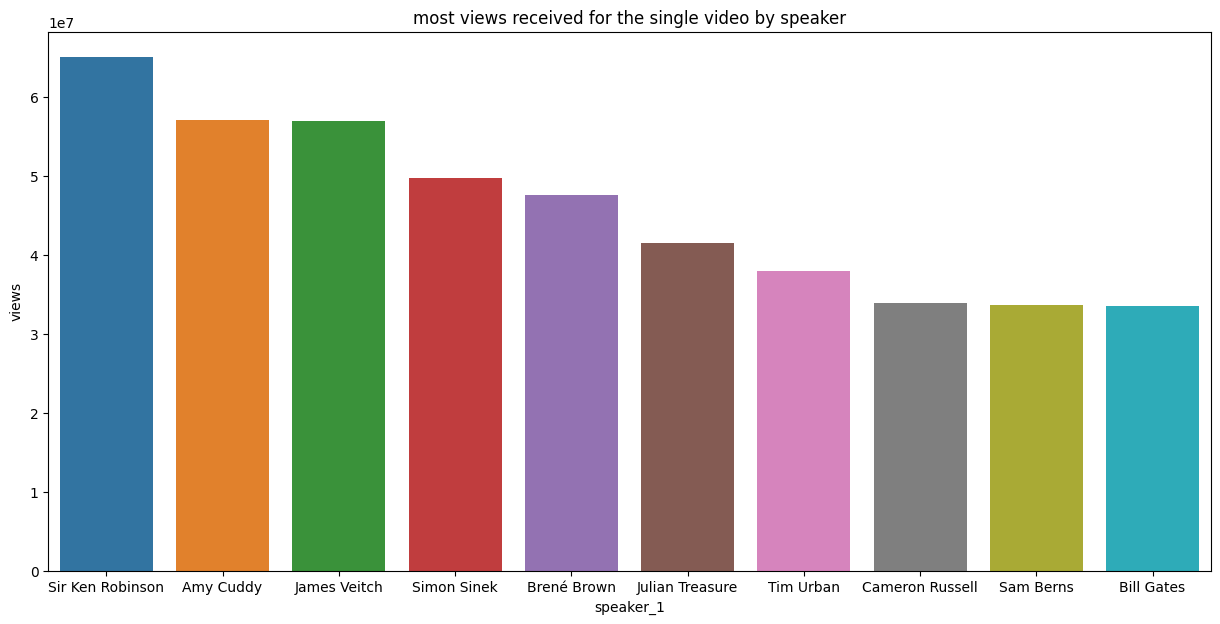

In [ ]:
plt.figure(figsize=(15,7))
plt.title("most views received for the single video by speaker")
sns.barplot(x='speaker_1',y='views',data=most_popular_video_df)

This graph represents the maximum views a single video received. Sir Ken Robinson is the one who received maximum number of views for a single video.

#**Occupations column**

## **Top occupations of the speaker**

In [ ]:

tedtalk_df['speaker_occupation']=pd.Series()
for i in range(len(tedtalk_df)):
  tedtalk_df.loc[i,'speaker_occupation'] = tedtalk_df['occupations'][i][0]

In [ ]:
tedtalk_df['speaker_occupation']

0                           climate advocate
1       global health expert; data visionary
2                       technology columnist
3         activist for environmental justice
4                                     author
                        ...                 
4000                         health activist
4001                                   other
4002                          law researcher
4003                                   other
4004                                   other
Name: speaker_occupation, Length: 4005, dtype: object

In [ ]:
tedtalk_df.drop('occupations',axis=1,inplace=True)

In [ ]:
tedtalk_df['speaker_occupation'].nunique()

1552

We can observe that there are 1552 different occupations for the respective speakers in TED talk videos

In [ ]:
speaker_occupations_df = pd.DataFrame(tedtalk_df['speaker_occupation'].value_counts()).reset_index()
speaker_occupations_df.rename(columns={'index':'Occupations', 'speaker_occupation':'Number_of_speakers'}, inplace=True)

occupations_with_most_views = tedtalk_df.groupby(['speaker_occupation'],dropna=True)['views'].mean().reset_index()
occupations_with_most_views.rename(columns={'speaker_occupation':'Occupations', 'views':'views'}, inplace=True)

occupation_report = speaker_occupations_df.merge(occupations_with_most_views,on='Occupations')


In [ ]:
#taking only numeric columns to do the minmaxscaling
occupation_numeric = occupation_report[['Number_of_speakers','views']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(occupation_numeric)
#print(scaled)
occupation_report ['Number_of_speakers_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
occupation_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))
occupation_report = occupation_report.loc[1:21,:]

Text(0.5, 1.0, 'Occupations with average views and respected number of speakers')

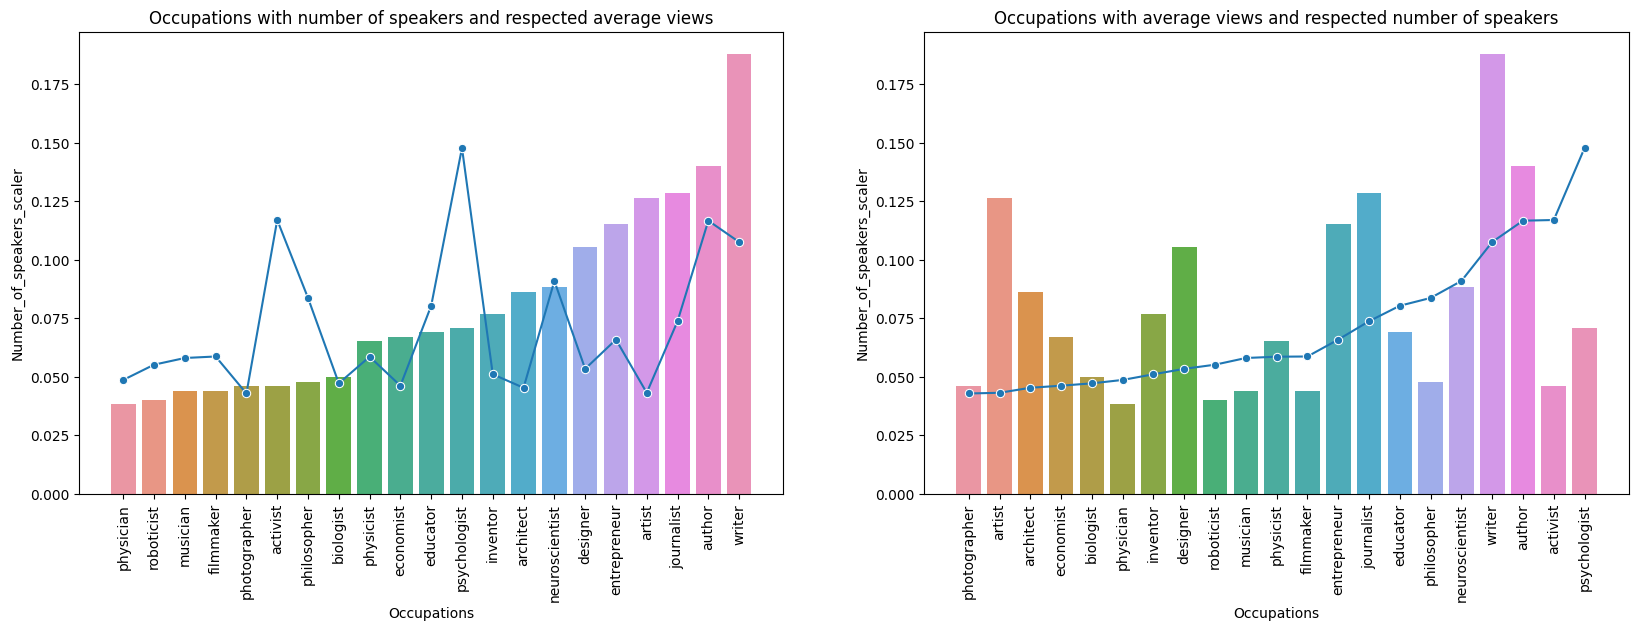

In [ ]:
# graph for occupation which has maximum talks with respect to views

# # plotting the graph

occupation_report_1 = occupation_report.sort_values('Number_of_speakers')
occupation_report_2 = occupation_report.sort_values('views')

plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
#plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(x='Occupations',y='Number_of_speakers_scaler',data = occupation_report_1)
sns.lineplot(x='Occupations',y='views_scaler',data = occupation_report_1,marker='o')
plt.title('Occupations with number of speakers and respected average views')



plt.subplot(1, 2, 2)
#plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.barplot(x='Occupations',y='Number_of_speakers_scaler',data = occupation_report_2)
sns.lineplot(x='Occupations',y='views_scaler',data = occupation_report_2,marker='o')
plt.title('Occupations with average views and respected number of speakers')


Again we have 2 representation of the same graphs, once sorted according to the number of talks then according to the number of views.

(1) In first graph, we can see that, again number of talks for the respective occupations are not directly contributing to the number of views. Instead the type of occupations are bringinfg a hike in number of views. For example, psychology (which everybody loves to listen about) and Activist (Who will make everybody listen to them by theri words). The occupations (might be their skills to talk to) does matter in number of views.

(2) Second graph contains the grapph which is sorted according to the number of views. We can See that the top 3 views were received by Psychologist, Activist and Author who all are very good in making people love what they speak.

##**Occupations which received maximum number of views for a a single video.**

In [ ]:

most_popular_video_df = tedtalk_df.nlargest(10,['views'])
most_popular_video_df[['speaker_occupation','views','title']]

speaker_occupation     views  \
4                       author  65051954   
1296       social psychologist  57074270   
2062       comedian and writer  56932551   
646          leadership expert  49730580   
796   vulnerability researcher  47544833   
1724          sound consultant  41504331   
2108                   blogger  37976820   
1366                     model  33874546   
2724                  activist  33691484   
1898            philanthropist  33521780   

                                                  title  
4                           Do schools kill creativity?  
1296           Your body language may shape who you are  
2062  This is what happens when you reply to spam email  
646                    How great leaders inspire action  
796                          The power of vulnerability  
1724         How to speak so that people want to listen  
2108         Inside the mind of a master procrastinator  
1366  Looks aren't everything. Believe me, I'm a model.  
2724                     My philosophy for a happy life  
1898                 The next outbreak? We're not ready

<Axes: title={'center': 'most viewd video_Occupation'}, xlabel='speaker_occupation', ylabel='views'>

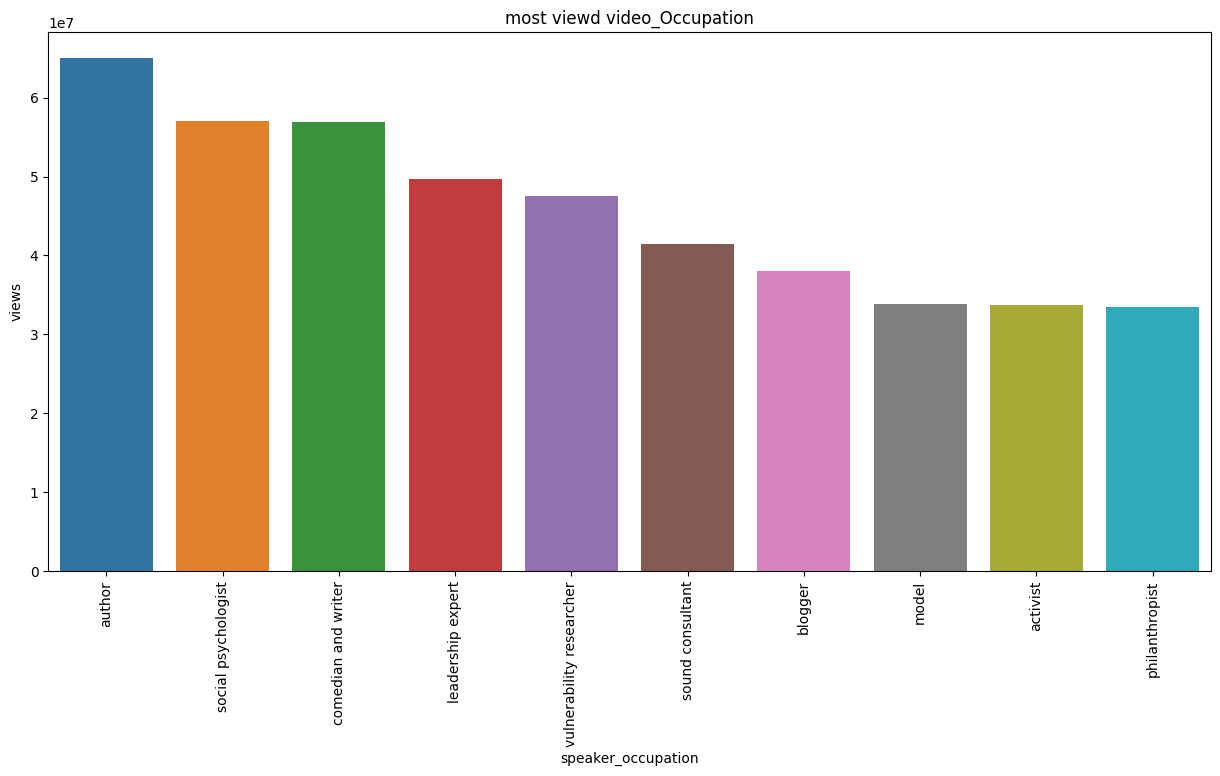

In [ ]:
plt.figure(figsize=(15,7))
plt.title("most viewd video_Occupation")
plt.xticks(rotation=90)
sns.barplot(x='speaker_occupation',y='views',data=most_popular_video_df)

We can observe that the maximum number of views for a single video was received by the occuapttions Author followed by Psychologist.

#**Published date and released date**

##**Finding out on which day most of the videos were released**

In [ ]:
#creating a df which holds the number of talks on each day
talk_rel_day_df = pd.DataFrame(tedtalk_df['release_day'].value_counts()).reset_index()
talk_rel_day_df.rename(columns={'index':'release_day', 'release_day':'num_of_talks'}, inplace=True)

#creating another df which holds the record of views on each day
popular_day = tedtalk_df[['release_day','views']].groupby('release_day').agg({'views' : 'mean'}).sort_values('views',ascending=False).reset_index()

#merging both df
talk_day_report = talk_rel_day_df.merge(popular_day,on='release_day')

talk_day_report

release_day  num_of_talks         views
0     Tuesday           857  2.025352e+06
1    Thursday           832  1.907994e+06
2      Friday           789  2.693812e+06
3      Monday           727  1.953866e+06
4   Wednesday           703  2.293402e+06
5      Sunday            55  1.458068e+06
6    Saturday            42  9.821678e+05

In [ ]:
#Sorting the days by using another dataframe with the day values

day_value = pd.DataFrame([['Sunday',0],['Monday',1],['Tuesday',2],['Wednesday',3],['Thursday',4],['Friday',5],['Saturday',6]])
day_value.rename(columns={0:'release_day',1:'Day_value'},inplace=True)
day_value
talk_day_report = talk_day_report.merge(day_value,on='release_day')

talk_day_report

release_day  num_of_talks         views  Day_value
0     Tuesday           857  2.025352e+06          2
1    Thursday           832  1.907994e+06          4
2      Friday           789  2.693812e+06          5
3      Monday           727  1.953866e+06          1
4   Wednesday           703  2.293402e+06          3
5      Sunday            55  1.458068e+06          0
6    Saturday            42  9.821678e+05          6

In [ ]:
talk_day_report = talk_day_report.sort_values('Day_value',ascending=True)
talk_day_report = talk_day_report.drop('Day_value',axis=True)
talk_day_report

release_day  num_of_talks         views
5      Sunday            55  1.458068e+06
3      Monday           727  1.953866e+06
0     Tuesday           857  2.025352e+06
4   Wednesday           703  2.293402e+06
1    Thursday           832  1.907994e+06
2      Friday           789  2.693812e+06
6    Saturday            42  9.821678e+05

In [ ]:
#taking only numeric columns to do the minmaxscaling
talk_day_numeric = talk_day_report[['num_of_talks','views']]
print(talk_day_numeric)
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(talk_day_numeric)
#print(scaled)
talk_day_report ['num_of_talks_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
talk_day_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))

   num_of_talks         views
5            55  1.458068e+06
3           727  1.953866e+06
0           857  2.025352e+06
4           703  2.293402e+06
1           832  1.907994e+06
2           789  2.693812e+06
6            42  9.821678e+05


In [ ]:
talk_day_report

release_day  num_of_talks         views  num_of_talks_scaler  views_scaler
5      Sunday            55  1.458068e+06             0.916564      1.000000
3      Monday           727  1.953866e+06             0.811043      0.766067
0     Tuesday           857  2.025352e+06             0.015951      0.278037
4   Wednesday           703  2.293402e+06             0.969325      0.540899
1    Thursday           832  1.907994e+06             0.840491      0.567699
2      Friday           789  2.693812e+06             1.000000      0.609463
6    Saturday            42  9.821678e+05             0.000000      0.000000

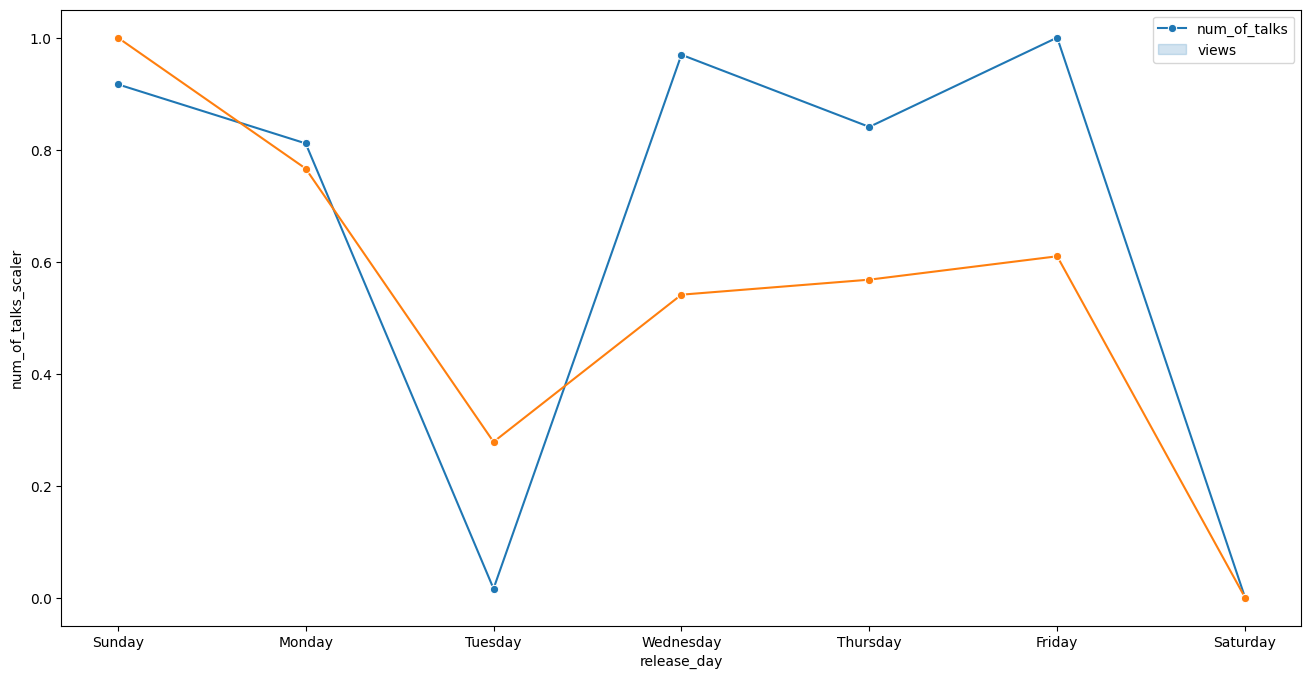

In [ ]:
plt.figure(figsize=(16,8))
for i in talk_day_report.iloc[:,3:]:
  sns.lineplot(data=talk_day_report,x='release_day',y=i,marker='o')

plt.legend(labels=talk_day_numeric)

We can observe in this graph about the comparision of number of talks and as well as the number of views a particular day received. We can see that on saturday the number of talks and as well as the number of views were low. And on Sunday, Wednesday and Friday the release were high. But the number of views were high only on Sunday.

It may seem that only on weekends people were interested to give a time for TED talk videos.

## **Month**

In [ ]:
! pip install sorted-months-weekdays
! pip install sort-dataframeby-monthorweek

from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *

  Preparing metadata (setup.py) ... done
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3223 sha256=9e9dcc5fdef2ce80401044624d56e2131fff532011c8e04f5e706ee724f81154
  Stored in directory: /root/.cache/pip/wheels/bd/b4/f6/2c29a96668a9a13a568134857fd7b7a5186261f00f1d35661c
Successfully built sorted-months-weekdays
  Preparing metadata (setup.py) ... done
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3419 sha256=7abe04369873b3713408a1d927ea0107f33fd04b7bf85fa2714da80b3982a565
  Stored in directory: /root/.cache/pip/wheels/6b/fd/39/06eaac8d65d641f9f50856a48b57a5ec8351be2874beff01ec
Successfully built sort-dataframeby-monthorweek


In [ ]:
# creating data frame for num of talks in a particular month
talk_rel_month_df = pd.DataFrame(tedtalk_df['release_month'].value_counts()).reset_index()
talk_rel_month_df.rename(columns={'index':'release_month', 'release_month':'num_of_talks'}, inplace=True)

#Printing the most popular release month according to average Views
popular_month = tedtalk_df[['release_month','views']].groupby('release_month').agg({'views' : 'mean'}).sort_values('release_month').reset_index()

#merging two dataframes which has number of talks and views received in the same df
talk_month_report = talk_rel_month_df.merge(popular_month,on='release_month')

#sorting according to month in here
talk_month_report = Sort_Dataframeby_Month(df=talk_month_report ,monthcolumnname='release_month')



In [ ]:
#taking only numeric columns to do the minmaxscaling
talk_month_numeric = talk_month_report[['num_of_talks','views']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(talk_month_numeric)
#print(scaled)
talk_month_report ['num_of_talks_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
talk_month_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))

In [ ]:

talk_month_report

release_month  num_of_talks         views  num_of_talks_scaler  \
0            Jan           348  2.014319e+06             0.598930   
1            Feb           412  2.135949e+06             0.941176   
2          March           419  2.644200e+06             0.978610   
3          April           423  2.180815e+06             1.000000   
4            May           312  2.449977e+06             0.406417   
5           June           310  2.125505e+06             0.395722   
6           July           278  2.127899e+06             0.224599   
7            Aug           236  1.884180e+06             0.000000   
8            Sep           347  2.224862e+06             0.593583   
9            Oct           350  1.909282e+06             0.609626   
10           Nov           305  1.746111e+06             0.368984   
11           Dec           265  2.109443e+06             0.155080   

    views_scaler  
0       0.298644  
1       0.434075  
2       1.000000  
3       0.484033  
4       0.783738  
5       0.422446  
6       0.425112  
7       0.153737  
8       0.533078  
9       0.181687  
10      0.000000  
11      0.404562

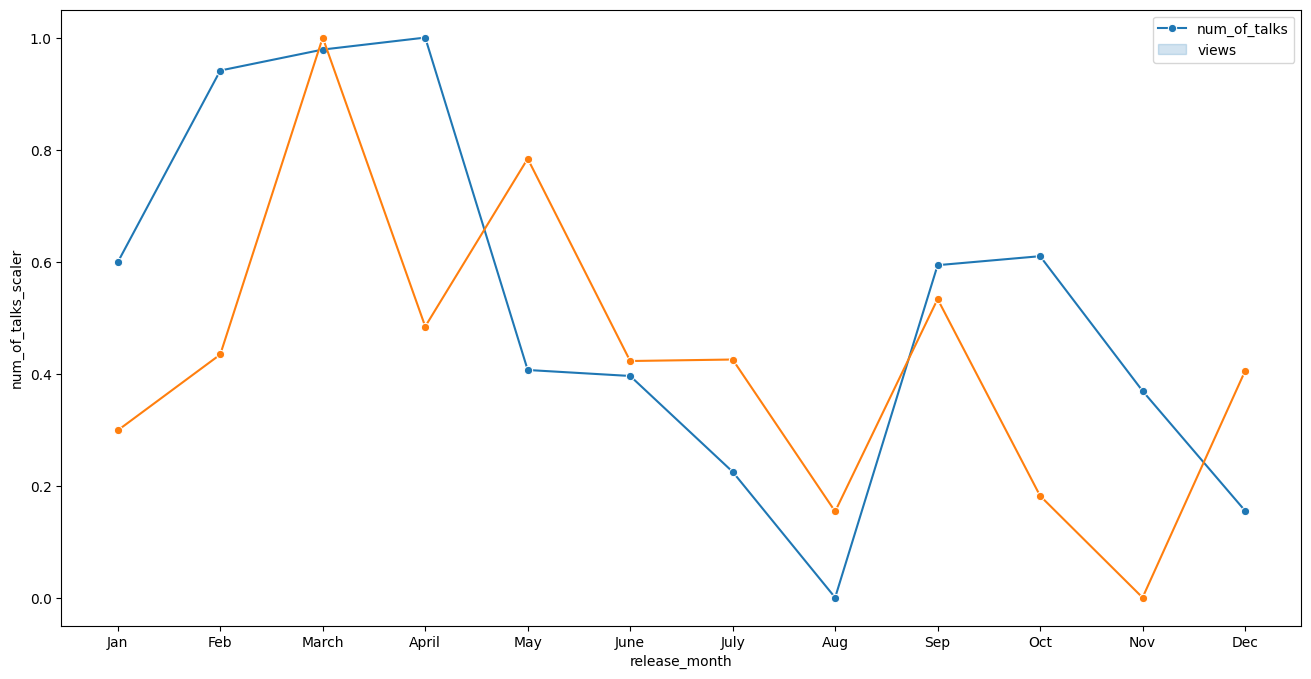

In [ ]:
plt.figure(figsize=(16,8))
for i in talk_month_report.iloc[:,3:]:
  sns.lineplot(data=talk_month_report,x='release_month',y=i,marker='o')

plt.legend(talk_month_numeric)

Here we can observe that it has the comparision wise line graph for number of talks and number of views for the respective month.

Most number of videos wwere released on the month of April where the lease was released on the month of August. But the number of views were maximum for the videos which were released on the minth of March and it was lease for the videos of November.



##**Year**

In [ ]:
talk_rel_year_df = pd.DataFrame(tedtalk_df['release_year'].value_counts()).reset_index()
talk_rel_year_df.rename(columns={'index':'release_year', 'release_year':'num_of_talks'}, inplace=True)

popular_year = tedtalk_df[['release_year','views']].groupby('release_year').agg({'views' : 'mean'}).sort_values('release_year',ascending=False).reset_index()

talk_year_report = talk_rel_year_df.merge(popular_year,on='release_year').sort_values('release_year')


In [ ]:
#taking only numeric columns to do the minmaxscaling
talk_year_numeric = talk_year_report[['num_of_talks','views']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(talk_year_numeric)
#print(scaled)
talk_year_report ['num_of_talks_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
talk_year_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))

In [ ]:
talk_year_report

release_year  num_of_talks         views  num_of_talks_scaler  \
14          2006            49  4.937003e+06             0.248086   
13          2007           119  1.848977e+06             1.000000   
12          2008           185  1.810979e+06             0.655436   
10          2009           215  2.071610e+06             0.295559   
8           2010           230  2.188767e+06             0.292496   
4           2011           255  1.932456e+06             0.277182   
3           2012           303  2.196281e+06             0.254211   
5           2013           242  3.012435e+06             0.315467   
7           2014           240  2.423564e+06             0.295559   
9           2015           220  2.806775e+06             0.261868   
6           2016           242  2.734725e+06             0.388974   
2           2017           315  2.160378e+06             0.208270   
1           2018           477  1.826209e+06             0.107198   
0           2019           702  1.939608e+06             0.000000   
11          2020           211  9.267452e+05             0.407351   

    views_scaler  
14      0.000000  
13      0.252568  
12      0.224291  
10      0.450839  
8       0.373247  
4       0.314698  
3       0.285484  
5       0.250785  
7       0.520089  
9       0.468805  
6       0.316572  
2       0.220493  
1       0.229968  
0       1.000000  
11      0.307619

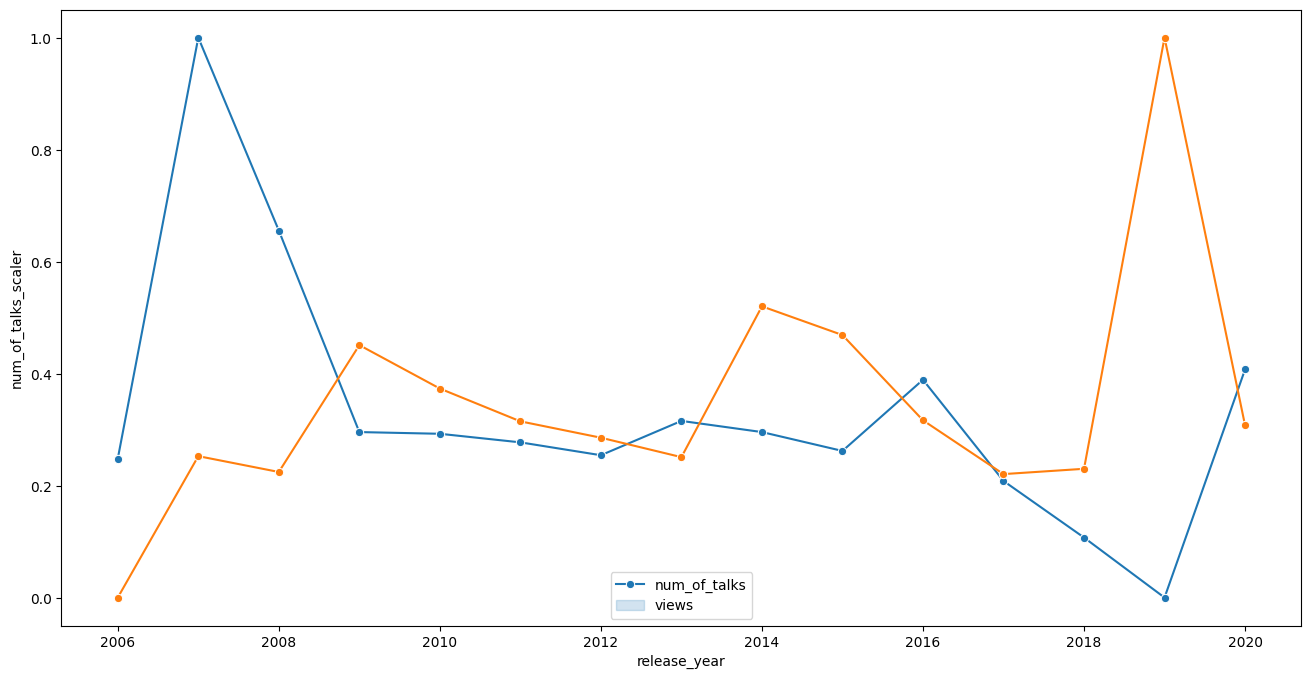

In [ ]:
plt.figure(figsize=(16,8))
for i in talk_year_report.iloc[:,3:]:
  sns.lineplot(data=talk_year_report,x='release_year',y=i,marker='o')
plt.legend(labels=talk_year_numeric)

We can observe the line graph for almost 20 years of number of talks and number of views. We can conclude that Number of talks were morein old days but eventually it was reduced hit the minimum in 2019. It hits the hike in 2007 though. But the number of views were gradually increasing from year to year with a little bit of ups and downs. It was high during the 2019 when the number of talks were minimum.

##**To view the number of views received per day on monthly basis**

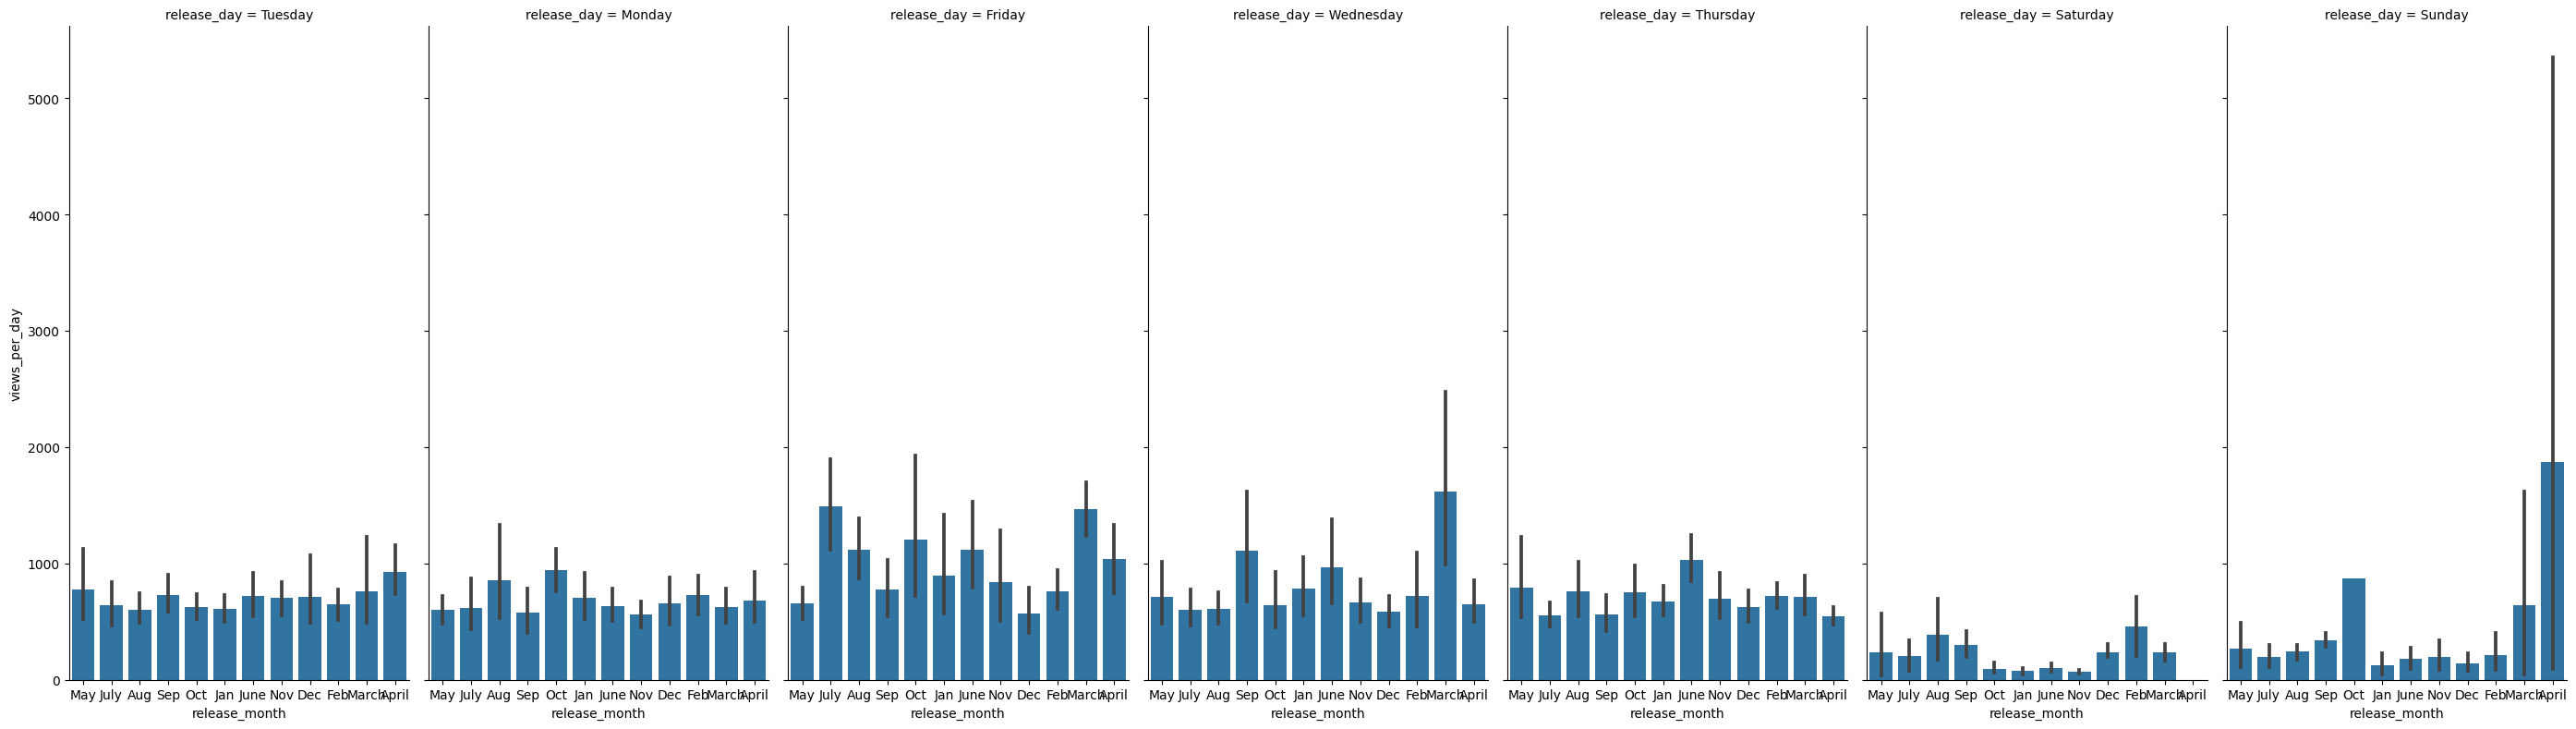

In [ ]:
from datetime import date
graph_df = tedtalk_df.copy()
g = sns.FacetGrid(graph_df, col='release_day', height=8, aspect=.5)
td = pd.to_datetime(date.today(), format='%Y-%m-%d')
graph_df['video_age'] = (td - tedtalk_df['published_date']).apply(lambda x: x.days)
graph_df['views_per_day'] = graph_df['views'] / ( graph_df['video_age'] + 1 )
g.map(sns.barplot, 'release_month', 'views_per_day')


#**Comment and duration columns**

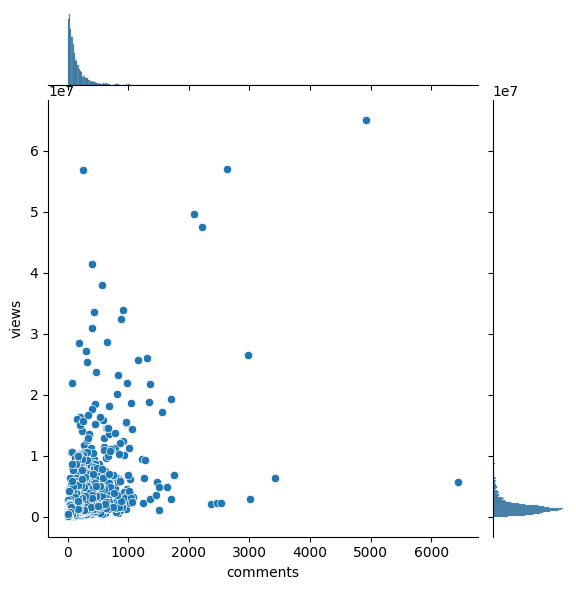

In [ ]:
sns.jointplot(data=tedtalk_df,x='comments', y='views')

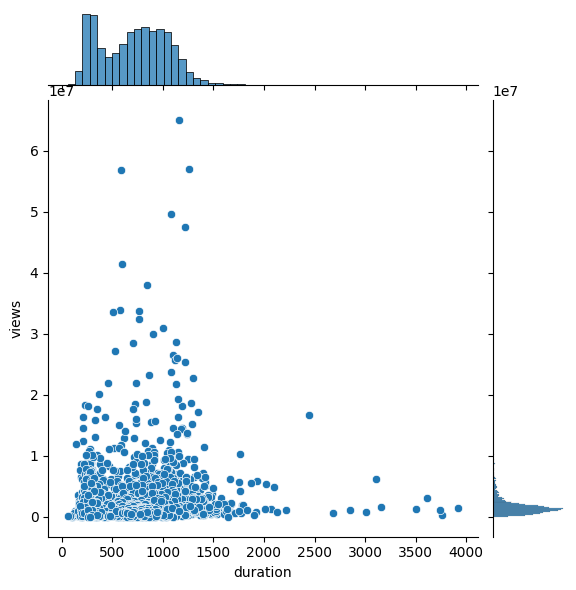

In [ ]:
sns.jointplot(data=tedtalk_df,x='duration', y='views')

<Axes: xlabel='duration', ylabel='Density'>

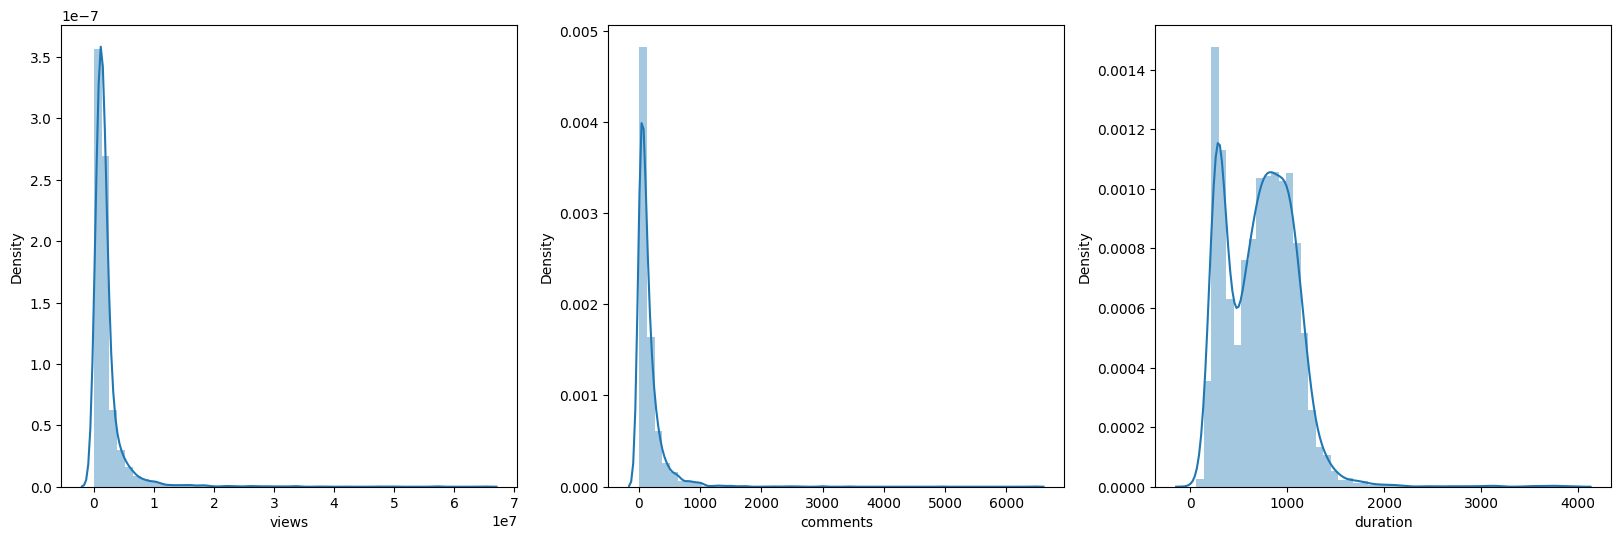

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.distplot(tedtalk_df['views'])
plt.subplot(1,3,2)
sns.distplot(tedtalk_df['comments'])
plt.subplot(1,3,3)
sns.distplot(tedtalk_df['duration'])


We can observe the data distribution of the nukmerical columns views , comments and duration.

## **Events with respect to talks and views**

In [ ]:
#count of events

event_count_df = pd.DataFrame(tedtalk_df['event'].value_counts()).reset_index()
event_count_df.rename(columns={'index':'event', 'event':'num_of_talks'}, inplace=True)

#event with max views
popular_event=tedtalk_df[['event','views']].groupby('event').agg({'views' : 'mean'}).sort_values('views',ascending=False).reset_index()

event_report = event_count_df.merge(popular_event,on='event')



In [ ]:
#taking only numeric columns to do the minmaxscaling
event_numeric = event_report[['num_of_talks','views']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(event_numeric)
#print(scaled)
event_report ['num_of_talks_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
event_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))


Text(0.5, 1.0, 'Events with top 10 views followed by their number of talks')

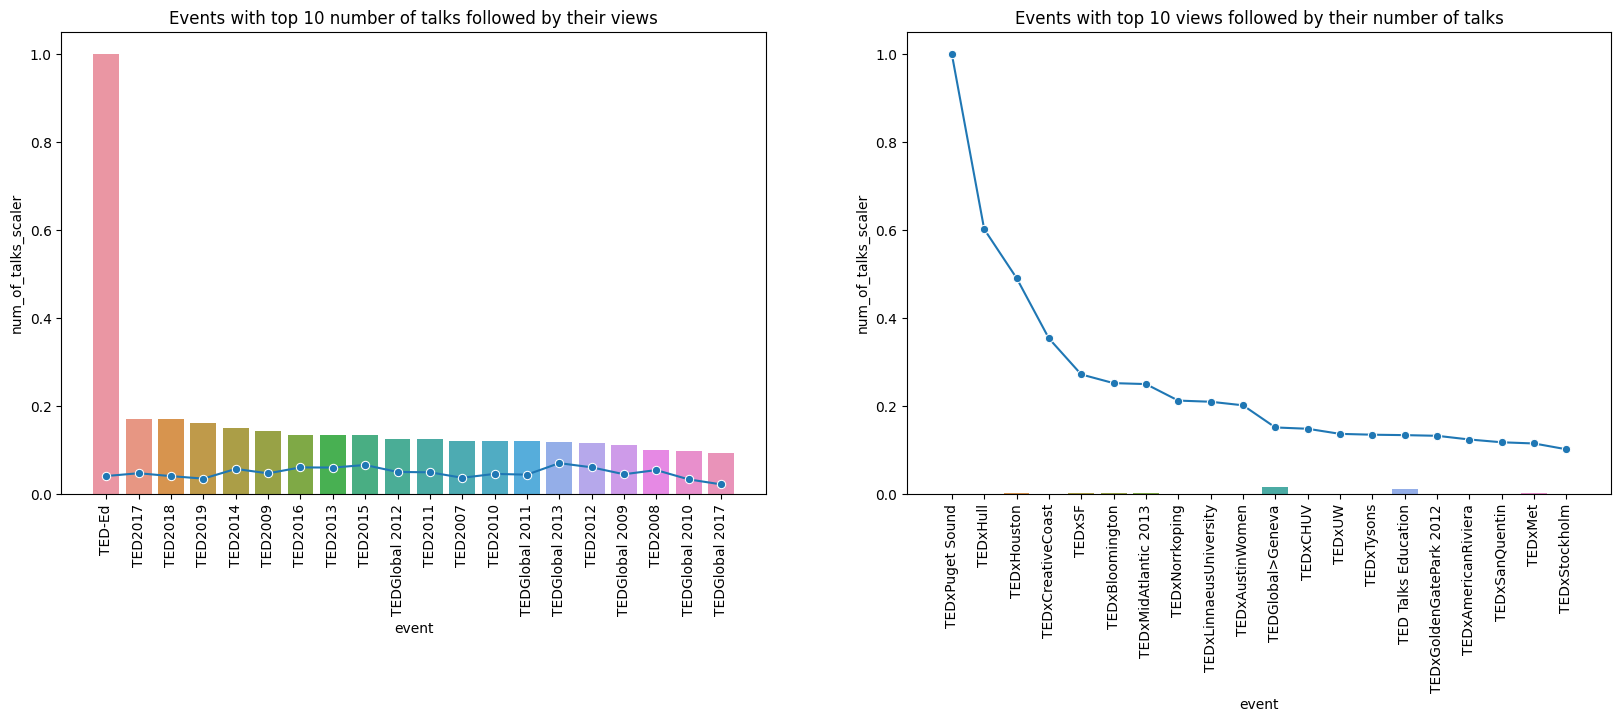

In [ ]:
# graph for event which has maximum talks with respect to views
event_talk_views_report_1 = event_report.sort_values('num_of_talks',ascending=False).head(20)
event_talk_views_report_2 = event_report.sort_values('views',ascending=False).head(20)
# # plotting the graph

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.xticks(rotation=90)
sns.barplot(x='event',y='num_of_talks_scaler',data = event_talk_views_report_1)
sns.lineplot(x='event',y='views_scaler',data=event_talk_views_report_1,marker='o')
plt.title('Events with top 10 number of talks followed by their views')

plt.subplot(1,2,2)
plt.xticks(rotation=90)
sns.barplot(x='event',y='num_of_talks_scaler',data = event_talk_views_report_2)
sns.lineplot(x='event',y='views_scaler',data=event_talk_views_report_2,marker='o')
plt.title('Events with top 10 views followed by their number of talks')


This graph represents the number of views for the different views along with the number of talks. We can observe that the count of number of talks of event did not really matter for views. For top 10 events in the first graph, the number of views is almost the same. And in the second graph, for the top 10 nummber of views, event's number of talks were very low.

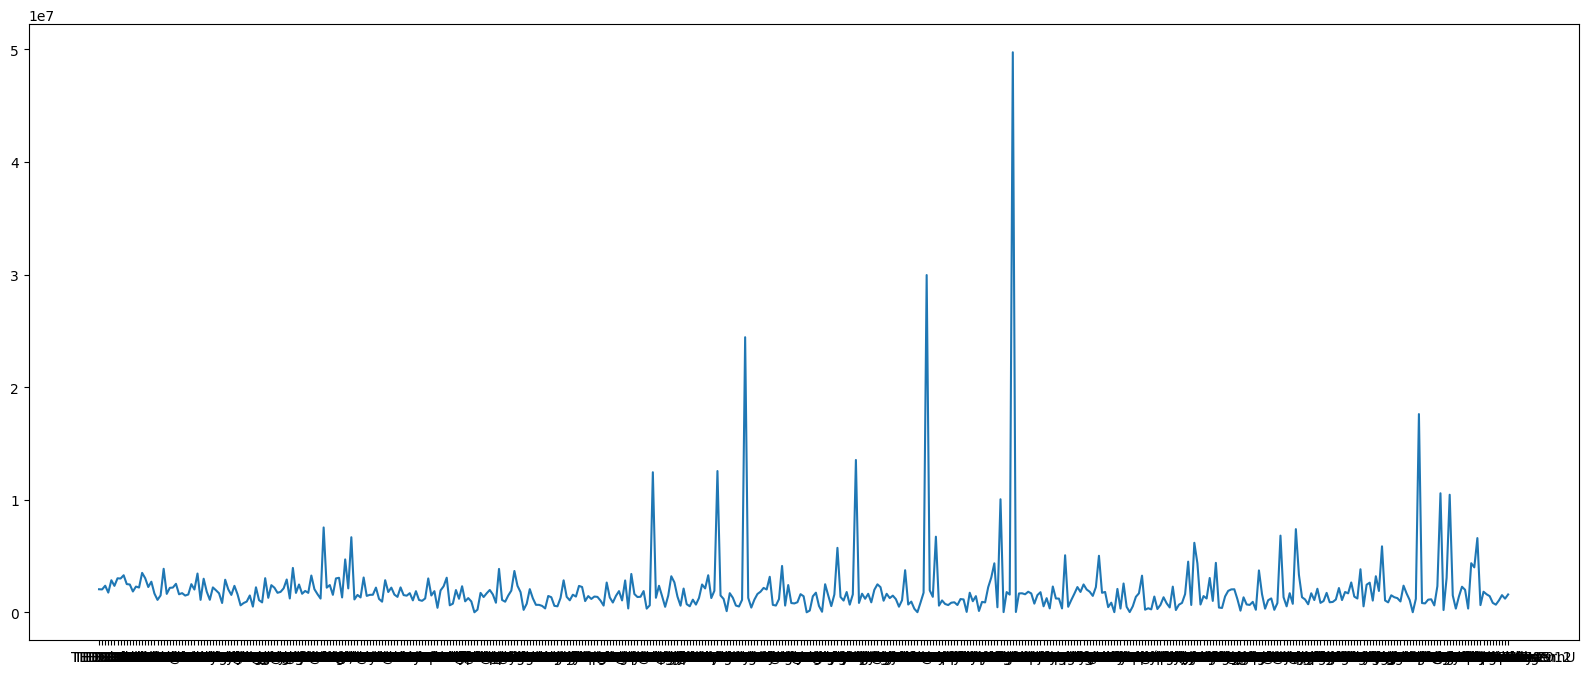

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(event_report['event'],event_report['views'])

This explains about the different events with respect to the number of views. And we can see some hikes in number of views for very few events in here.

# **Native lang column**

In [ ]:
tedtalk_df['native_lang'].nunique()

12

In [ ]:
native_lang_df = pd.DataFrame(tedtalk_df['native_lang'].value_counts()).reset_index()

native_lang_df.rename(columns={'index':'native_lang', 'native_lang':'num_of_talks'}, inplace=True)

#event with max views
popular_lang=tedtalk_df[['native_lang','views']].groupby('native_lang').agg({'views' : 'mean'}).sort_values('views',ascending=False).reset_index()

lang_report = native_lang_df.merge(popular_lang,on='native_lang')

In [ ]:
#taking only numeric columns to do the minmaxscaling
lang_numeric = event_report[['num_of_talks','views']]
#using standardization as both numeric columns are in different scale
#after words it will be easy for us to do the graphs
scaler = MinMaxScaler()
scaled = scaler.fit_transform(lang_numeric)
#print(scaled)
lang_report ['num_of_talks_scaler'] = pd.Series(scaled[i][0] for i in range(len(scaled)))
lang_report ['views_scaler'] = pd.Series(scaled[i][1] for i in range(len(scaled)))

native_lang  num_of_talks         views  num_of_talks_scaler  views_scaler
0           en          3957  2.163597e+06             1.000000      0.041120
1           es            27  6.898032e+05             0.171171      0.040824
2           fr             9  9.825846e+05             0.171171      0.047425
3           ja             3  6.802843e+05             0.162162      0.035154
4           hi             2  5.768520e+05             0.149550      0.057226
5           de             1  8.848810e+05             0.144144      0.047162
6           pt             1  3.475180e+05             0.133333      0.060661
7           ko             1  2.057706e+06             0.133333      0.060288
8        zh-cn             1  1.368494e+06             0.133333      0.066117
9           ar             1  1.452611e+06             0.124324      0.050363
10       pt-br             1  1.167889e+06             0.124324      0.049576
11          it             1  3.466037e+06             0.120721      0.037102

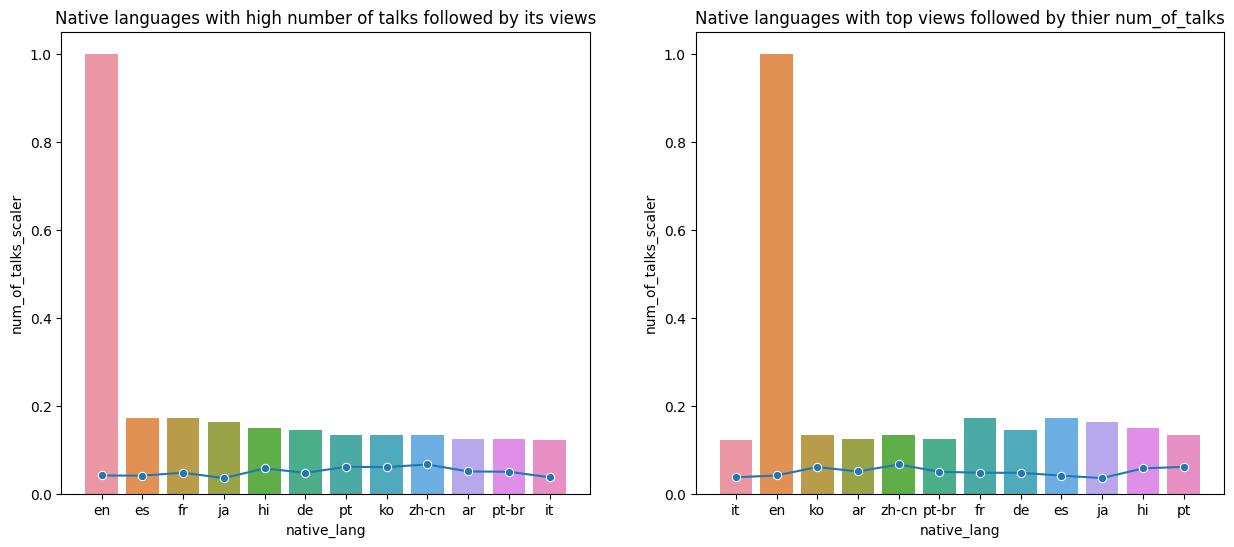

In [ ]:
# graph for langauges which has maximum talks with respect to views
#lang_report.sort_values('views',ascending=False,inplace=True)
# # plotting the graph
lang_report_1 = lang_report.sort_values('num_of_talks',ascending=False)
lang_report_2 = lang_report.sort_values('views',ascending=False)

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.barplot(x='native_lang',y='num_of_talks_scaler',data = lang_report_1)
sns.lineplot(x='native_lang',y='views_scaler',data=lang_report_1,marker='o')
plt.title('Native languages with high number of talks followed by its views')

plt.subplot(1,2,2)
sns.barplot(x='native_lang',y='num_of_talks_scaler',data = lang_report_2)
sns.lineplot(x='native_lang',y='views_scaler',data=lang_report_2,marker='o')
plt.title('Native languages with top views followed by thier num_of_talks')

lang_report

We can see the different native languages avaliable, number of talks in those languages and number of views it received.
In the first graph we can see the charts which are sorted according to the number of talks. Obviously english being the common langauge, has most numer of talks. But it did not ensure abou tthe number of views. The second graph contains the charts which are sorted according to number of views. And we can see that Portuguese has received maximum average views for its talks.

# **Available lang column**

## **subtitles count for all videos**

In [ ]:
lang_dict = {}
for i in tedtalk_df.to_dict('records'):
   tmp = i['available_lang']
   for j in tmp:
    if j in lang_dict:
      lang_dict[j] += 1
    else:
      lang_dict[j] = 1
lang_df = pd.DataFrame(lang_dict.values(),index=lang_dict.keys(),columns=['count']).head(20).reset_index().sort_values('count',ascending=False)



In [ ]:
lang_df

index  count
5      en   4005
6      es   3915
8      fr   3863
0      ar   3841
19     ko   3755
18     ja   3482
17     it   3459
12     he   3295
7      fa   3009
15     hu   2871
3      de   2698
4      el   2538
1      bg   2148
14     hr   1856
16     id   1733
2      cs   1543
13     hi    502
9   fr-ca    334
10     gl    323
11     gu    164

Text(0, 0.5, 'Counts')

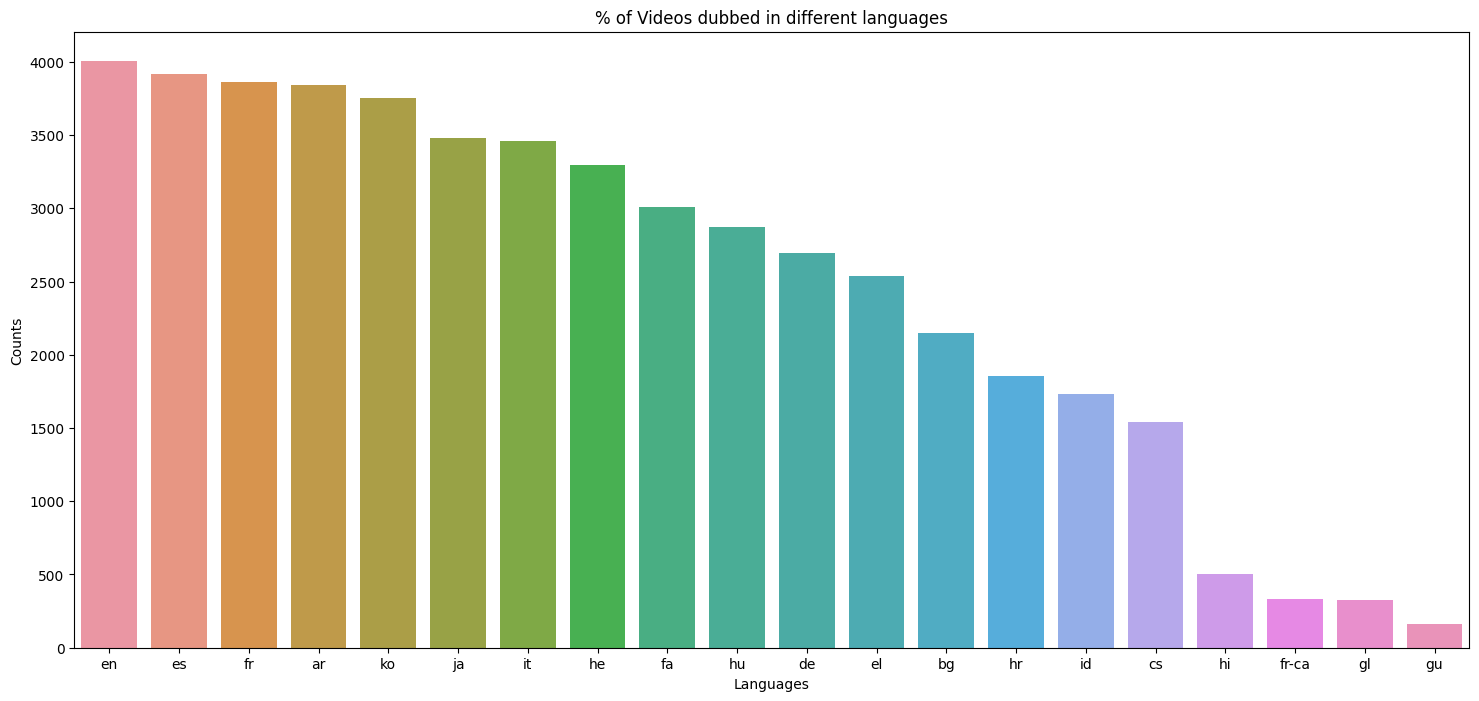

In [ ]:
plt.figure(figsize=(18,8))
plt.title('% of Videos dubbed in different languages')
ax = sns.barplot(x='index',y='count',data=lang_df)
plt.xlabel("Languages")
plt.ylabel('Counts')



This graphs gives the idea about how many languages were available as subtitles for the videos. And again English comes in top as its the common language all over the worls.

#**topics column**

In [ ]:
tedtalk_df['topics']

0       [alternative energy, cars, climate change, cul...
1       [Africa, Asia, Google, demo, economics, global...
2       [computers, entertainment, interface design, m...
3       [MacArthur grant, activism, business, cities, ...
4       [children, creativity, culture, dance, educati...
                              ...                        
4000    [activism, data, technology, mental health, so...
4001    [TED-Ed, education, history, animation, intell...
4002         [society, law, policy, justice system, TEDx]
4003    [TED-Ed, education, animation, United States, ...
4004    [animals, TED-Ed, animation, oceans, science, ...
Name: topics, Length: 4005, dtype: object

In [ ]:
topics_df = pd.DataFrame(tedtalk_df['topics'].explode().value_counts().reset_index()).iloc[:,0:]
topics_df.rename(columns={'index':'Topics','topics':'Number_of_talks'},inplace=True)



<Axes: xlabel='Topics', ylabel='Number_of_talks'>

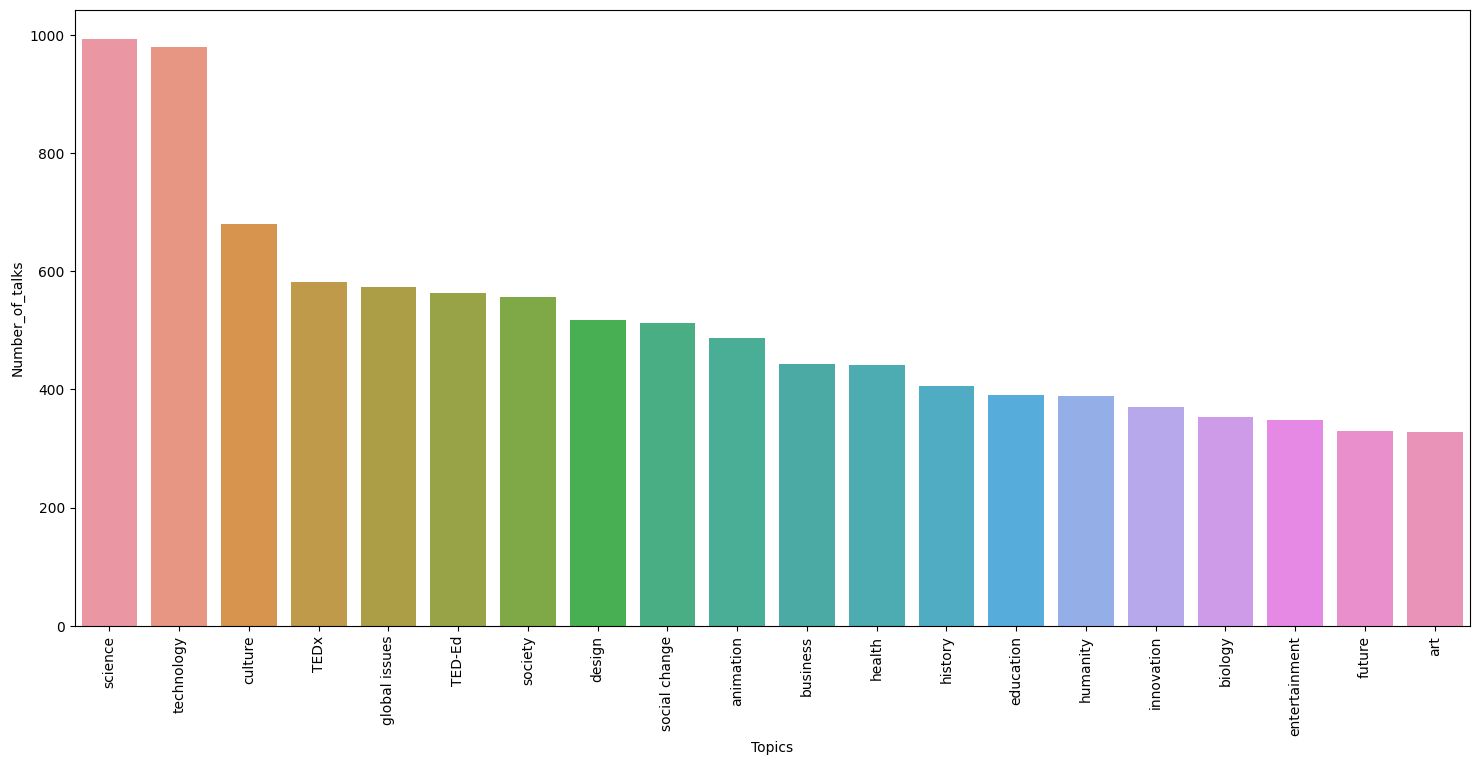

In [ ]:
plt.figure(figsize=(18,8))
plt.xticks(rotation=90)
sns.barplot(x='Topics',y='Number_of_talks',data=topics_df.head(20))

We can see that the most talks in TED talk were about Science and technology.

##**Wordcloud for topics**

In [ ]:
from wordcloud import WordCloud
text = " ".join(topics_df['Topics'])
word_cloud = WordCloud(max_words=100,collocations = False, background_color = 'white').generate(text)

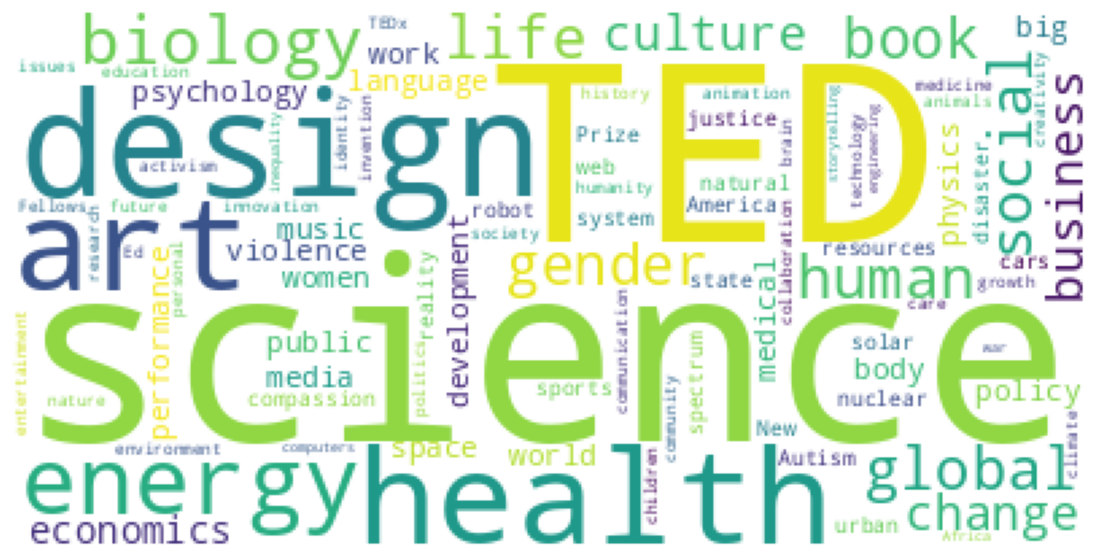

In [ ]:
plt.figure(figsize=(16,7))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

#**description column**

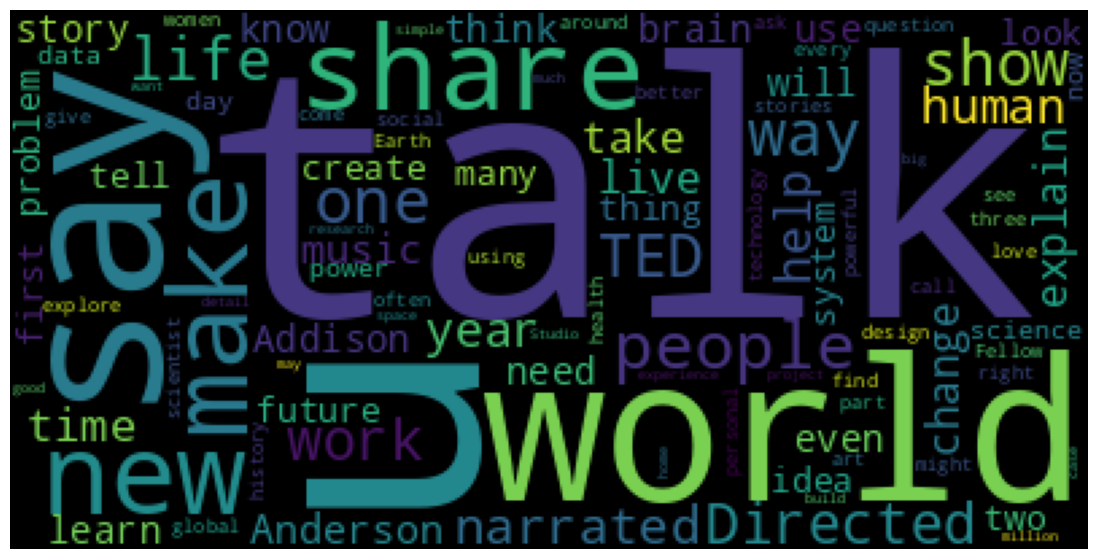

In [ ]:
text = " ".join(tedtalk_df['description'])
word_cloud = WordCloud(max_words=100,collocations = False, background_color = 'black').generate(text)
plt.figure(figsize=(16,7))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

#**title column**

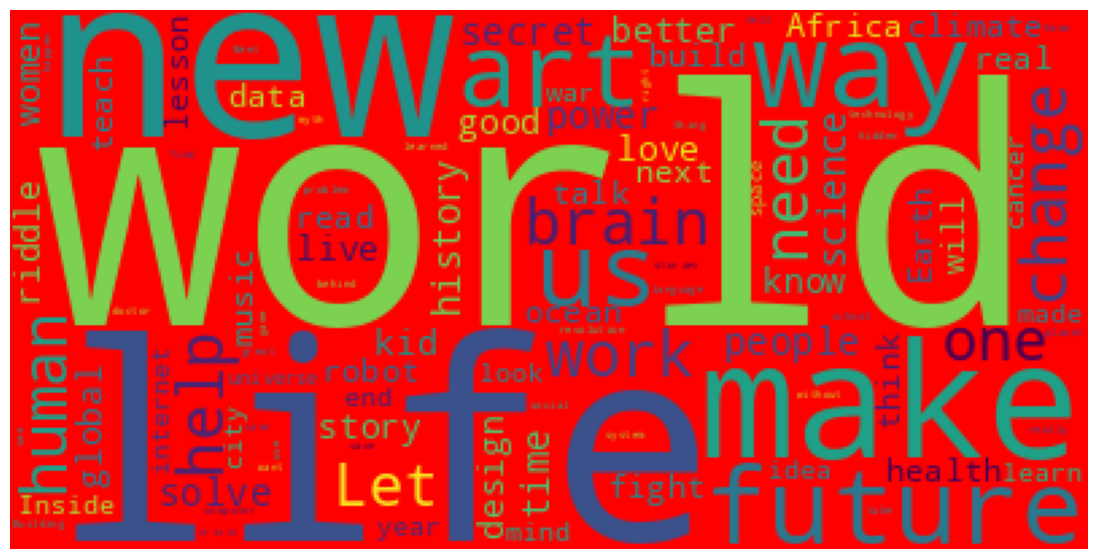

In [ ]:
text = " ".join(tedtalk_df['title'])
word_cloud = WordCloud(max_words=100,collocations = False, background_color = 'red').generate(text)
plt.figure(figsize=(16,7))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

#**Heatmap**

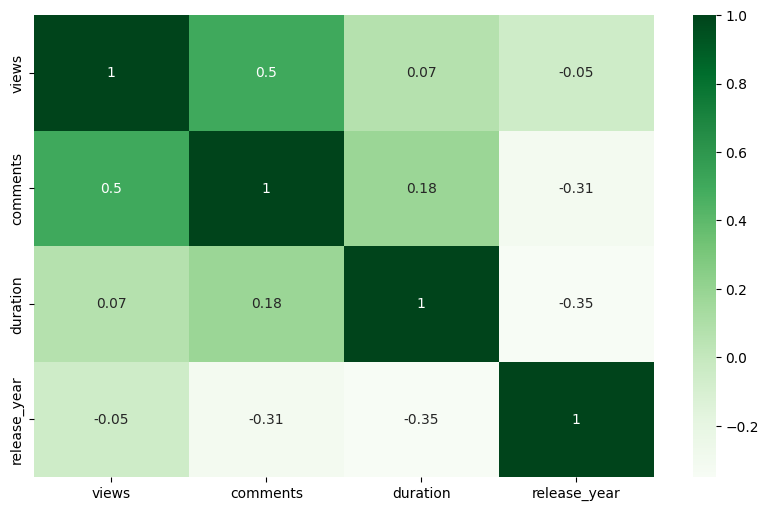

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(round(tedtalk_df.corr(),2),annot=True,cmap='Greens');

Trying to get a correlation matrix with visualization for the numeric columns. We can observe no 2 column share correlation more than 60%

In [ ]:
td_talk_df_2 = tedtalk_df.copy()

#**Missing values in  Comments**

<Axes: xlabel='comments', ylabel='Density'>

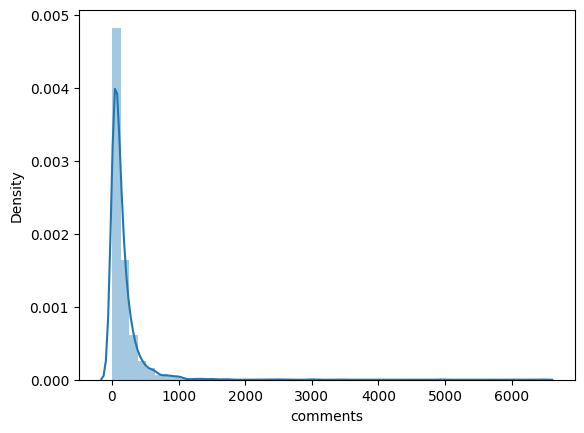

In [ ]:
sns.distplot(tedtalk_df.comments.dropna())

In [ ]:
numeric_df = tedtalk_df[['views','comments','duration']]

As more than 3% of the data were missing in Comments, we tried using the KNN imputer to predict the missing values in here.

In [ ]:
#KNN to find the missing values

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Doing dummy for categorical variables
numeric_df = pd.get_dummies(numeric_df)

# Defining scaler and imputer objects
scaler = StandardScaler()
imputer = KNNImputer()

# Imputing missing values with KNN if any
numeric_df['comments'] = imputer.fit_transform((numeric_df['comments'].values.reshape(-1,1)))

<Axes: xlabel='comments', ylabel='Density'>

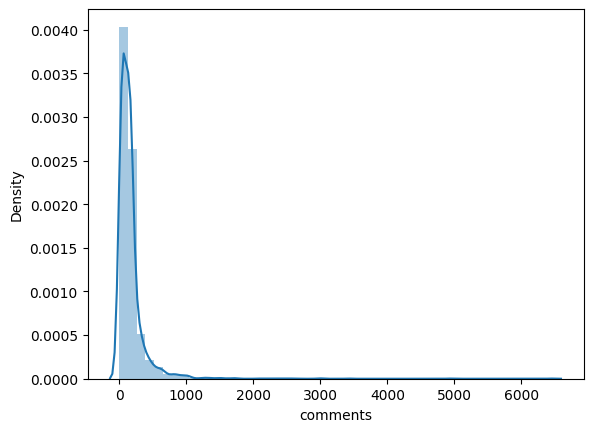

In [ ]:
sns.distplot(numeric_df['comments'])

In [ ]:
tedtalk_df['comments']=numeric_df['comments']
tedtalk_df.isna().sum()

title                 0
speaker_1             0
about_speakers        0
views                 0
recorded_date         0
published_date        0
event                 0
native_lang           0
available_lang        0
comments              0
duration              0
topics                0
related_talks         0
description           0
transcript            0
release_day           0
release_month         0
release_year          0
speaker_occupation    0
dtype: int64

In [ ]:
ted_talk_3_df = tedtalk_df.copy()


# **Handling** **Outliers**

In [ ]:
tedtalk_df.describe().T
#we can see that we have only numerical columns in here.
#talk_id is the unique number which should not be considered
#views is the dependent variable which should not be considered
# so we consider only comments and duration.

count          mean           std     min       25%        50%  \
views         4005.0  2.148006e+06  3.451226e+06     0.0  882069.0  1375508.0   
comments      4005.0  1.619970e+02  2.458684e+02     0.0      46.0      119.0   
duration      4005.0  7.240112e+02  3.617755e+02    60.0     393.0      738.0   
release_year  4005.0  2.014597e+03  3.991930e+00  2006.0    2011.0     2015.0   

                    75%         max  
views         2133110.0  65051954.0  
comments          162.0      6449.0  
duration          974.0      3922.0  
release_year     2018.0      2020.0

In [ ]:
continous = ['comments','duration']

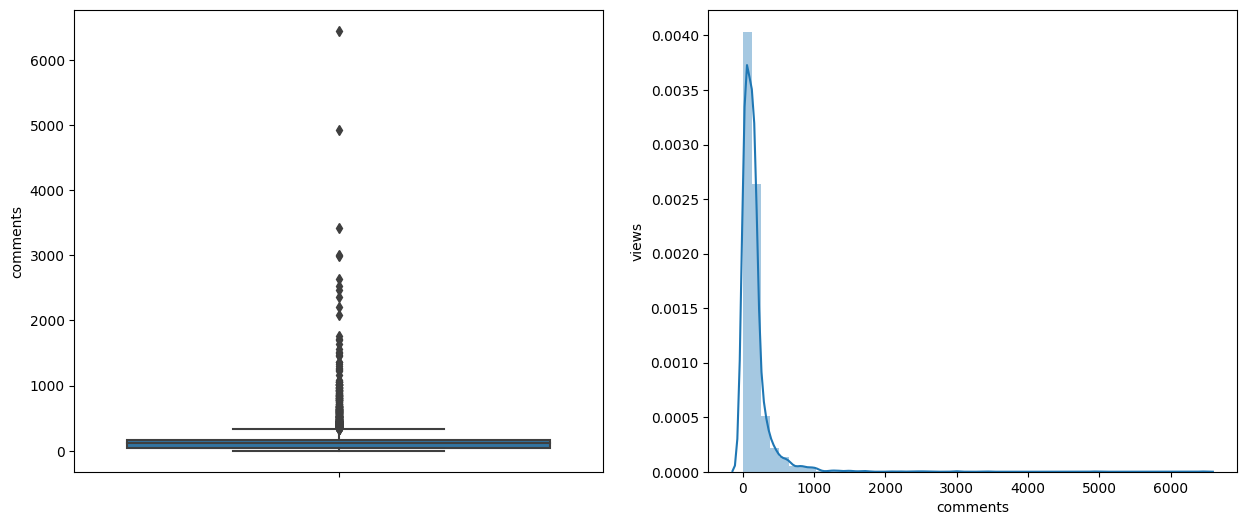

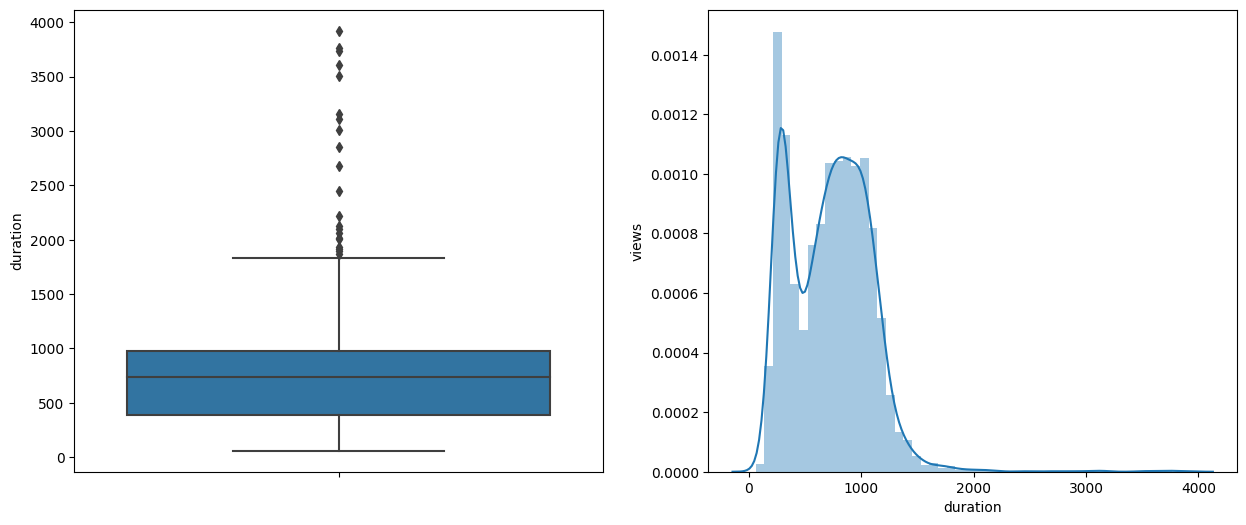

In [ ]:
for var in continous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=tedtalk_df[var])
    fig.set_title('')
    fig.set_ylabel(var)

    plt.subplot(1, 2, 2)
    fig = sns.distplot(tedtalk_df[var])
    fig.set_ylabel('views')
    fig.set_xlabel(var)

    plt.show()

In [ ]:
 tedtalk_df[['comments','duration']].describe().T


count        mean         std   min    25%    50%    75%     max
comments  4005.0  161.997015  245.868383   0.0   46.0  119.0  162.0  6449.0
duration  4005.0  724.011236  361.775462  60.0  393.0  738.0  974.0  3922.0

In [ ]:

#comments
#Finding IQR
Q3, Q1 = np.percentile(tedtalk_df['comments'], [75 ,25])
IQR = Q3 - Q1
upper = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR

In [ ]:
tedtalk_df.loc[tedtalk_df['comments']>upper,'comments'] = upper

<Axes: xlabel='comments', ylabel='Density'>

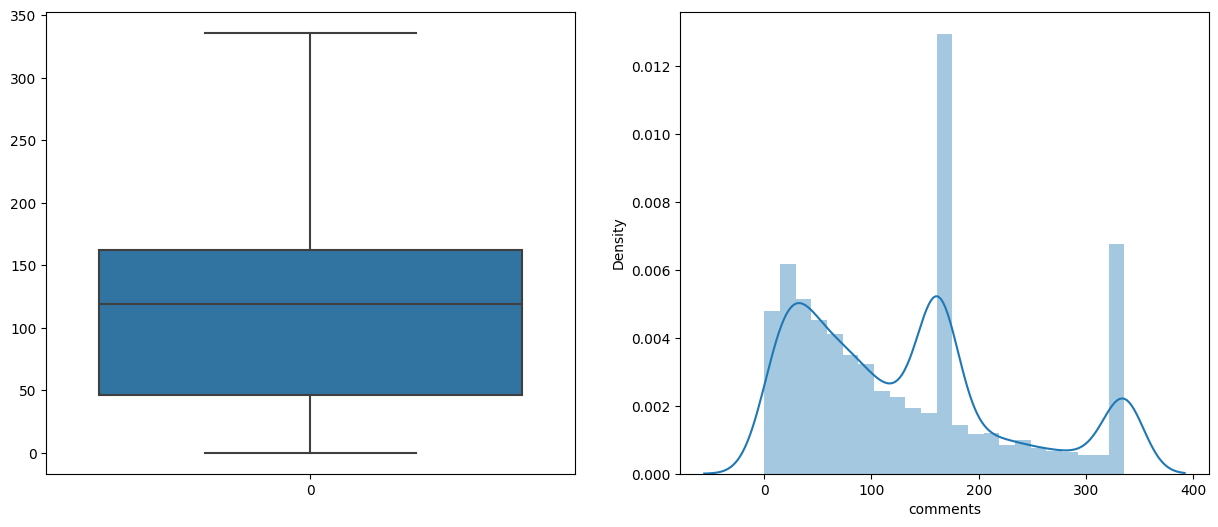

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.boxplot(tedtalk_df['comments'])
plt.subplot(1, 2, 2)
sns.distplot(tedtalk_df['comments'])

In [ ]:
tedtalk_df[['comments','duration']].describe().T

count        mean         std   min    25%    50%    75%     max
comments  4005.0  131.469175   98.182881   0.0   46.0  119.0  162.0   336.0
duration  4005.0  724.011236  361.775462  60.0  393.0  738.0  974.0  3922.0

In [ ]:
#duration
#Finding IQR
Q3, Q1 = np.percentile(tedtalk_df['duration'], [75 ,25])
IQR = Q3 - Q1
upper = Q3 +1.5*IQR
lower = Q1 - 1.5*IQR

In [ ]:
tedtalk_df.loc[tedtalk_df['duration']>upper,'duration'] = upper
#borderizing the outliers

<Axes: xlabel='duration', ylabel='Density'>

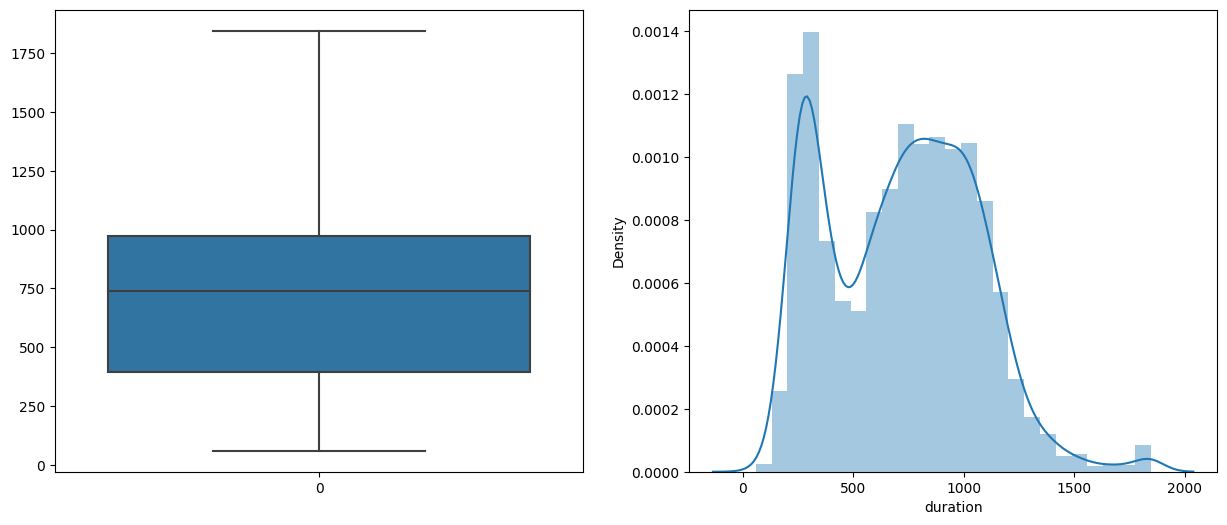

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.boxplot(tedtalk_df['duration'])
plt.subplot(1, 2, 2)
sns.distplot(tedtalk_df['duration'])
# plt.figure(figsize=(15,6))
# plt.subplot(1, 2, 1)
# sns.boxplot(tedtalk_df['duration'])
# plt.subplot(1, 2, 2)
# sns.distplot(tedtalk_df['duration'])

Here to treat outliers, we have used IQR method. Whatever the data were more than the Q3+1.5*IQR we tried equating it into upper range only. Only Comments and duration were treated this way.

To treat outliers in views column which was a dependent column we tried using the Z score.

<Axes: xlabel='views', ylabel='Density'>

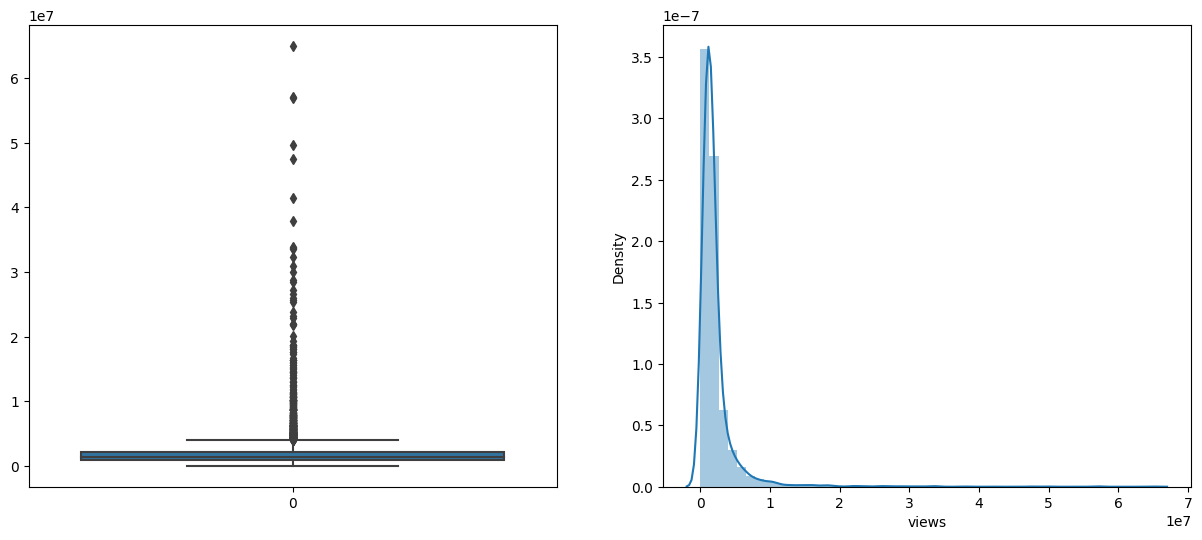

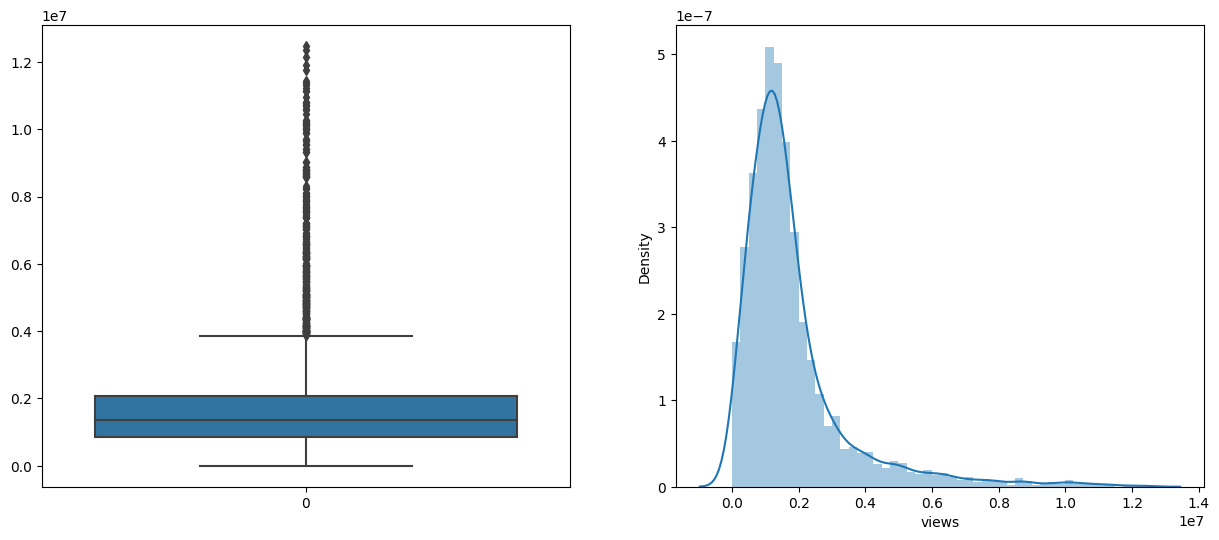

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.boxplot(tedtalk_df['views'])
plt.subplot(1, 2, 2)
sns.distplot(tedtalk_df['views'])


tedtalk_df = tedtalk_df[((tedtalk_df['views'] - tedtalk_df['views'].mean()) / tedtalk_df['views'].std()).abs() < 3]

plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.boxplot(tedtalk_df['views'])
plt.subplot(1, 2, 2)
sns.distplot(tedtalk_df['views'])

In [ ]:
ted_talk_2_df = tedtalk_df.copy()

In [ ]:
tedtalk_df = tedtalk_df.reset_index()

In [ ]:
tedtalk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3945 entries, 0 to 3944
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               3945 non-null   int64         
 1   title               3945 non-null   object        
 2   speaker_1           3945 non-null   object        
 3   about_speakers      3945 non-null   object        
 4   views               3945 non-null   int64         
 5   recorded_date       3945 non-null   datetime64[ns]
 6   published_date      3945 non-null   datetime64[ns]
 7   event               3945 non-null   object        
 8   native_lang         3945 non-null   object        
 9   available_lang      3945 non-null   object        
 10  comments            3945 non-null   float64       
 11  duration            3945 non-null   float64       
 12  topics              3945 non-null   object        
 13  related_talks       3945 non-null   object      

# **Feature** **Engineering**

Now we start with the Feature engineering, we create a new variable from the existing one or we alter the existing variable into the new one to enhance the performance of the model.

In [ ]:
from datetime import date
today = pd.to_datetime(date.today(), format='%Y-%m-%d')


In [ ]:
#creating a column with video age
tedtalk_df['video_age'] = (today - tedtalk_df['published_date']).apply(lambda x: x.days)
# Creating a daily views column
tedtalk_df['views_per_day'] = tedtalk_df['views'] / ( tedtalk_df['video_age'] + 1 )

In [ ]:

#Finding average views according to first speaker
tedtalk_df['speaker_1_average_views'] = tedtalk_df['speaker_1'].map(list(tedtalk_df.groupby('speaker_1').agg({'views_per_day' : 'mean'}).
                                                         sort_values(['views_per_day'],ascending=False).to_dict().values())[0])

#Finding average views according to event
tedtalk_df['event_average_views'] = tedtalk_df['event'].map(list(tedtalk_df.groupby('event').agg({'views_per_day' : 'mean'}).
                                                 sort_values(['views_per_day'],ascending=False).to_dict().values())[0])


In [ ]:
#Checking for unique topic
unique_topics=[]
for i in range(0,len(tedtalk_df)):
  temp=tedtalk_df['topics'][i]
  for i in temp:
    if(i not in unique_topics):
      unique_topics.append(i)


# Creating a dictionary with unique topics wrt average views
unique_topics_avg_view_dict={}
for topic in unique_topics:
  temp, count = 0, 0

  for i in range(0,len(tedtalk_df)):
    temp2=tedtalk_df['topics'][i]
    if(topic in temp2):
      temp+=tedtalk_df['views_per_day'][i]
      count+=1
  unique_topics_avg_view_dict[topic]=temp//count

# Creating a list and appending with average views wrt topic
topics_wise_average_views=[]
for i in range(0,len(tedtalk_df)):
  temp=0
  temp_topic=tedtalk_df['topics'][i]
  for element in temp_topic:
    temp+= unique_topics_avg_view_dict[element]

  topics_wise_average_views.append(temp//len(temp_topic))


In [ ]:

# Creating a new columns with average topic views
tedtalk_df['topics_wise_avg_views'] = pd.Series(topics_wise_average_views).values

# Creating a unique topics column which contain number of unique topics spoken on in an event
tedtalk_df['unique_topics'] = tedtalk_df['topics'].str.len()

In [ ]:
tedtalk_df['subtitles_count'] = tedtalk_df.available_lang.apply(lambda x: len(x))

tedtalk_df['Telecasted_after'] = (tedtalk_df['published_date'] - tedtalk_df['recorded_date']).apply(lambda x: x.days)
#creating a new variable 'telecasted after' which holds the difference between published date and recorded date


In [ ]:
tedtalk_df.head(2)

index                        title    speaker_1  \
0      0  Averting the climate crisis      Al Gore   
1      2             Simplicity sells  David Pogue   

                                      about_speakers    views recorded_date  \
0  Nobel Laureate Al Gore focused the world’s att...  3523392    2006-02-25   
1  David Pogue is the personal technology columni...  1920832    2006-02-24   

  published_date    event native_lang  \
0     2006-06-27  TED2006          en   
1     2006-06-27  TED2006          en   

                                      available_lang  ...  release_year  \
0  [ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...  ...          2006   
1  [ar, bg, de, el, en, es, fa, fr, he, hr, hu, i...  ...          2006   

     speaker_occupation video_age views_per_day speaker_1_average_views  \
0      climate advocate      6308    558.470756              469.752808   
1  technology columnist      6308    304.459027              483.790618   

  event_average_views topics_wise_avg_views unique_topics  subtitles_count  \
0          340.543774                 573.0             9               43   
1          340.543774                 531.0             9               26   

  Telecasted_after  
0              122  
1              123  

[2 rows x 28 columns]

In [ ]:
tedtalk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3945 entries, 0 to 3944
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   index                    3945 non-null   int64         
 1   title                    3945 non-null   object        
 2   speaker_1                3945 non-null   object        
 3   about_speakers           3945 non-null   object        
 4   views                    3945 non-null   int64         
 5   recorded_date            3945 non-null   datetime64[ns]
 6   published_date           3945 non-null   datetime64[ns]
 7   event                    3945 non-null   object        
 8   native_lang              3945 non-null   object        
 9   available_lang           3945 non-null   object        
 10  comments                 3945 non-null   float64       
 11  duration                 3945 non-null   float64       
 12  topics                   3945 non-

In [ ]:
df = tedtalk_df[['comments','duration','release_day','release_month','release_year',
                 'Telecasted_after','video_age','views_per_day','speaker_1_average_views','event_average_views','topics_wise_avg_views','unique_topics','subtitles_count']]
                 #taking only imp columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3945 entries, 0 to 3944
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   comments                 3945 non-null   float64
 1   duration                 3945 non-null   float64
 2   release_day              3945 non-null   object 
 3   release_month            3945 non-null   object 
 4   release_year             3945 non-null   int64  
 5   Telecasted_after         3945 non-null   int64  
 6   video_age                3945 non-null   int64  
 7   views_per_day            3945 non-null   float64
 8   speaker_1_average_views  3945 non-null   float64
 9   event_average_views      3945 non-null   float64
 10  topics_wise_avg_views    3945 non-null   float64
 11  unique_topics            3945 non-null   int64  
 12  subtitles_count          3945 non-null   int64  
dtypes: float64(6), int64(5), object(2)
memory usage: 400.8+ KB


In [ ]:
df.describe().T

count         mean          std          min  \
comments                 3945.0   129.010664    96.452268     0.000000   
duration                 3945.0   717.511787   338.555275    60.000000   
release_year             3945.0  2014.625602     3.988702  2006.000000   
Telecasted_after         3945.0   306.804309   582.314211  -578.000000   
video_age                3945.0  3164.854753  1445.237577  1252.000000   
views_per_day            3945.0   696.510493   721.475277     0.000000   
speaker_1_average_views  3945.0   696.510493   659.433589     0.000000   
event_average_views      3945.0   696.510493   363.942116     8.031524   
topics_wise_avg_views    3945.0   722.769835   141.708915   374.000000   
unique_topics            3945.0     7.930038     3.896177     1.000000   
subtitles_count          3945.0    25.076299     8.837186     1.000000   

                                 25%          50%          75%          max  
comments                   46.000000   115.000000   161.997015   336.000000  
duration                  390.000000   735.000000   970.000000  1845.500000  
release_year             2011.000000  2015.000000  2018.000000  2020.000000  
Telecasted_after           42.000000   104.000000   228.000000  8804.000000  
video_age                1800.000000  2910.000000  4351.000000  6308.000000  
views_per_day             245.295281   486.834008   905.688616  7042.738334  
speaker_1_average_views   271.769944   520.591952   910.119853  6199.804226  
event_average_views       362.463627   690.063261  1060.246589  5233.722396  
topics_wise_avg_views     618.000000   701.000000   808.000000  1222.000000  
unique_topics               5.000000     7.000000    10.000000    33.000000  
subtitles_count            20.000000    25.000000    31.000000    73.000000

In [ ]:
df.columns

Index(['comments', 'duration', 'release_day', 'release_month', 'release_year',
       'Telecasted_after', 'video_age', 'views_per_day',
       'speaker_1_average_views', 'event_average_views',
       'topics_wise_avg_views', 'unique_topics', 'subtitles_count'],
      dtype='object')

Now that more variables are created in the abovve steps, we check for the outlier once again to make sure that our data is free of outliers.

In [ ]:
def remove_outlier(df,column):

  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  plt.title('Before Treating outliers')
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])
  df = df[((df[column] - df[column].mean()) / df[column].std()).abs() < 3]

  plt.figure(figsize=(15,6))

  plt.subplot(1, 2, 1)
  plt.title('After Treating outliers')
  sns.boxplot(df[column])
  plt.subplot(1, 2, 2)
  sns.distplot(df[column])


In [ ]:
df.describe().columns

Index(['comments', 'duration', 'release_year', 'Telecasted_after', 'video_age',
       'views_per_day', 'speaker_1_average_views', 'event_average_views',
       'topics_wise_avg_views', 'unique_topics', 'subtitles_count'],
      dtype='object')

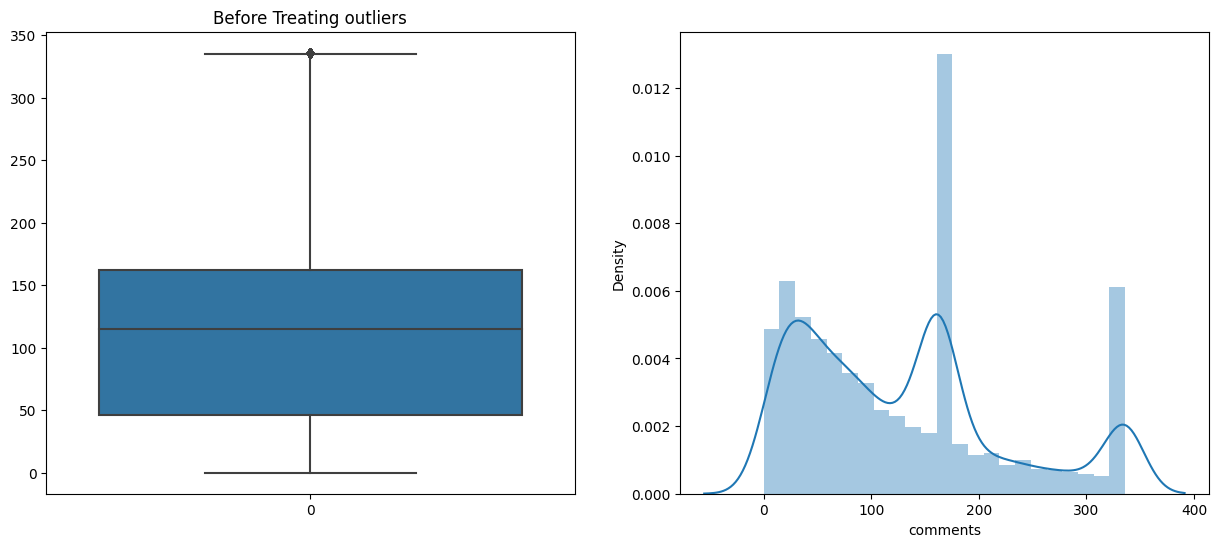

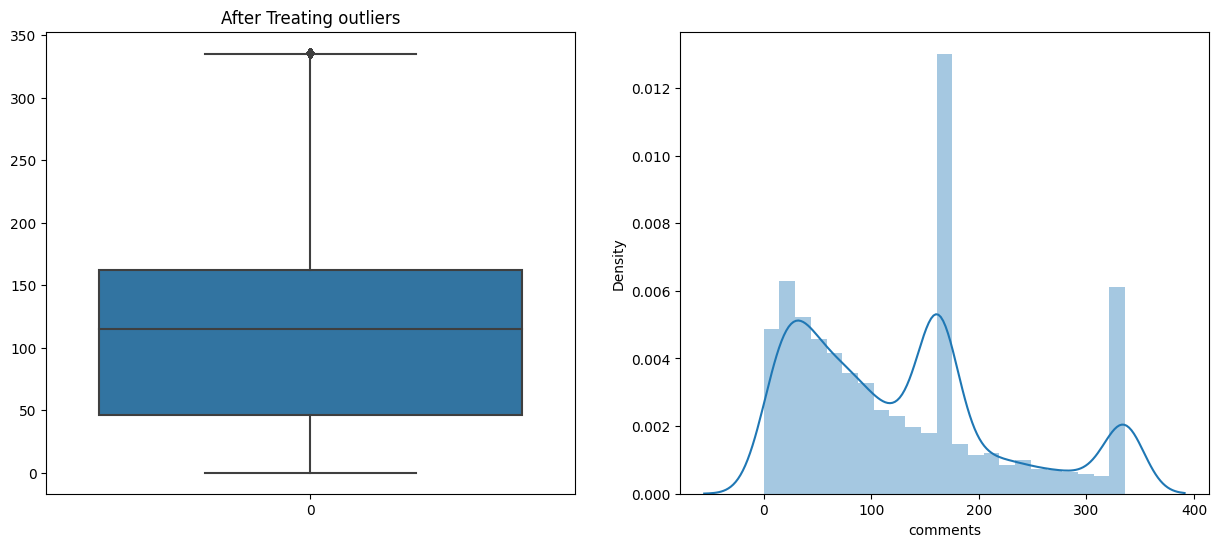

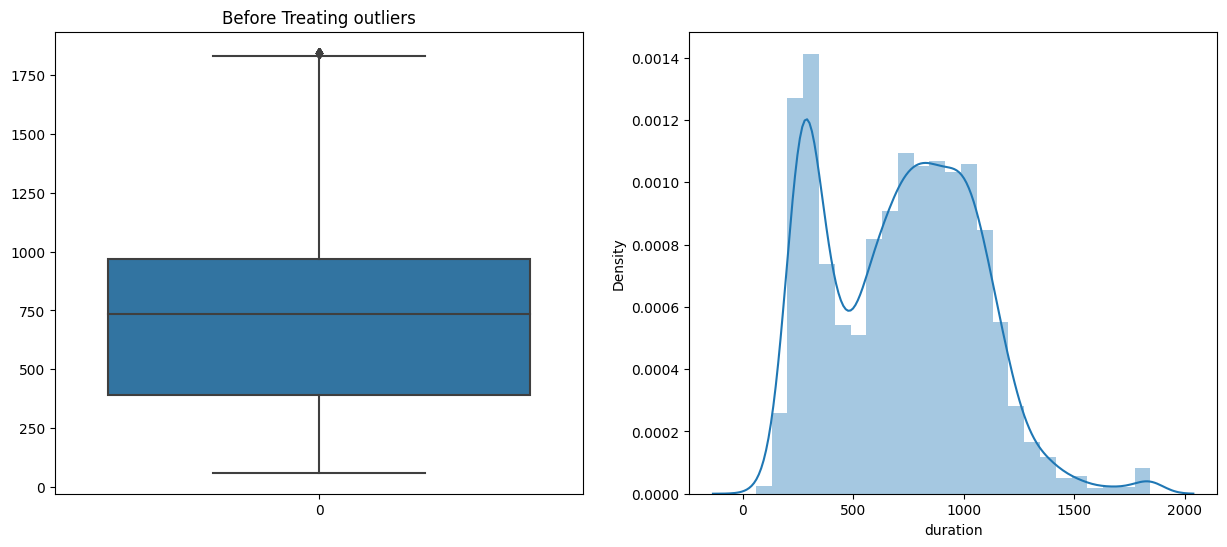

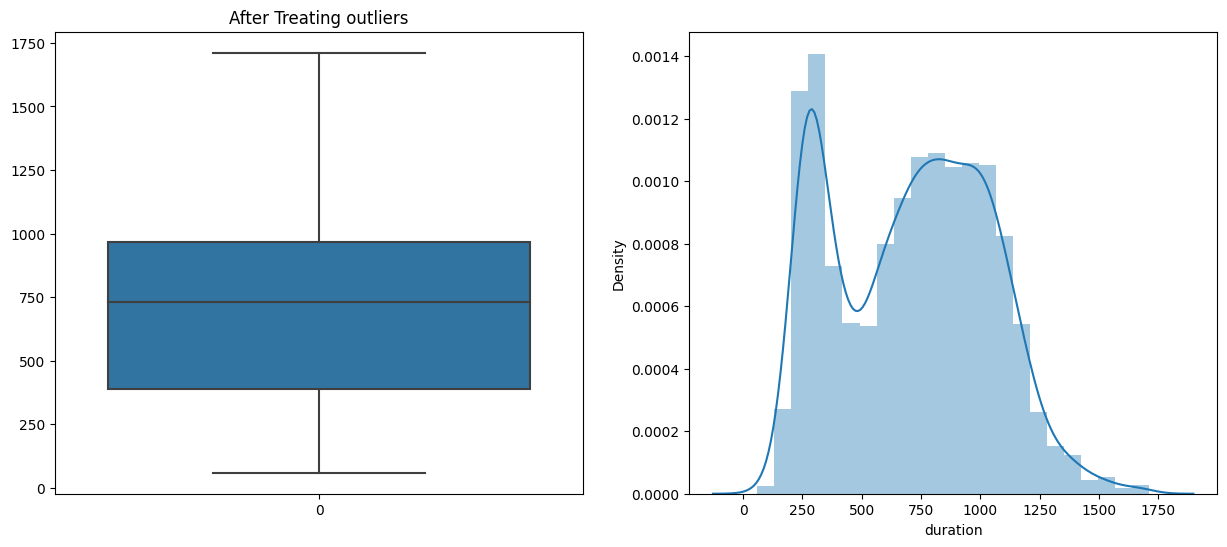

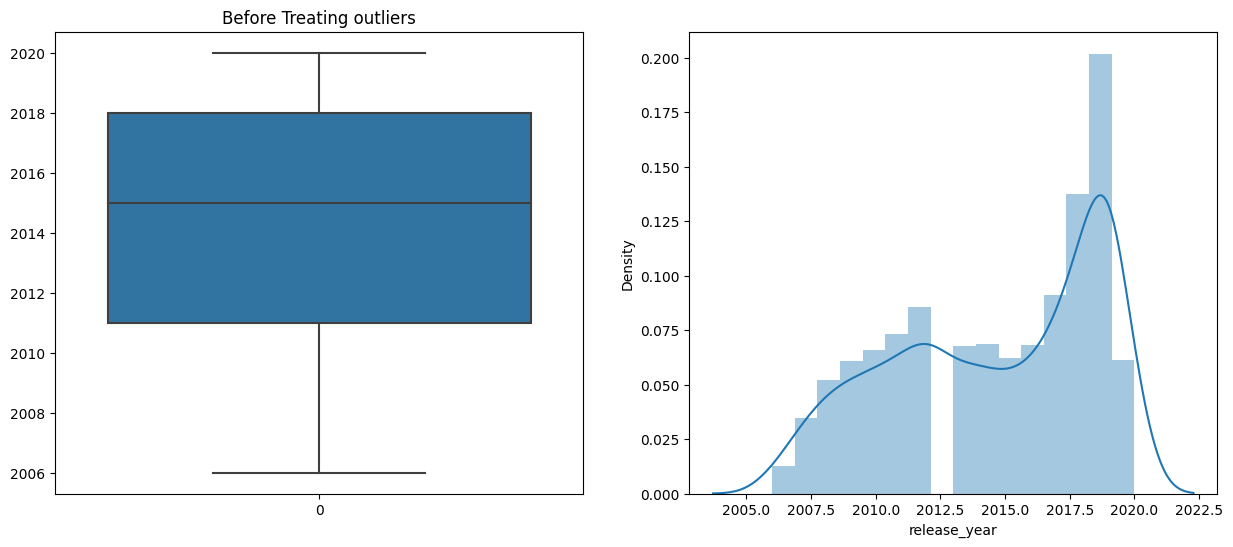

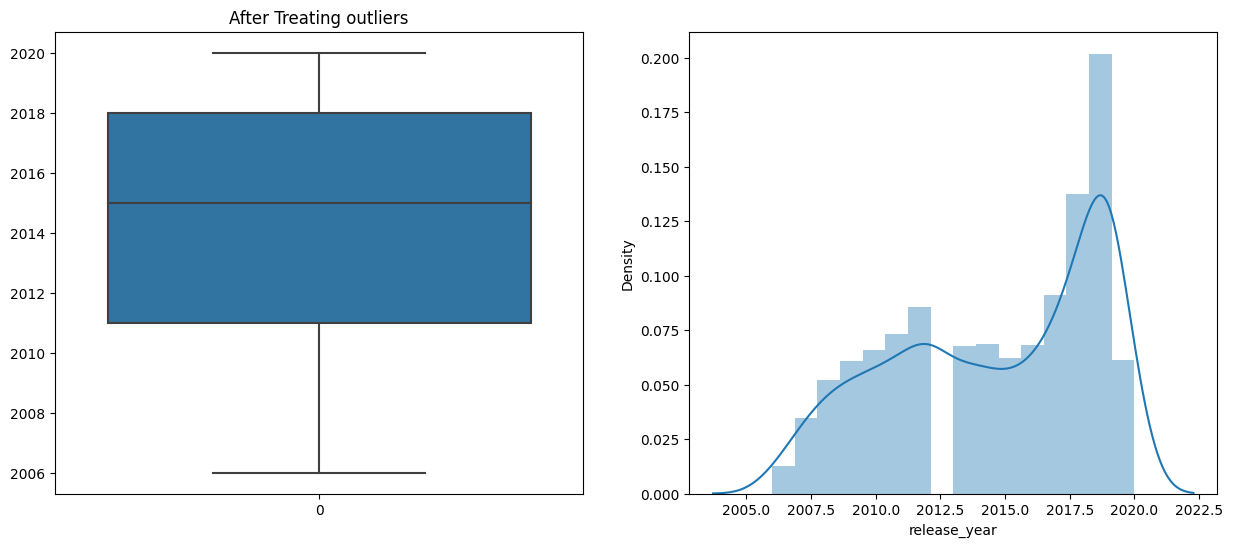

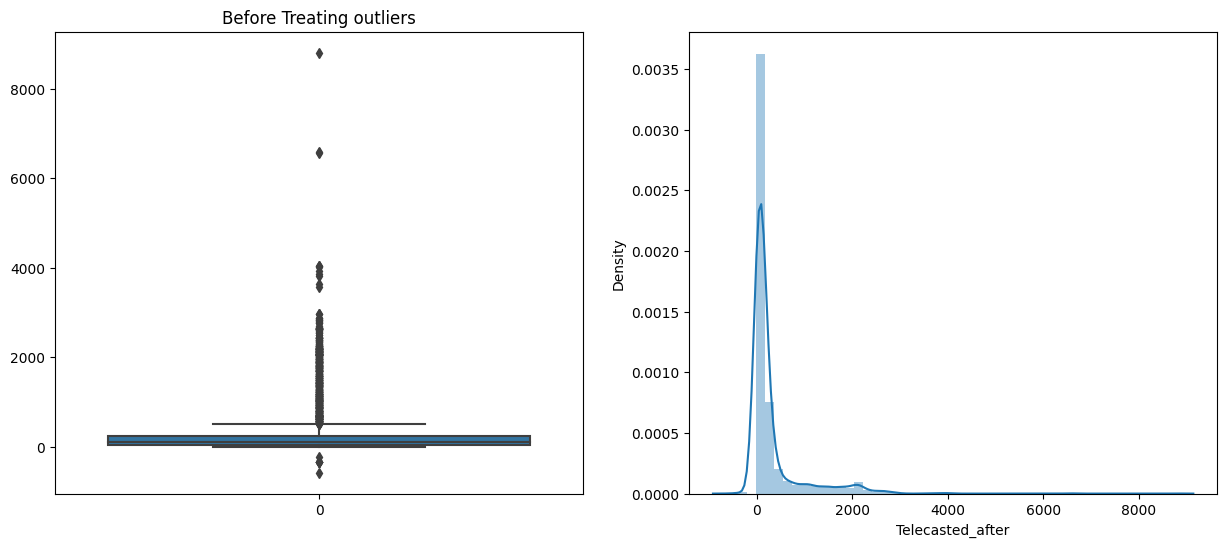

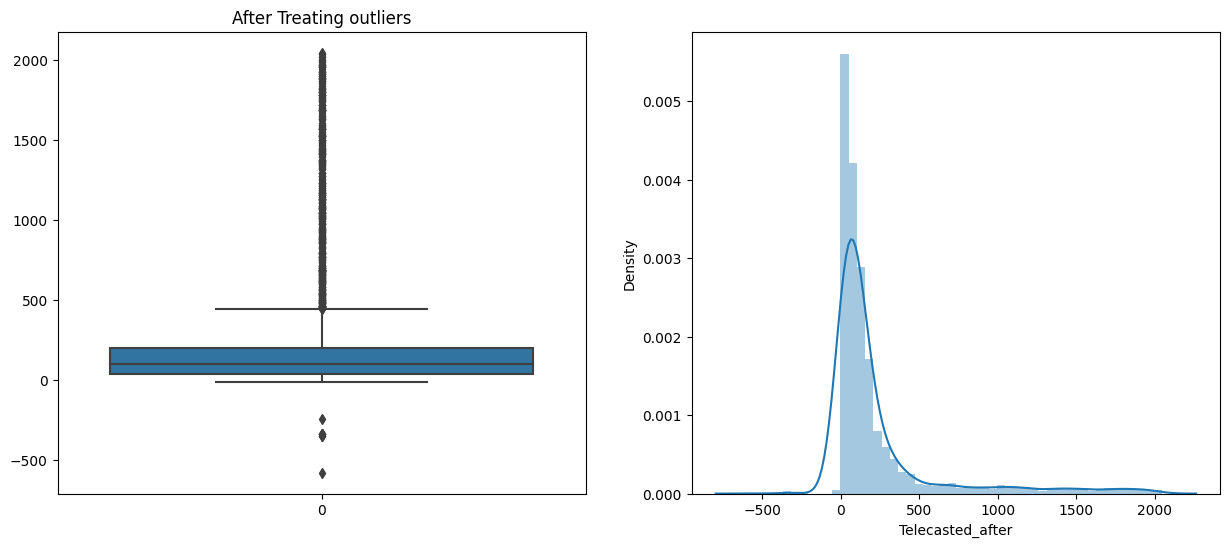

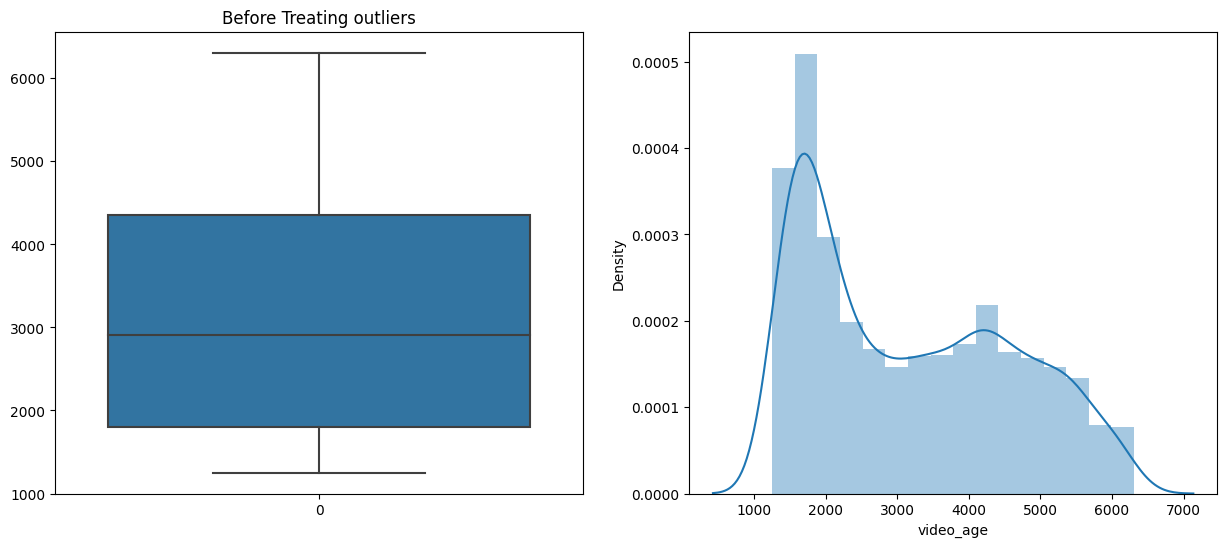

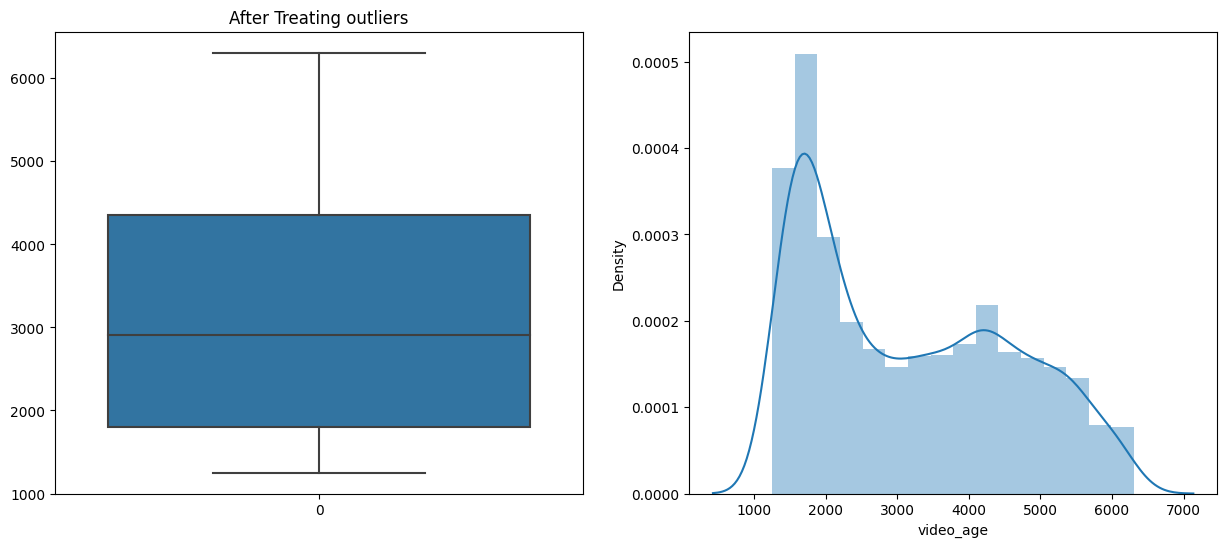

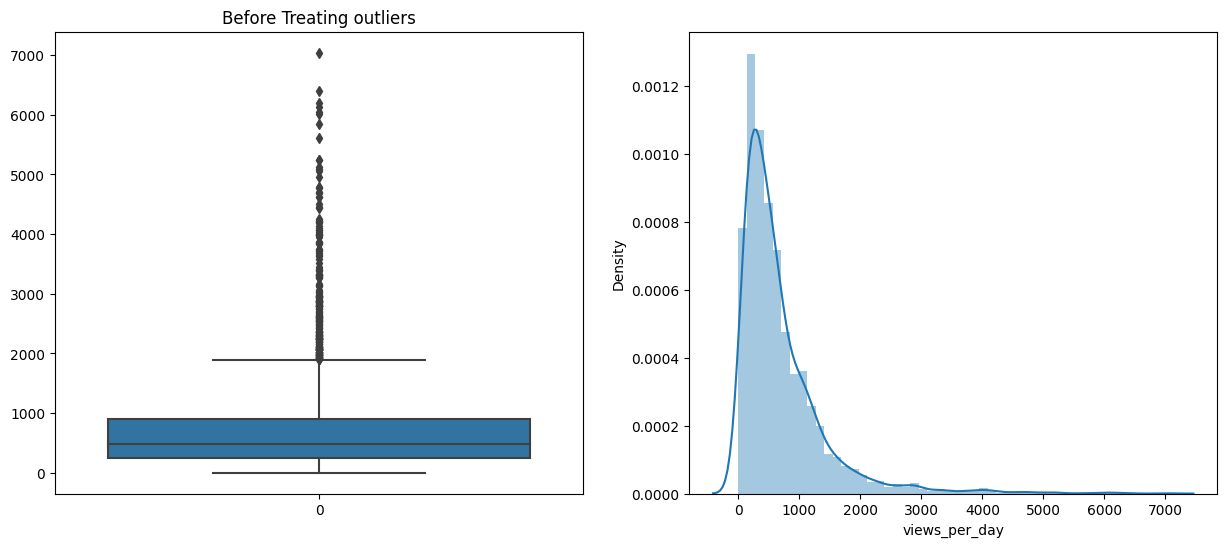

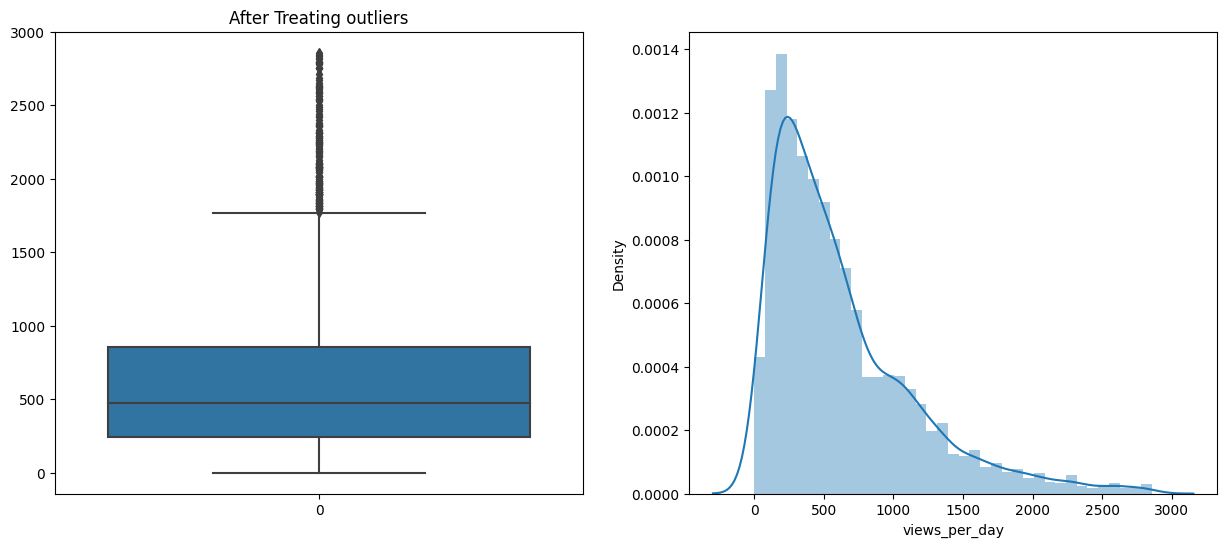

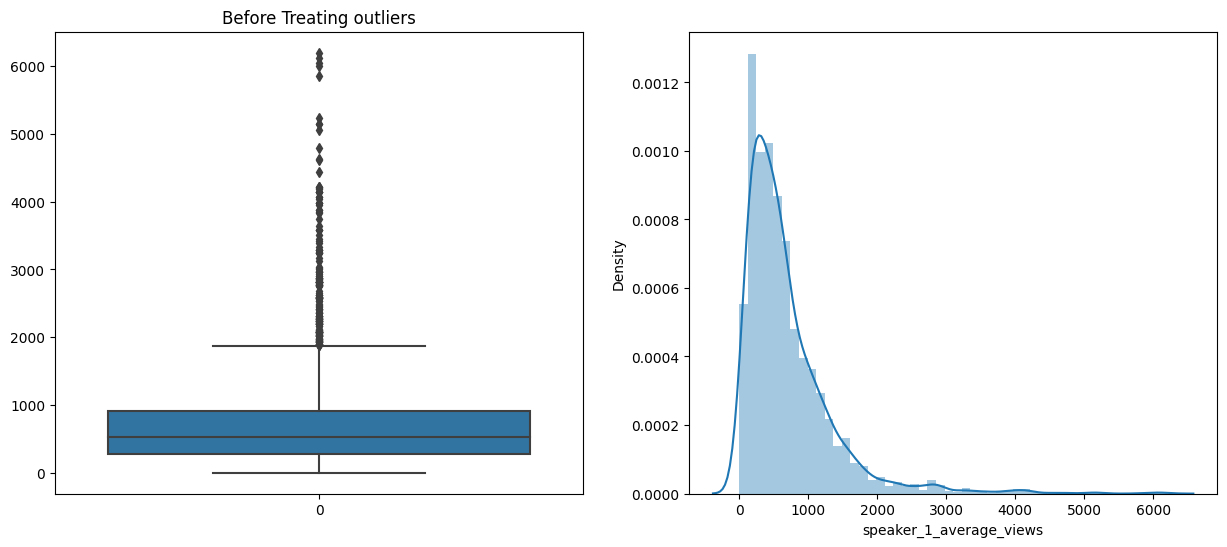

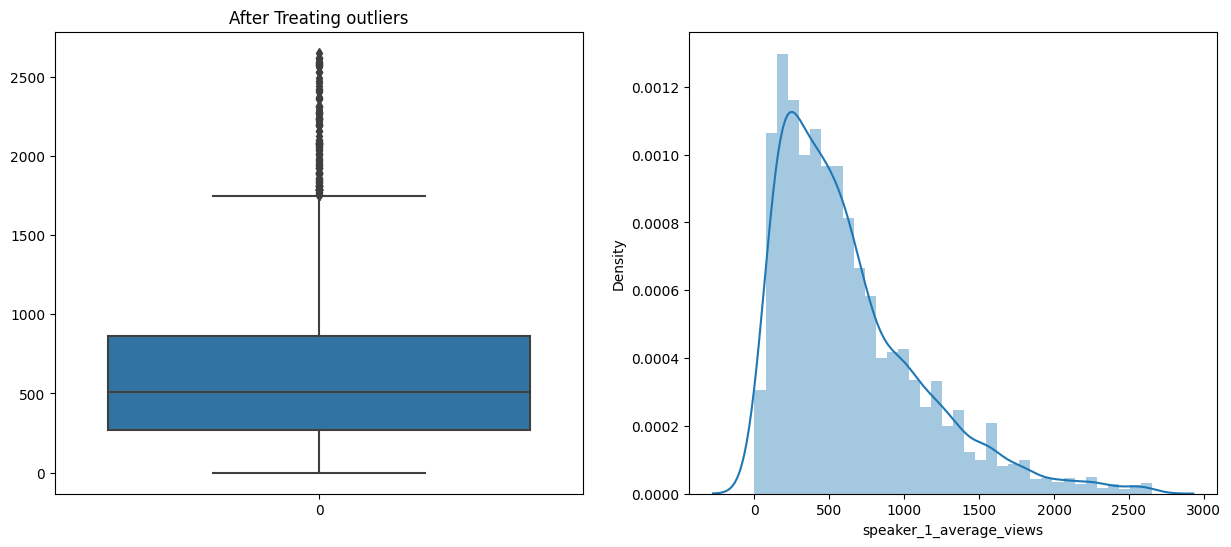

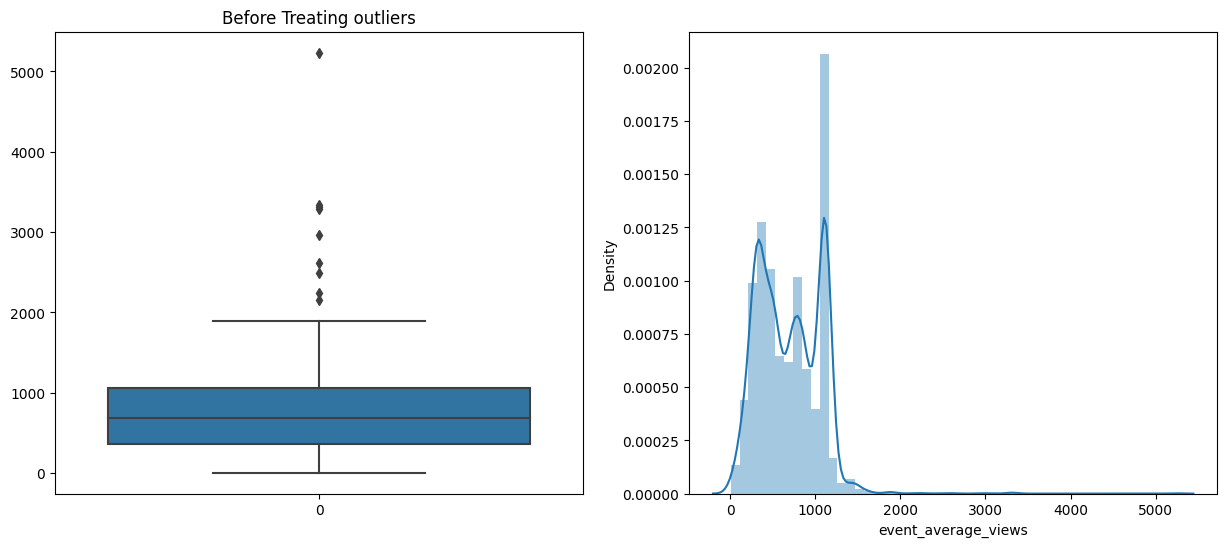

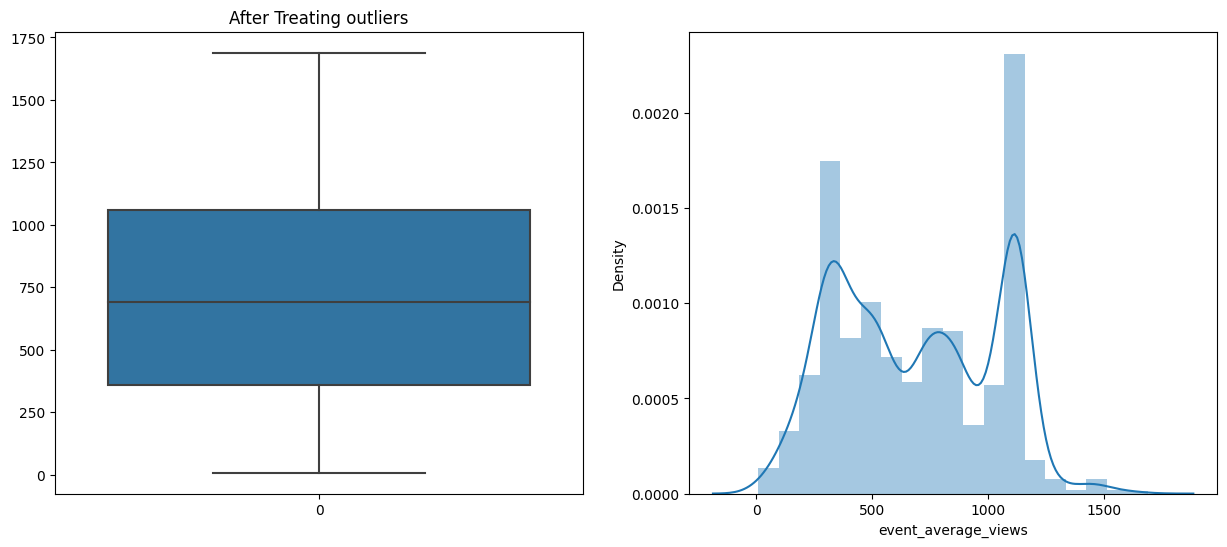

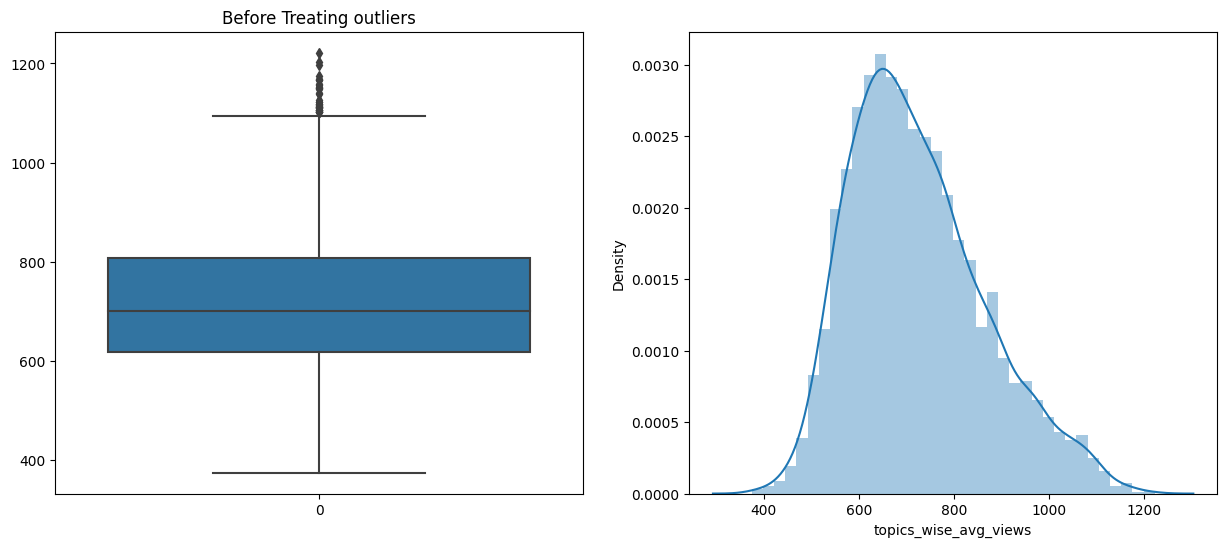

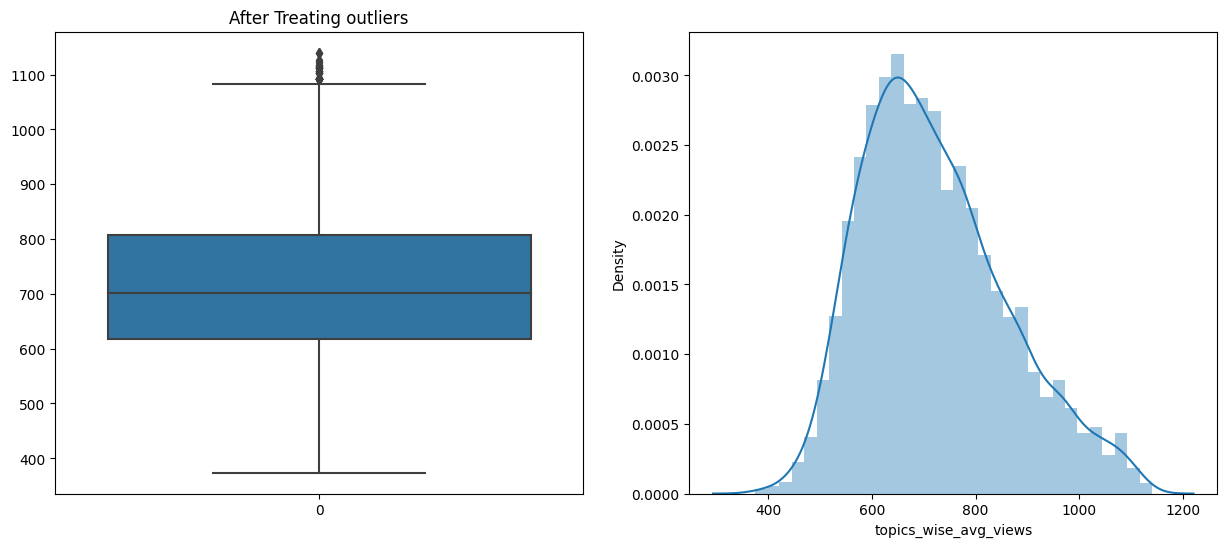

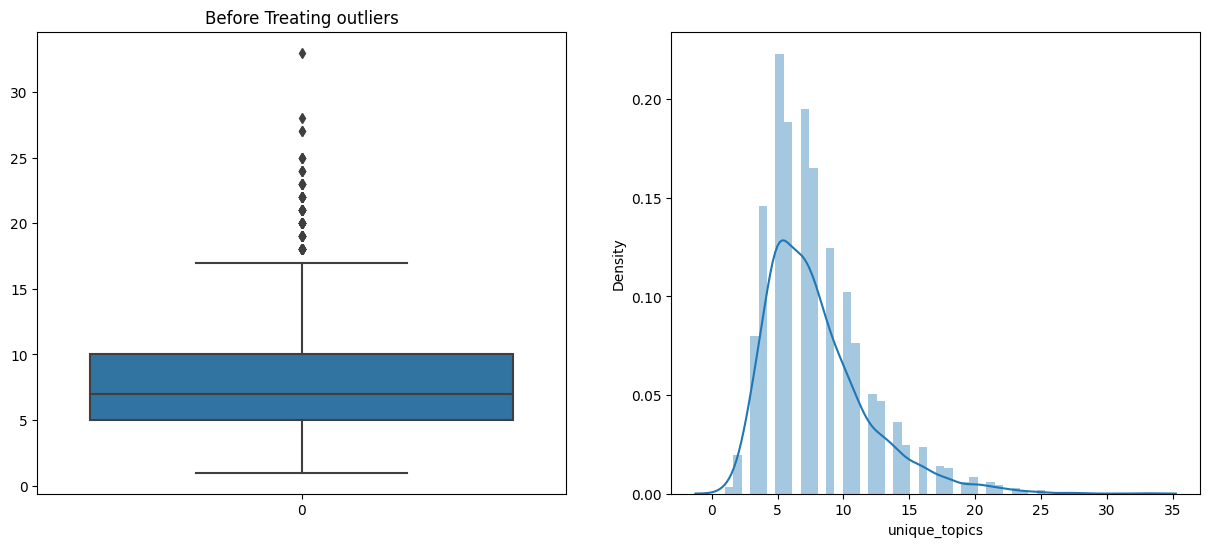

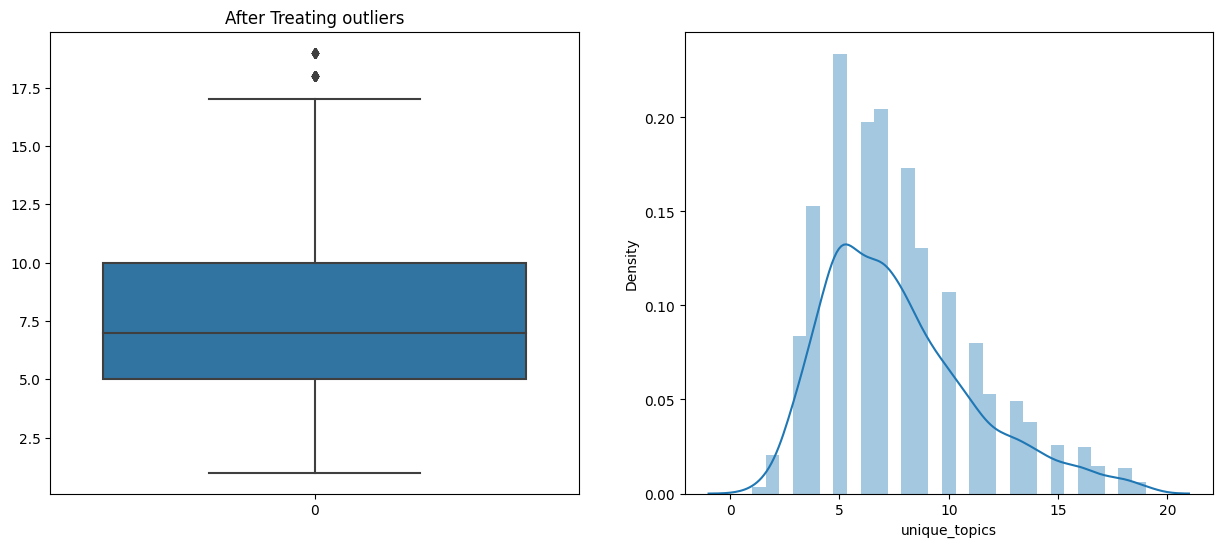

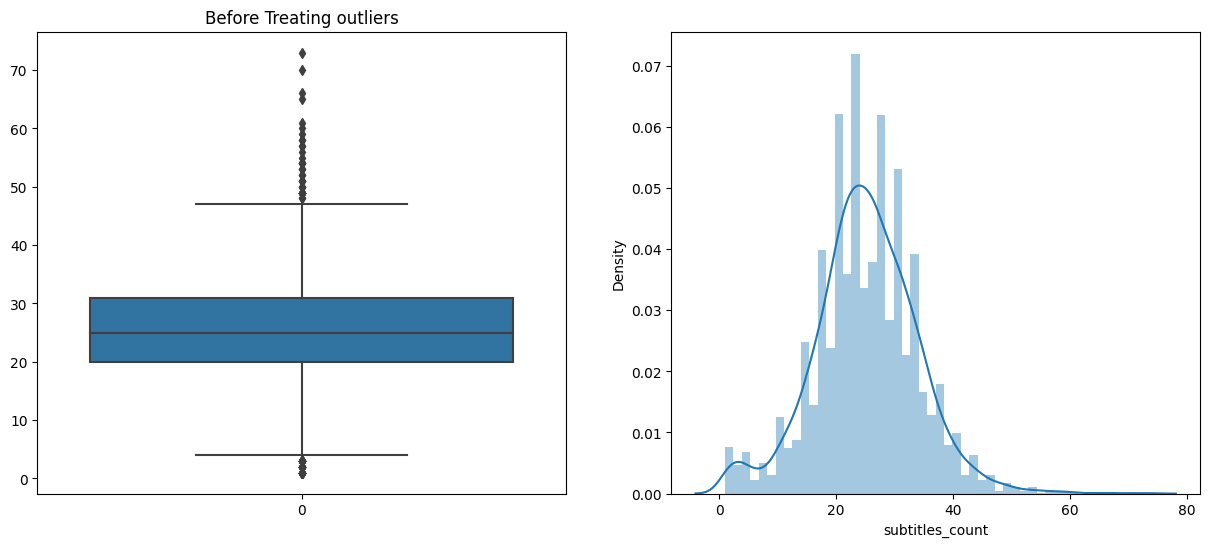

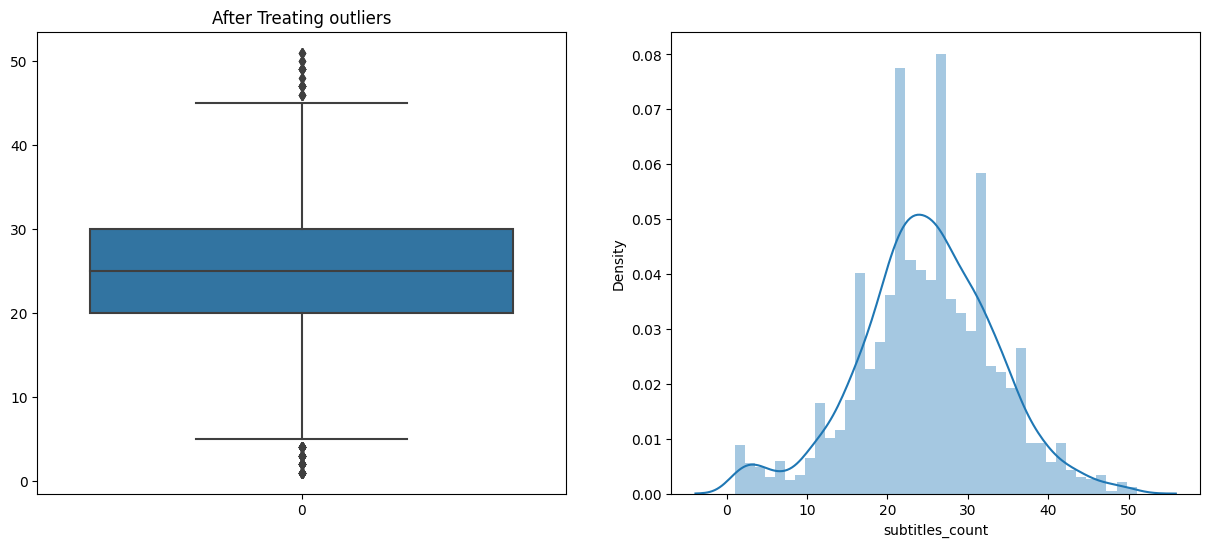

In [ ]:
for column in df.describe().columns:
  remove_outlier(df,column)

In [ ]:
df.drop('Telecasted_after',axis=1,inplace=True)
#It has alot of outliers...better not to consider it

In [ ]:
df_2 = df.copy()

In [ ]:
#df = df_2.copy()

#**Checking the conditions for LR**

Now that Feature engineering is done, we need to start with train test split and start building our models. But since we are trying to start with linear regression in here, we need to check several criterias for LR.

In [ ]:
# defining in X and Y
y = df['views_per_day']
X = df.drop(columns=['views_per_day'])

In [ ]:
X.head(2)

comments  duration release_day release_month  release_year  video_age  \
0     272.0     977.0     Tuesday          June          2006       6308   
1     124.0    1286.0     Tuesday          June          2006       6308   

   speaker_1_average_views  event_average_views  topics_wise_avg_views  \
0               469.752808           340.543774                  573.0   
1               483.790618           340.543774                  531.0   

   unique_topics  subtitles_count  
0              9               43  
1              9               26

In [ ]:
#to check multicollinearity, normal distribution, we need only numerical data, we dont want categorical variable
X_without_categorical_variable  = X[['comments', 'duration','video_age', 'speaker_1_average_views',
                                      'event_average_views', 'topics_wise_avg_views', 'unique_topics','subtitles_count']]

# to check linearity with the dependent variable.
df_without_categorical_variable =  df[['comments', 'duration','video_age','views_per_day','speaker_1_average_views',
                                      'event_average_views', 'topics_wise_avg_views', 'unique_topics','subtitles_count']]

##**1)Checking linearity between the dependednt and independent variables**

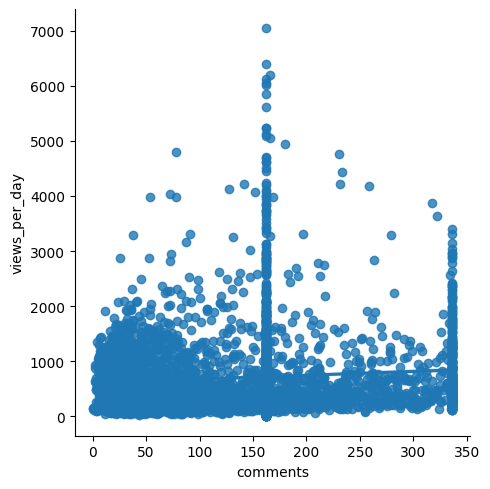

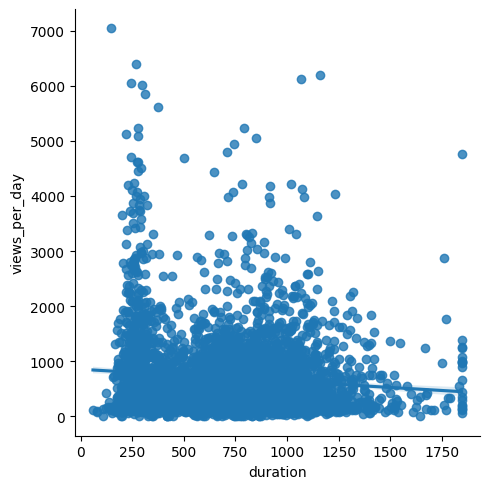

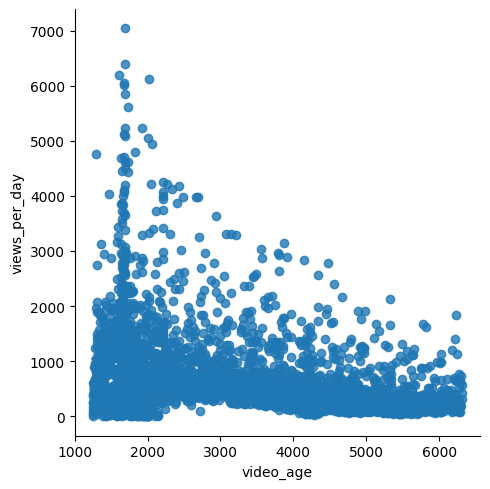

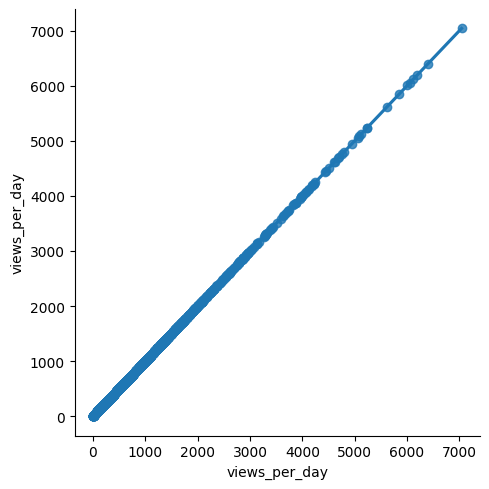

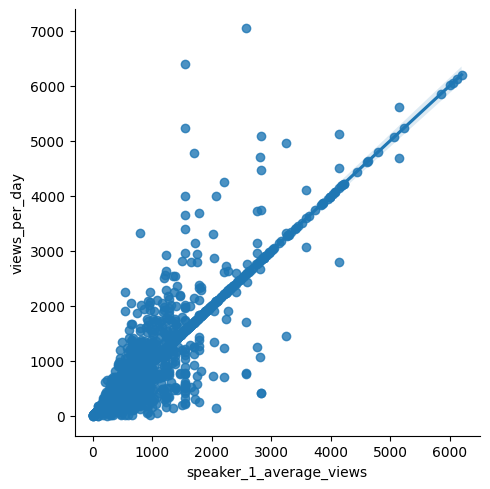

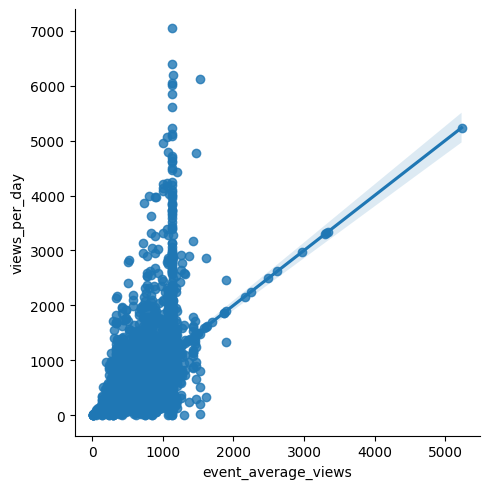

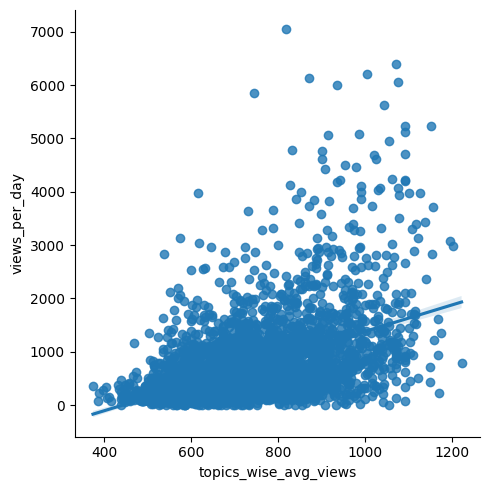

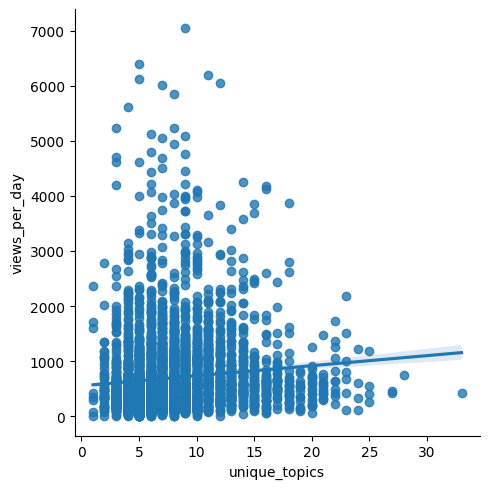

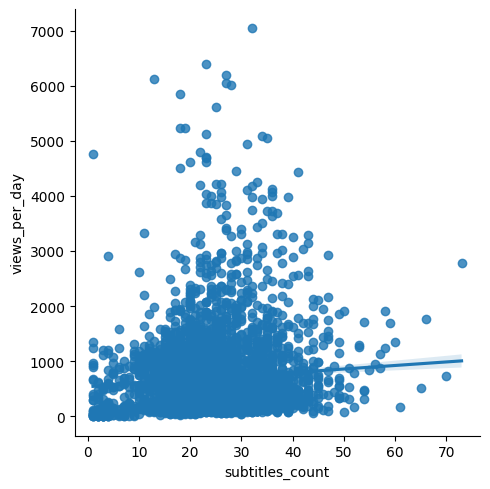

In [ ]:
for column in df_without_categorical_variable:
  sns.lmplot(x=column, y="views_per_day", data=df_without_categorical_variable, order=1)
# plt.ylabel('Target')
# plt.xlabel('Independent variable')

##**2) Multi collinearity should be vavoided**

In [ ]:
DF = X_without_categorical_variable.copy()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
VIF_df = calc_vif(X[[i for i in DF.describe().columns ]])
VIF_df

variables        VIF
0                 comments   3.821024
1                 duration   7.531857
2                video_age  17.833950
3  speaker_1_average_views   3.322729
4      event_average_views   9.953246
5    topics_wise_avg_views  21.790497
6            unique_topics   5.433328
7          subtitles_count  17.346742

In [ ]:
calc_vif(DF[[i for i in DF.describe().columns if i not in ['video_age','topics_wise_avg_views','subtitles_count'] ]])
#trying to leave which ever had >10

variables       VIF
0                 comments  2.517408
1                 duration  3.851897
2  speaker_1_average_views  2.974797
3      event_average_views  5.178073
4            unique_topics  4.717886

By VIF factor we have kept only few of the columns with less VIF score.

##**3)All independednt variabels should be normally distributed**
Here we checking from QQ plot




## ***Applying Transformation***

In [ ]:
#As we have more number of varibales,trying to create a function which does the plotting and transformation.
#But be carefull as we have several variables with positively skewed data and 'not-normal' data.
#Whenever we have positively skewed data we need to use the log transformation. Or else we can use Boxcox transformation.

#import libraries
import scipy.stats as stats
import pylab

def to_plot(column):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  sns.distplot(DF[column])
  plt.subplot(1,2,2)
  stats.probplot(DF[column],dist='norm',plot=pylab)
  plt.show()


def log_transform(column):
  print("Before Transformation")
  to_plot(column)
  # applying log transformation
  DF[column]=np.log1p(DF[column])
  #plotting
  print("After Transformation")
  to_plot(column)
  # stats.probplot()

def box_cox_transform(column):
  print("Before Transformation")
  to_plot(column)
  # applying boxcox transformation
  DF[column],parameters=stats.boxcox(DF[column])
  print("After Transformation")
  to_plot(column)

def square_root_transform(column):
  print("Before Transformation")
  to_plot(column)
  DF[column]=DF[column]**(1/2)
  print("After Transformation")
  to_plot(column)

def exponential_transform(column):
  print("Before Transformation")
  to_plot(column)
  DF[column]=DF[column]**(1/1.2)
  print("After Transformation")
  to_plot(column)


def power_transform(column):
  print("Applying Power Transformation.\n Before Transformation")
  to_plot(column)
  # applying power transformation
  DF[column]=np.power(DF[column],1/2)
  #plotting
  print("After Transformation")
  to_plot(column)
  # stats.probplot()


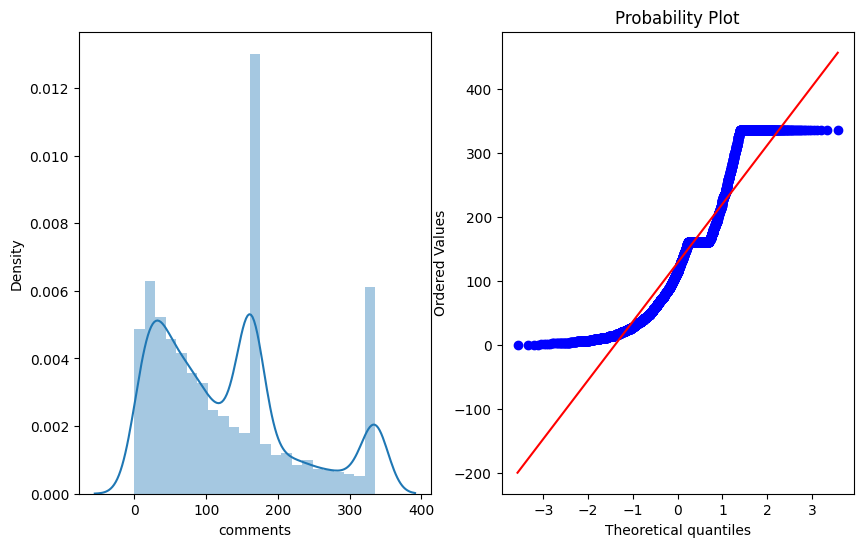

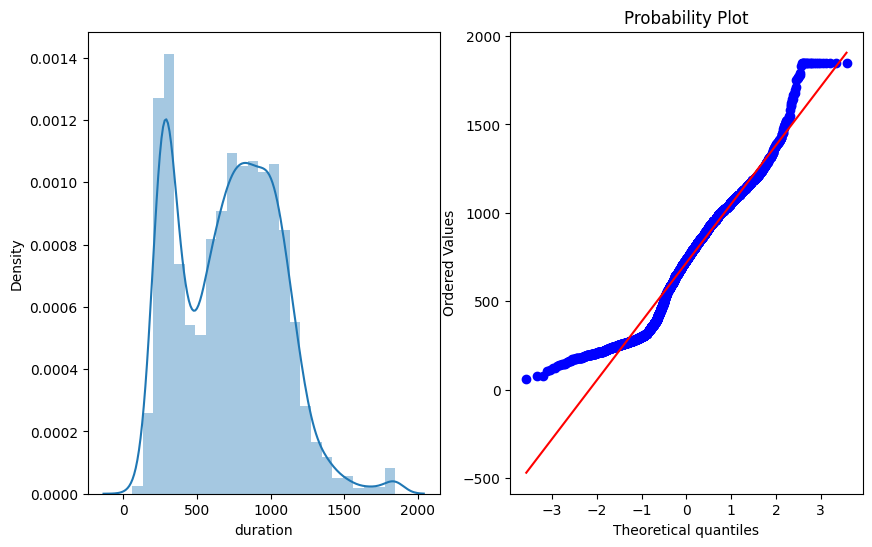

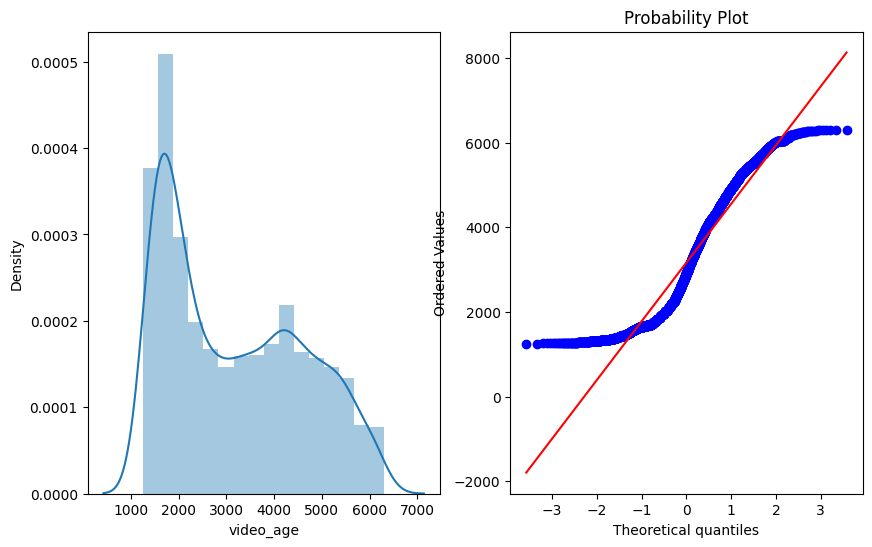

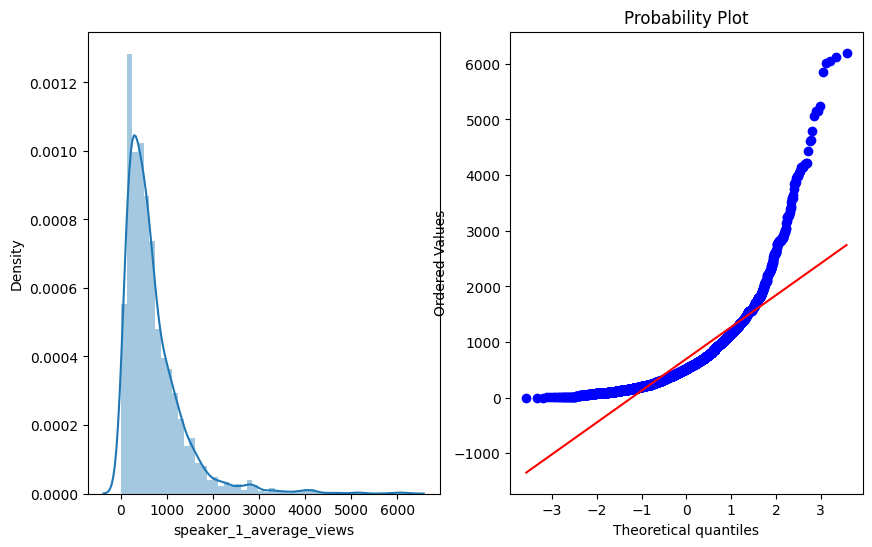

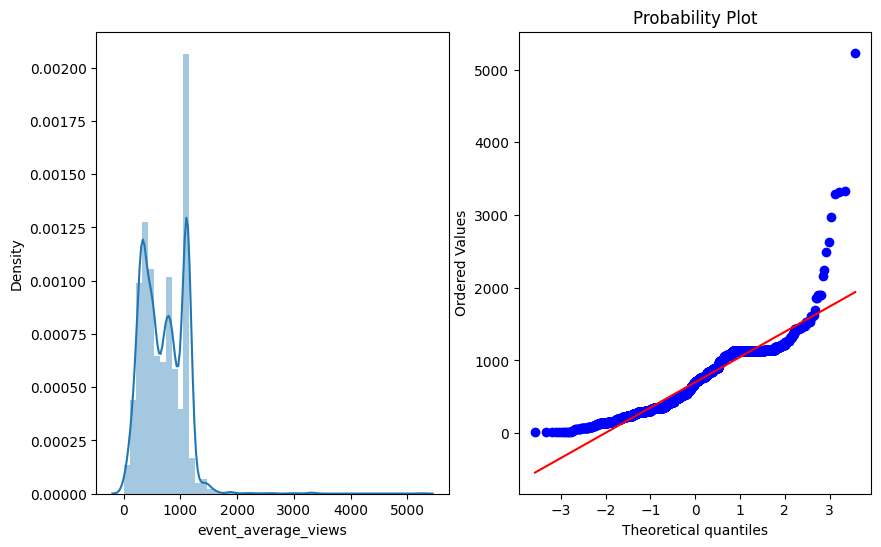

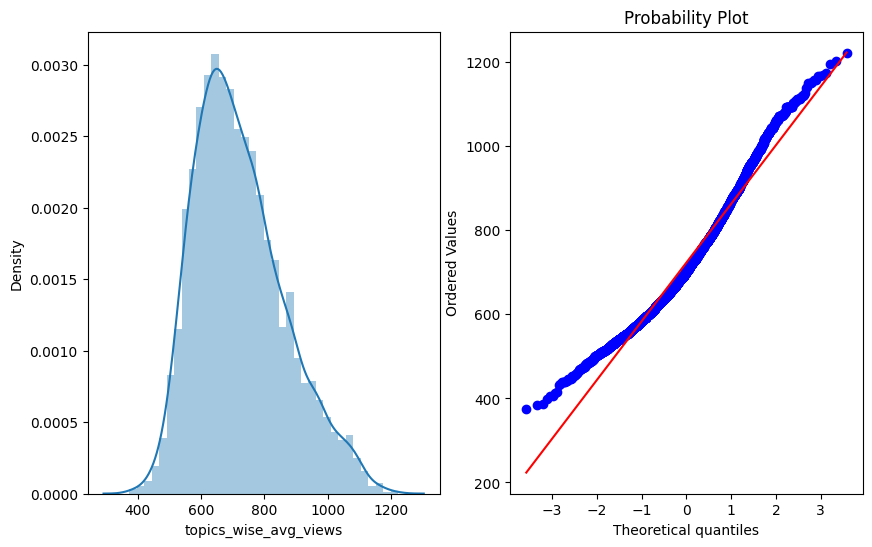

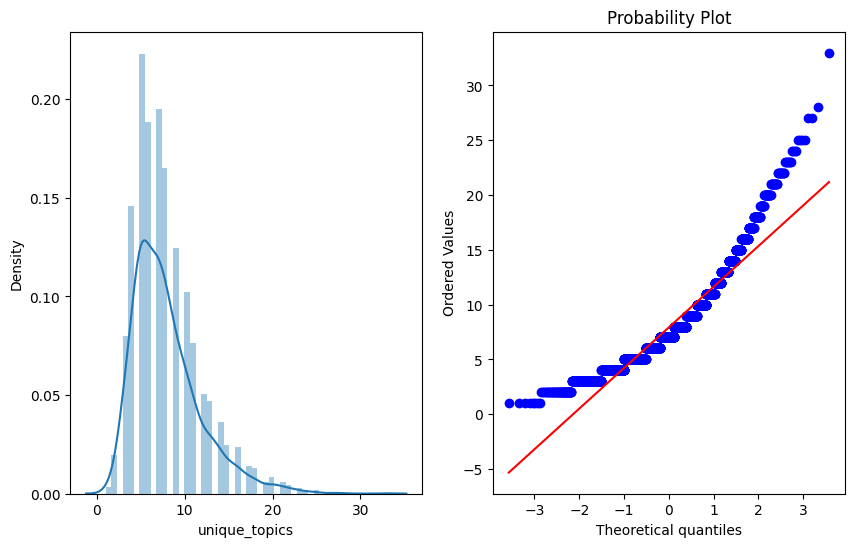

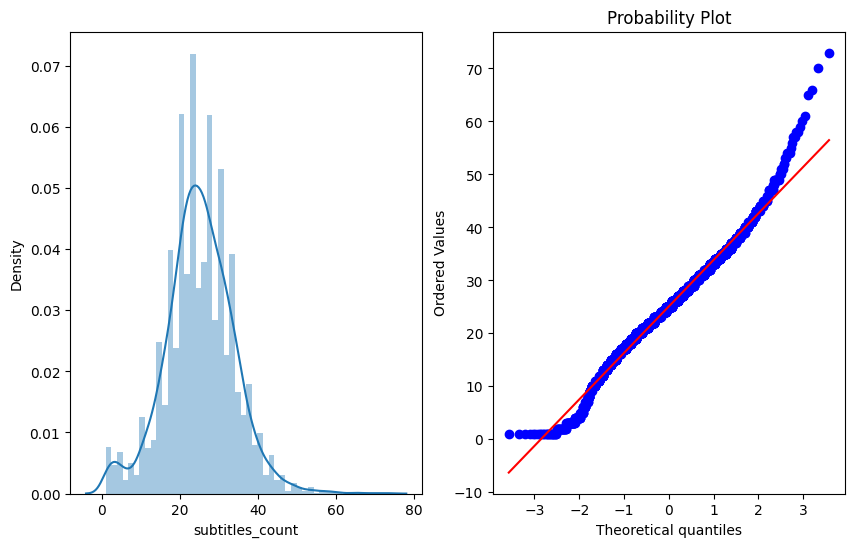

In [ ]:
for column in DF:
  to_plot(column)

Before Transformation


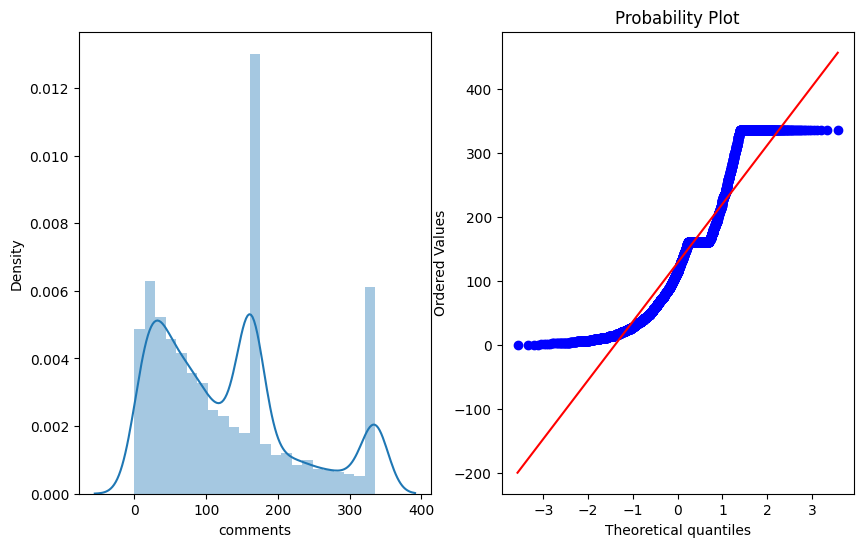

After Transformation


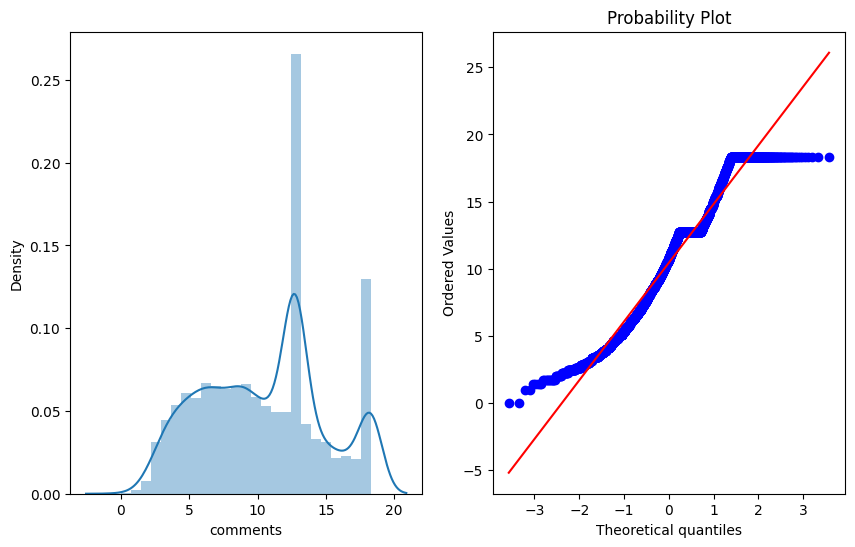

Before Transformation


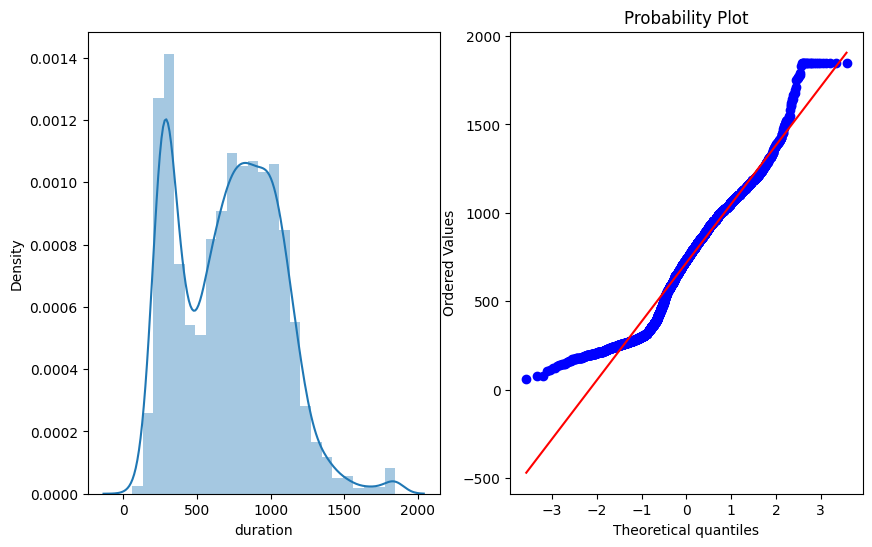

After Transformation


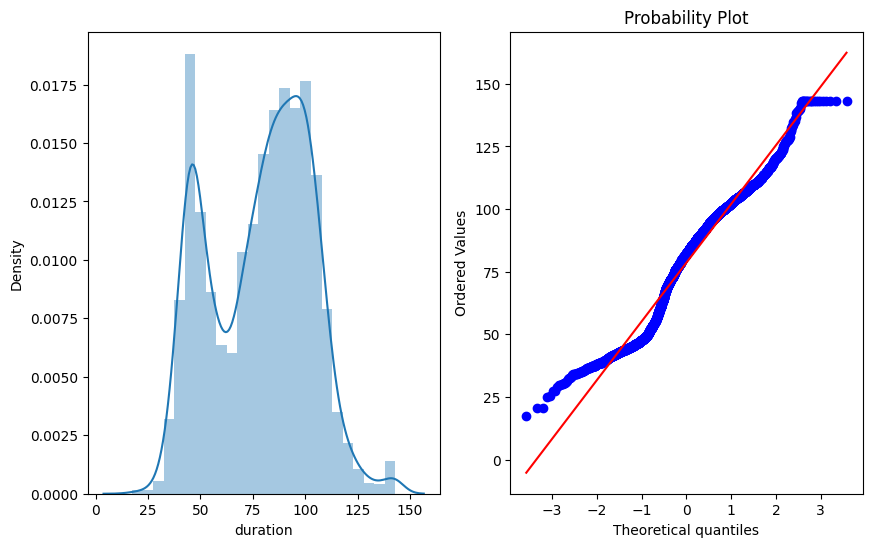

Before Transformation


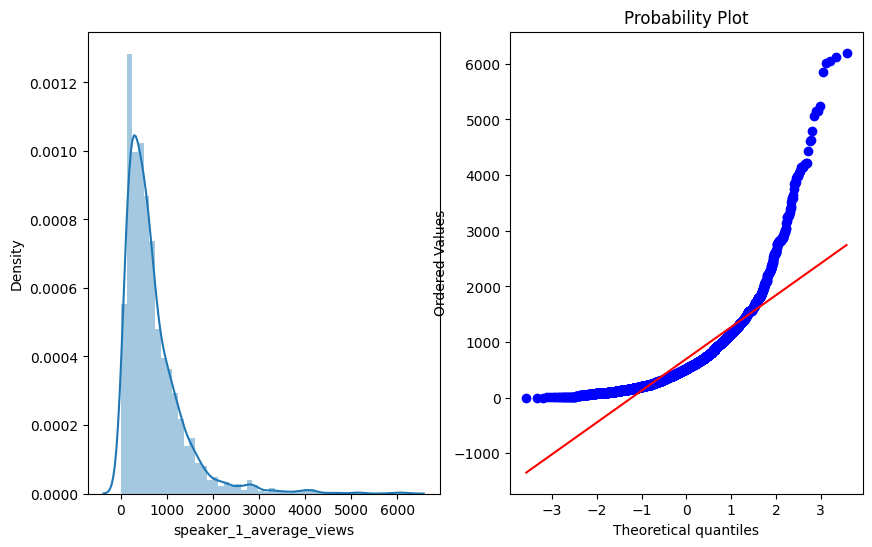

After Transformation


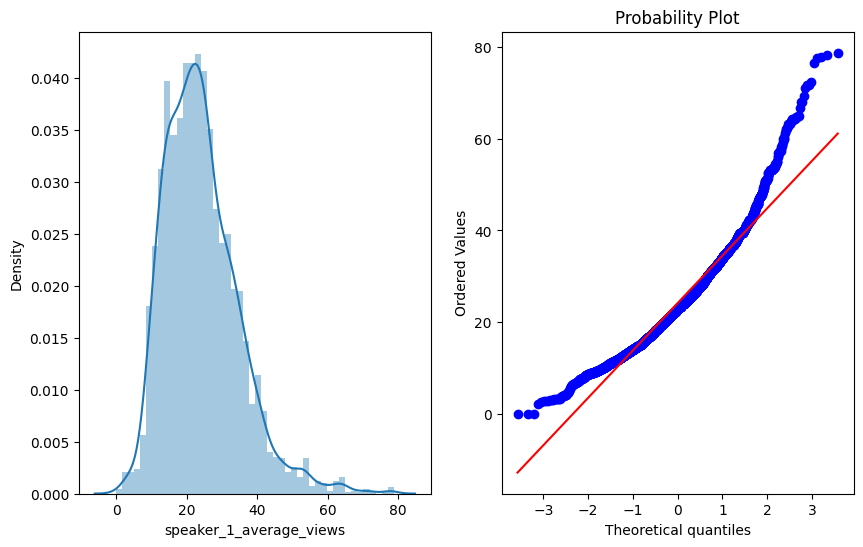

Before Transformation


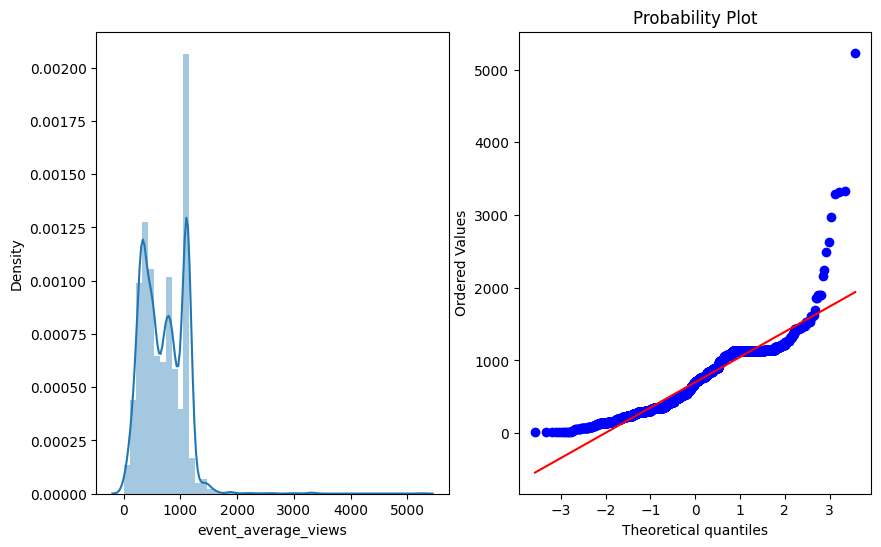

After Transformation


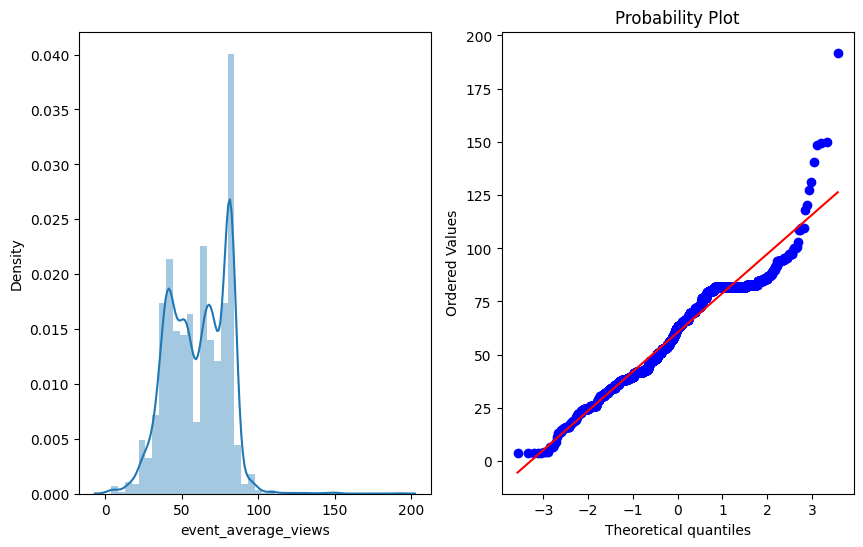

Before Transformation


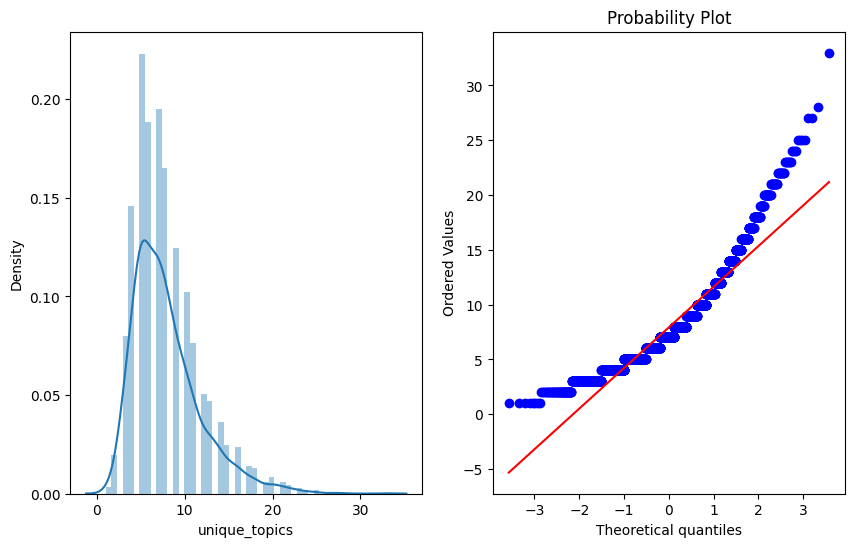

After Transformation


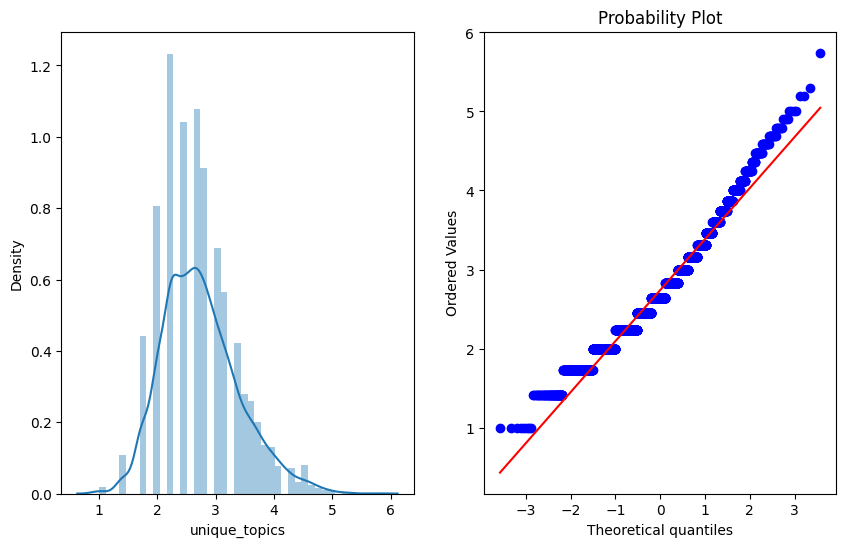

In [ ]:

square_root_transform('comments')
box_cox_transform('duration')

square_root_transform('speaker_1_average_views')
box_cox_transform('event_average_views')

square_root_transform('unique_topics')



After applying the transformation and treating with VIF factor checking again for correlation.

In [ ]:
DF.head()
#Which does not contain categorical and dependent variable


comments    duration  video_age  speaker_1_average_views  \
0  16.492423   97.610498       6308                21.673782   
1  11.135529  115.142920       6308                21.995241   
2  14.798649  105.741599       6308                18.701790   
3   6.928203  110.344336       6295                13.659161   
4  18.330303   98.509736       6295                27.388214   

   event_average_views  topics_wise_avg_views  unique_topics  subtitles_count  
0            41.990286                  573.0       3.000000               43  
1            41.990286                  531.0       3.000000               26  
2            41.990286                  570.0       3.000000               35  
3            41.990286                  565.0       2.236068               19  
4            41.990286                  704.0       3.000000               31

In [ ]:
corr = DF.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
DF.drop('event_average_views',axis=1,inplace=True)
#Strong correlation
DF.drop('topics_wise_avg_views',axis=1,inplace=True)
DF.drop('subtitles_count',axis=1,inplace=True)


In [ ]:
corr = DF.corr()
corr.style.background_gradient(cmap='coolwarm')

We saw that event wise average views a=were highly correlated wih speaker average views, so we tried dropping that out.

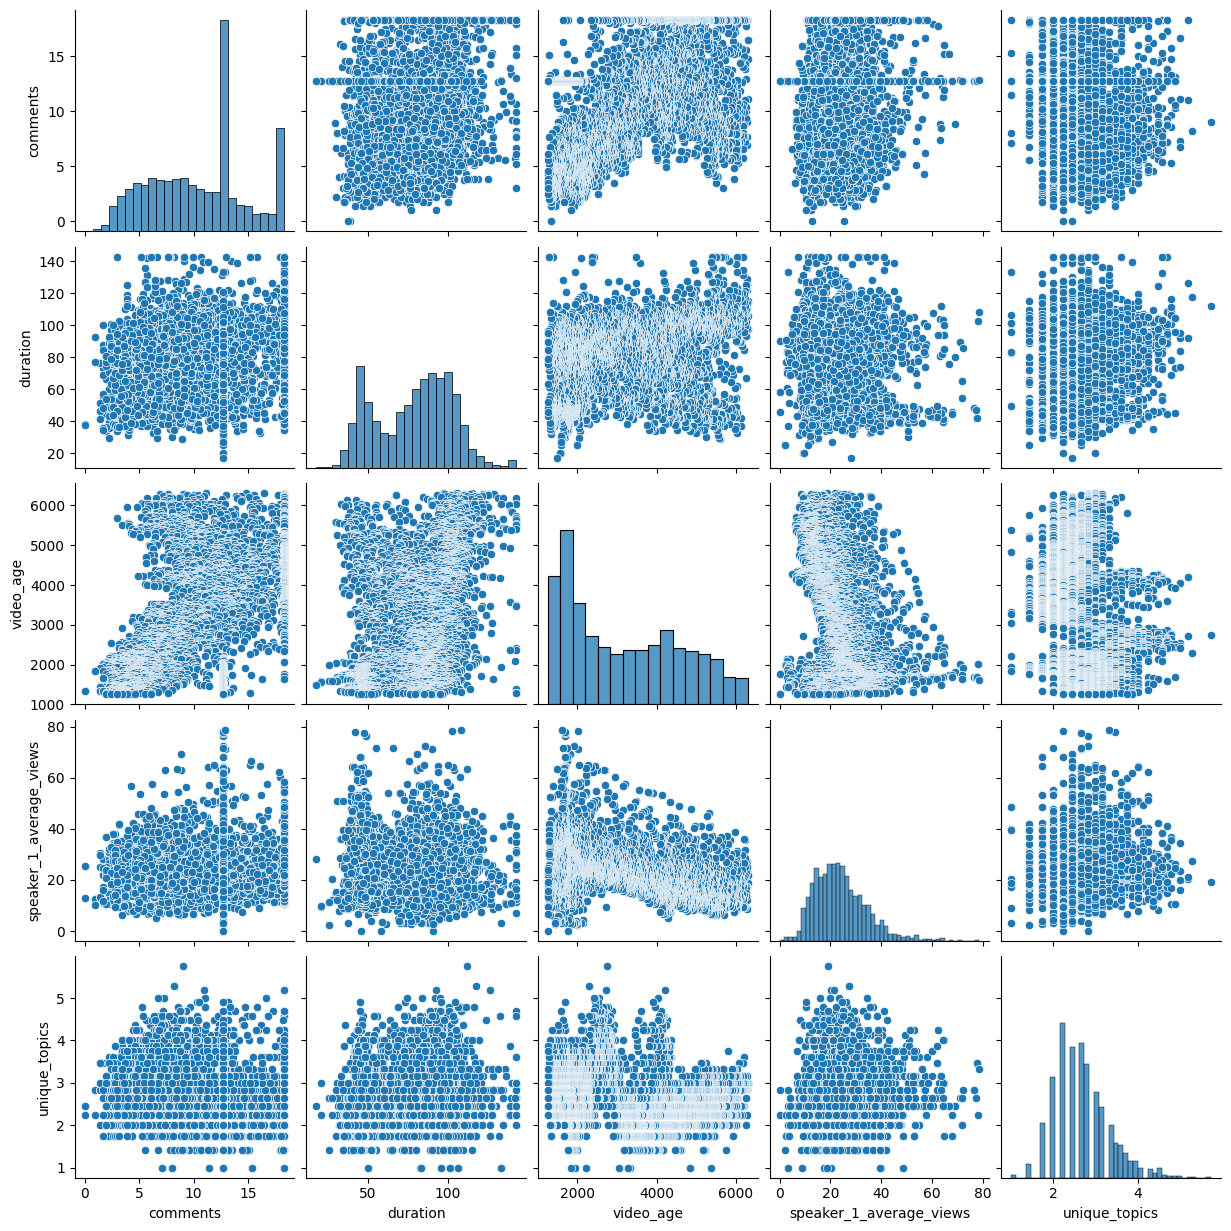

In [ ]:
p = sns.pairplot(DF)

Just tring to visualize the DF after treating eith correlation and transformation.

##**One hot Encoding**

DF contains only the numeric columns, so we merge it with the categorical column. And we use One hot encoding to use the categorical columns in a better way.

In [ ]:
DF.columns

Index(['comments', 'duration', 'video_age', 'speaker_1_average_views',
       'unique_topics'],
      dtype='object')

In [ ]:
features_df = DF.copy()

In [ ]:
features_df['release_day'] = df['release_day']
features_df['release_month'] = df['release_month']
features_df['release_year'] = df['release_year']

In [ ]:
features_df.head(2)

comments    duration  video_age  speaker_1_average_views  unique_topics  \
0  16.492423   97.610498       6308                21.673782            3.0   
1  11.135529  115.142920       6308                21.995241            3.0   

  release_day release_month  release_year  
0     Tuesday          June          2006  
1     Tuesday          June          2006

In [ ]:
features_df = pd.get_dummies(features_df, columns=['release_day', 'release_month', 'release_year'])

In [ ]:
features_df.head(2)

comments    duration  video_age  speaker_1_average_views  unique_topics  \
0  16.492423   97.610498       6308                21.673782            3.0   
1  11.135529  115.142920       6308                21.995241            3.0   

   release_day_Friday  release_day_Monday  release_day_Saturday  \
0                   0                   0                     0   
1                   0                   0                     0   

   release_day_Sunday  release_day_Thursday  ...  release_year_2011  \
0                   0                     0  ...                  0   
1                   0                     0  ...                  0   

   release_year_2012  release_year_2013  release_year_2014  release_year_2015  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   

   release_year_2016  release_year_2017  release_year_2018  release_year_2019  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   

   release_year_2020  
0                  0  
1                  0  

[2 rows x 39 columns]

##**Min max scaler**

Now everythin is done except normalization, we need to have the dat in same standards to get optimized results for the models. So we use Min max scaler

In [ ]:
#Min max scaler


column_names = list(features_df.columns)
# column_names

#taking columns to do the minmaxscaling
DF_scaled = pd.DataFrame()
#using standardization as both numeric columns are in different scale

scaler = MinMaxScaler()
scaled = scaler.fit_transform(features_df)
#print(scaled)
DF_scaled = pd.DataFrame(scaler.fit_transform(features_df))
DF_scaled.columns = column_names

In [ ]:

DF_scaled.head()

comments  duration  video_age  speaker_1_average_views  unique_topics  \
0  0.899735  0.638816   1.000000                 0.275262       0.421535   
1  0.607493  0.778386   1.000000                 0.279344       0.421535   
2  0.807332  0.703545   1.000000                 0.237517       0.421535   
3  0.377964  0.740186   0.997429                 0.173474       0.260523   
4  1.000000  0.645974   0.997429                 0.347836       0.421535   

   release_day_Friday  release_day_Monday  release_day_Saturday  \
0                 0.0                 0.0                   0.0   
1                 0.0                 0.0                   0.0   
2                 0.0                 0.0                   0.0   
3                 0.0                 1.0                   0.0   
4                 0.0                 1.0                   0.0   

   release_day_Sunday  release_day_Thursday  ...  release_year_2011  \
0                 0.0                   0.0  ...                0.0   
1                 0.0                   0.0  ...                0.0   
2                 0.0                   0.0  ...                0.0   
3                 0.0                   0.0  ...                0.0   
4                 0.0                   0.0  ...                0.0   

   release_year_2012  release_year_2013  release_year_2014  release_year_2015  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   
4                0.0                0.0                0.0                0.0   

   release_year_2016  release_year_2017  release_year_2018  release_year_2019  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   
4                0.0                0.0                0.0                0.0   

   release_year_2020  
0                0.0  
1                0.0  
2                0.0  
3                0.0  
4                0.0  

[5 rows x 39 columns]

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3945 entries, 0 to 3944
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   comments                 3945 non-null   float64
 1   duration                 3945 non-null   float64
 2   video_age                3945 non-null   int64  
 3   speaker_1_average_views  3945 non-null   float64
 4   unique_topics            3945 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 154.2 KB


In [ ]:
#DF = DF[['comments', 'duration','speaker_1_average_views','unique_topics']]

# **Dependednt variable**

All the normalization and transformations were done only for the independent variables. Now we try doing the same for dependent variable as well to get better result for our model

In [ ]:
df['views_per_day'].describe()

count    3945.000000
mean      696.510493
std       721.475277
min         0.000000
25%       245.295281
50%       486.834008
75%       905.688616
max      7042.738334
Name: views_per_day, dtype: float64

In [ ]:
# Transforming dependent variable

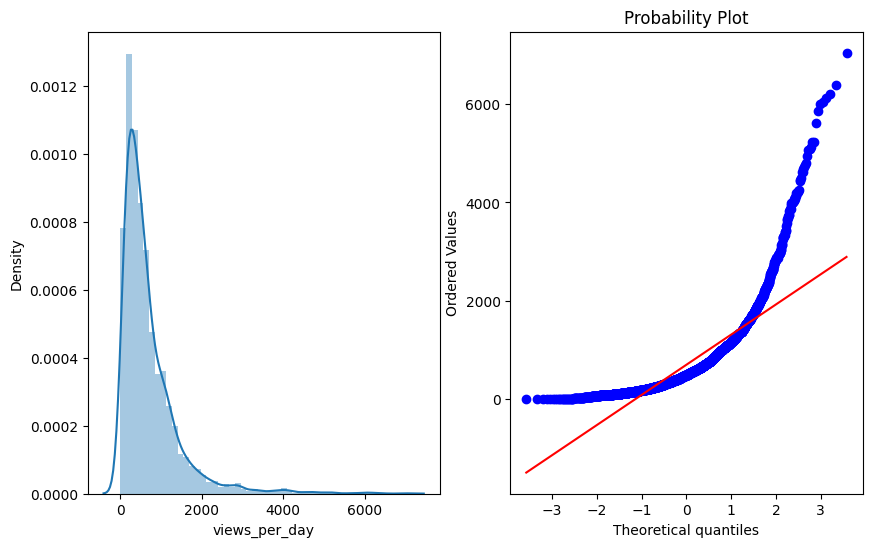

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.distplot(df['views_per_day'])
plt.subplot(1,2,2)
stats.probplot(df['views_per_day'],dist='norm',plot=pylab)
plt.show()

In [ ]:

def plot_(col):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  sns.distplot(col)
  plt.subplot(1,2,2)
  stats.probplot(col,dist='norm',plot=pylab)
  plt.show()


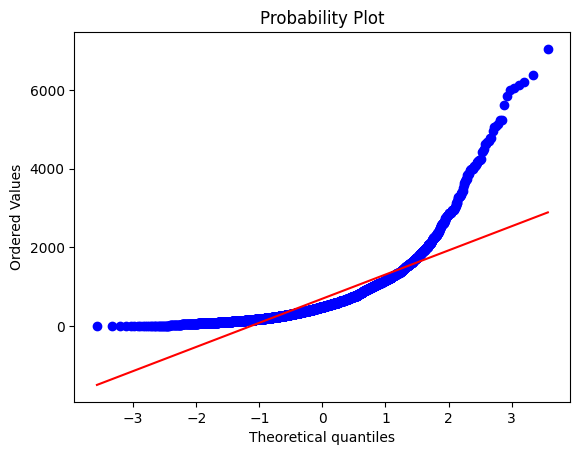

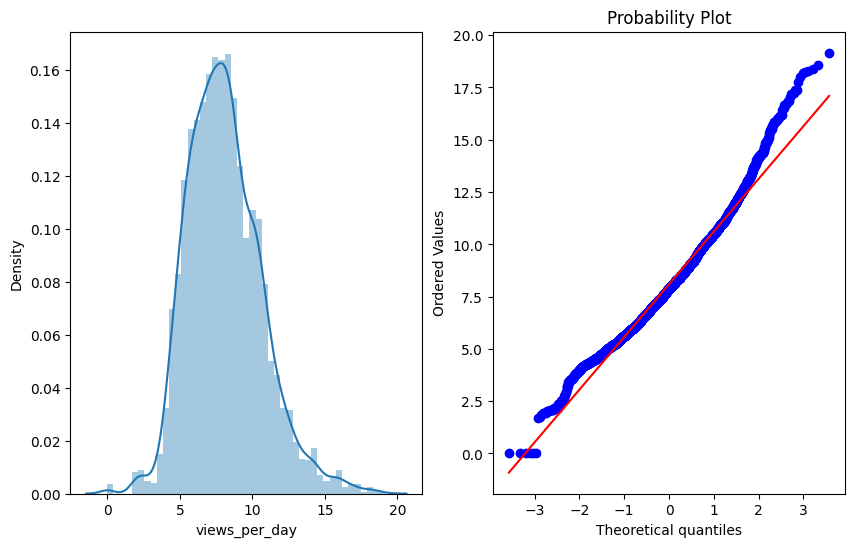

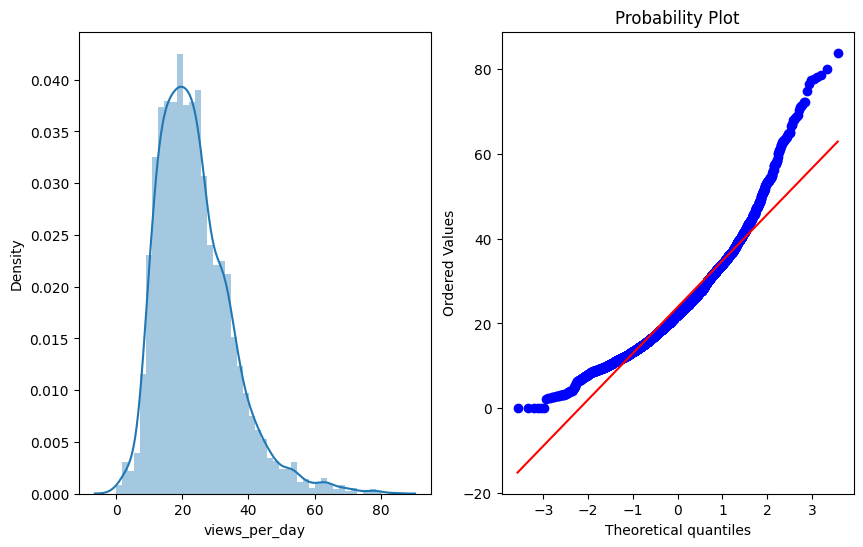

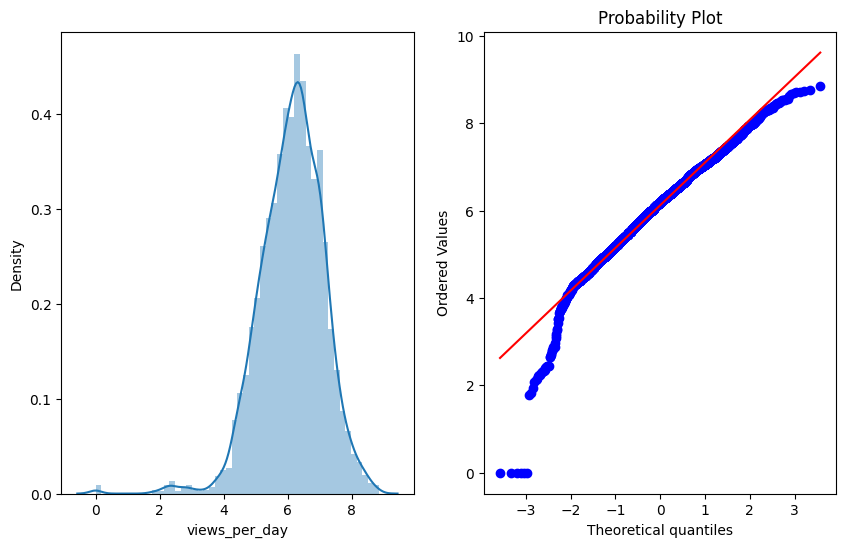

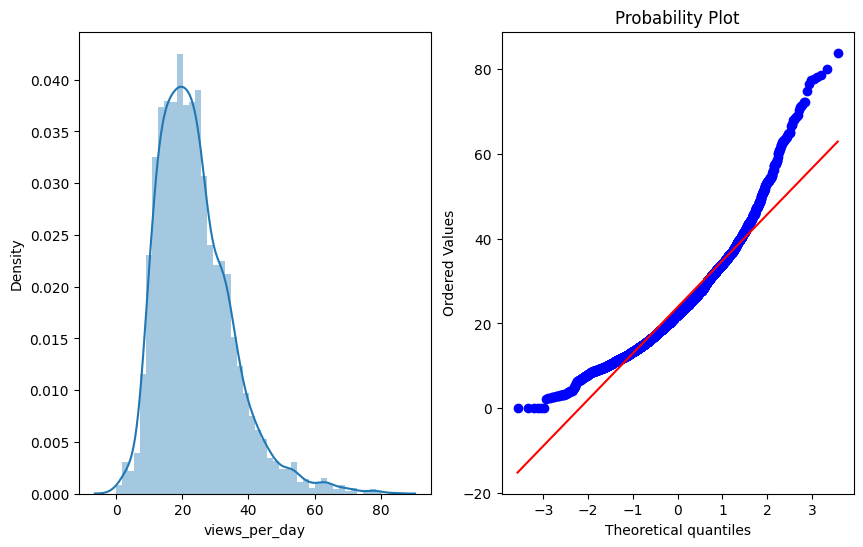

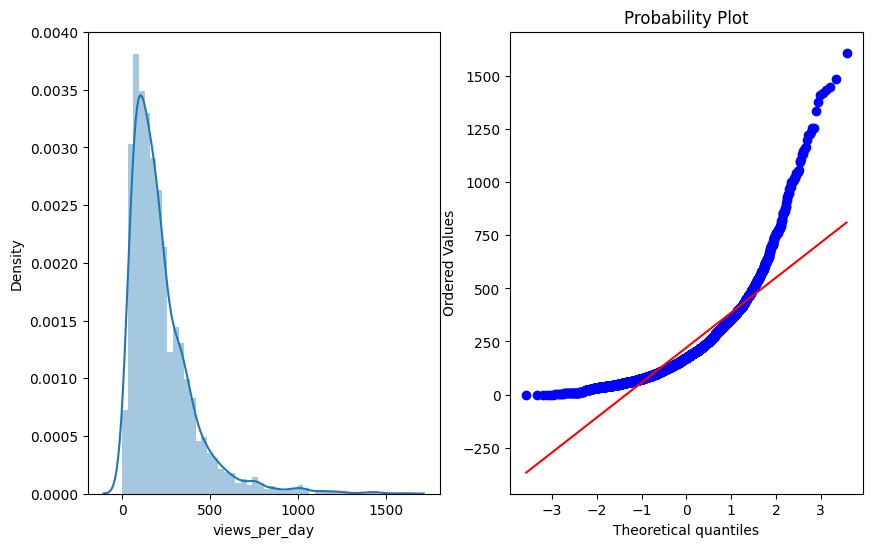

In [ ]:
stats.probplot(df['views_per_day'],dist='norm',plot=pylab)
y1 = np.power(df['views_per_day'],1/3)
plot_(y1)
y2=np.power(df['views_per_day'],1/2)
plot_(y2)
y3=np.log1p(df['views_per_day'])
plot_(y3)
#y4=stats.boxcox(df['views_per_day'])
y5=df['views_per_day']**(1/2)
plot_(y5)
y6=df['views_per_day']**(1/1.2)
plot_(y6)




In [ ]:
# df['views_per_day'] = np.power(df['views_per_day'],1/3)
# plot_(df['views_per_day'])

Now our our data is all set to build model. Before that lets just do the train and test split.

# **Train and test split**

We have already taken the dependent variable seperately, lets just equate it into y and X has ll the indeoendent variables.

In [ ]:
df.head(2)
y = y1
X = DF_scaled

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y,  test_size= 0.25, random_state= 0)



#**Model building**

In [ ]:
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble


In [ ]:
def Calculating_errors(y_train,y_pred_train,y_test,y_test_pred):
  MSE_test  = mean_squared_error(y_test, y_test_pred)
  print("MSE on test is" ,MSE_test)
  MSE_train  = mean_squared_error(y_train, y_pred_train)
  print("MSE on train is" ,MSE_train)
  RMSE_test = np.sqrt(MSE_test)
  print("RMSE on test is" ,RMSE_test)
  RMSE_train = np.sqrt(MSE_train)
  print("RMSE on train is" ,RMSE_train)
  print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred_train)))
  print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))


# **Linear regression**

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(f"The r2 score for testing is {round(r2_score(y_test,lin_reg.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,lin_reg.predict(X_train)),4)}")

The r2 score for testing is 0.8654
The r2 score for training is 0.8485


In [ ]:
y_pred_train_reg =lin_reg.predict(X_train)
y_test_pred_reg = lin_reg.predict(X_test)


In [ ]:
Calculating_errors(y_train,y_pred_train_reg,y_test,y_test_pred_reg)

# **Regularized linear regression**

In [ ]:
!pip install catboost
!pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.model_selection import train_test_split,GridSearchCV
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,VotingRegressor,StackingRegressor


In [ ]:
elastic_param = {'alpha' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                 'l1_ratio' : [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
                }

In [ ]:
elastic_grid = GridSearchCV(estimator=ElasticNet(),
                       param_grid = elastic_param,n_jobs=9,
                       cv = 5, verbose=2, scoring='r2')
elastic_grid.fit(X_train,y_train)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=9,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 1]},
             scoring='r2', verbose=2)

In [ ]:
optimal_elastic = elastic_grid.best_estimator_

In [ ]:
print(f"The r2 score for testing is {round(r2_score(y_test,optimal_elastic.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,optimal_elastic.predict(X_train)),4)}")

The r2 score for testing is 0.8662
The r2 score for training is 0.8484


In [ ]:
y_pred_train_ela = optimal_elastic.predict(X_train)
y_test_pred_ela = optimal_elastic.predict(X_test)

In [ ]:
Calculating_errors(y_train,y_pred_train_ela,y_test,y_test_pred_ela)

MSE on test is 0.89392030915027
MSE on train is 0.9719911757323366
RMSE on test is 0.9454735898745507
RMSE on train is 0.9858961282672413
Training MAE: 0.53
Test MAE: 0.53


# **Optimal Random forest**

In [ ]:
rf_param = {
            'n_estimators':[100,250,500],
            'max_depth':[2,4,5,6],
            'max_leaf_nodes':[150]
           }

In [ ]:
rf_grid = GridSearchCV(estimator=RandomForestRegressor(),
                       param_grid = rf_param,n_jobs=9,
                       cv = 5, verbose=2, scoring='r2')
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=9,
             param_grid={'max_depth': [2, 4, 5, 6], 'max_leaf_nodes': [150],
                         'n_estimators': [100, 250, 500]},
             scoring='r2', verbose=2)

In [ ]:
optimal_rf = rf_grid.best_estimator_

In [ ]:
print(f"The r2 score for testing is {round(r2_score(y_test,optimal_rf.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,optimal_rf.predict(X_train)),4)}")

The r2 score for testing is 0.862
The r2 score for training is 0.8738


In [ ]:
y_train_pred_optimal_rf = optimal_rf.predict(X_train)
y_test_pred_optimal_rf = optimal_rf.predict(X_test)

In [ ]:
Calculating_errors(y_train,y_train_pred_optimal_rf,y_test,y_test_pred_optimal_rf)

MSE on test is 0.921942907357617
MSE on train is 0.8092882436594716
RMSE on test is 0.9601785809721112
RMSE on train is 0.899604492907562
Training MAE: 0.43
Test MAE: 0.47


# **CatBoost** **Regression**

In [ ]:
cat_reg = CatBoostRegressor()
cat_reg.fit(X_train,y_train)

Learning rate set to 0.048596
0:	learn: 2.4474029	total: 50.3ms	remaining: 50.2s
1:	learn: 2.3639858	total: 55.5ms	remaining: 27.7s
2:	learn: 2.2838888	total: 60.2ms	remaining: 20s
3:	learn: 2.2083575	total: 64.7ms	remaining: 16.1s
4:	learn: 2.1352048	total: 70.8ms	remaining: 14.1s
5:	learn: 2.0689020	total: 76.5ms	remaining: 12.7s
6:	learn: 2.0037966	total: 81.9ms	remaining: 11.6s
7:	learn: 1.9424769	total: 87.1ms	remaining: 10.8s
8:	learn: 1.8837427	total: 92.5ms	remaining: 10.2s
9:	learn: 1.8275955	total: 97.6ms	remaining: 9.67s
10:	learn: 1.7747508	total: 103ms	remaining: 9.24s
11:	learn: 1.7247093	total: 108ms	remaining: 8.88s
12:	learn: 1.6796200	total: 113ms	remaining: 8.57s
13:	learn: 1.6319318	total: 118ms	remaining: 8.32s
14:	learn: 1.5922404	total: 127ms	remaining: 8.33s
15:	learn: 1.5509281	total: 131ms	remaining: 8.05s
16:	learn: 1.5135249	total: 136ms	remaining: 7.88s
17:	learn: 1.4770707	total: 142ms	remaining: 7.72s
18:	learn: 1.4410507	total: 147ms	remaining: 7.59s
19:

In [ ]:
print(f"The r2 score for testing is {round(r2_score(y_test,cat_reg.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,cat_reg.predict(X_train)),4)}")

The r2 score for testing is 0.8748
The r2 score for training is 0.9622


In [ ]:
y_train_pred_cat = cat_reg.predict(X_train)
y_test_pred_cat = cat_reg.predict(X_test)

In [ ]:
Calculating_errors(y_train,y_train_pred_cat,y_test,y_test_pred_cat)

MSE on test is 0.8362696639849793
MSE on train is 0.2420795327280517
RMSE on test is 0.9144778094546523
RMSE on train is 0.4920157850395165
Training MAE: 0.30
Test MAE: 0.52


# **Optimal** **catboost** **regressor**

In [ ]:
cat_param = {'depth': [2,4,5],
             'learning_rate' : [0.01,0.05,0.1],
             'iterations'    : [150,200]
            }

In [ ]:
ct_grid = GridSearchCV(estimator=cat_reg,
                       param_grid = cat_param,n_jobs=9,
                       cv = 5, verbose=2, scoring='r2')

In [ ]:
ct_grid.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 2.3590663	total: 6.21ms	remaining: 1.24s
1:	learn: 2.2034002	total: 10.5ms	remaining: 1.03s
2:	learn: 2.0698169	total: 14.3ms	remaining: 940ms
3:	learn: 1.9570891	total: 18.2ms	remaining: 891ms
4:	learn: 1.8353382	total: 22ms	remaining: 859ms
5:	learn: 1.7269902	total: 25.9ms	remaining: 837ms
6:	learn: 1.6340666	total: 33.6ms	remaining: 926ms
7:	learn: 1.5519557	total: 37.1ms	remaining: 891ms
8:	learn: 1.4811878	total: 39.8ms	remaining: 844ms
9:	learn: 1.4161050	total: 43.7ms	remaining: 830ms
10:	learn: 1.3614396	total: 50.7ms	remaining: 870ms
11:	learn: 1.3112552	total: 52.2ms	remaining: 818ms
12:	learn: 1.2636142	total: 53.5ms	remaining: 769ms
13:	learn: 1.2234480	total: 54.7ms	remaining: 726ms
14:	learn: 1.1873347	total: 55.9ms	remaining: 689ms
15:	learn: 1.1552724	total: 57.6ms	remaining: 663ms
16:	learn: 1.1294391	total: 77.2ms	remaining: 831ms
17:	learn: 1.1058825	total: 88.6ms	remaining: 896ms
18:	learn: 1.08

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x79357343b160>,
             n_jobs=9,
             param_grid={'depth': [2, 4, 5], 'iterations': [150, 200],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='r2', verbose=2)

In [ ]:
optimal_cat = ct_grid.best_estimator_

In [ ]:
print(f"The r2 score for testing is {round(r2_score(y_test,optimal_cat.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,optimal_cat.predict(X_train)),4)}")

The r2 score for testing is 0.8779
The r2 score for training is 0.9141


In [ ]:
y_train_pred_optcat = optimal_cat.predict(X_train)
y_test_pred_optcat = optimal_cat.predict(X_test)

In [ ]:
Calculating_errors(y_train,y_train_pred_optcat,y_test,y_test_pred_optcat)

MSE on test is 0.8158042169178287
MSE on train is 0.5510247126138488
RMSE on test is 0.9032188089924992
RMSE on train is 0.7423103883240816
Training MAE: 0.41
Test MAE: 0.50


# **XG** **Boost** **Regression**

In [ ]:
xgb_reg = XGBRegressor()

In [ ]:
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
print(f"The r2 score for testing is {round(r2_score(y_test,xgb_reg.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,xgb_reg.predict(X_train)),4)}")

The r2 score for testing is 0.8529
The r2 score for training is 0.9908


In [ ]:
y_train_pred_xgb = xgb_reg.predict(X_train)
y_test_pred_xgb = xgb_reg.predict(X_test)

In [ ]:
Calculating_errors(y_train,y_train_pred_xgb,y_test,y_test_pred_xgb)

MSE on test is 0.9826964383953871
MSE on train is 0.0589862160197366
RMSE on test is 0.9913104651900873
RMSE on train is 0.24287078049805952
Training MAE: 0.15
Test MAE: 0.58


# **Optimaized XGboost**

In [ ]:
xgb_param = {'n_estimators': [50,100,150,200],
            'max_depth': [2,4,5,10],
            'learning_rate':[0.01,0.05,0.1]
            }

In [ ]:
xgb_grid = GridSearchCV(estimator=xgb_reg,
                       param_grid = xgb_param,n_jobs=9,
                       cv = 5, verbose=2, scoring='r2')

In [ ]:
xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=9,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 4, 5, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='r2', verbose=2)

In [ ]:
optimal_xgb = xgb_grid.best_estimator_

In [ ]:
print(f"The r2 score for testing is {round(r2_score(y_test,optimal_xgb.predict(X_test)),4)}")
print(f"The r2 score for training is {round(r2_score(y_train,optimal_xgb.predict(X_train)),4)}")

The r2 score for testing is 0.8711
The r2 score for training is 0.9262


In [ ]:
y_train_pred_optxgb = optimal_xgb.predict(X_train)
y_test_pred_optxgb = optimal_xgb.predict(X_test)

In [ ]:
Calculating_errors(y_train,y_train_pred_optxgb,y_test,y_test_pred_optxgb)

MSE on test is 0.8614061313411745
MSE on train is 0.47323500106019634
RMSE on test is 0.9281196751180176
RMSE on train is 0.6879207810934311
Training MAE: 0.38
Test MAE: 0.51


# **LGBM**

In [ ]:
lgbm_reg = LGBMRegressor()
lgbm_reg.fit(X_train,y_train)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1109
[LightGBM] [Info] Number of data points in the train set: 2958, number of used features: 39
[LightGBM] [Info] Start training from score 8.059060


LGBMRegressor()

In [ ]:
r2_score(y_train,lgbm_reg.predict(X_train))

0.9460515462797081

In [ ]:
r2_score(y_test,lgbm_reg.predict(X_test))

0.874180317847298

In [ ]:
y_train_pred_lgbm = lgbm_reg.predict(X_train)
y_test_pred_lgbm = lgbm_reg.predict(X_test)

In [ ]:
Calculating_errors(y_train,y_train_pred_lgbm,y_test,y_test_pred_lgbm)

MSE on test is 0.8405276163733262
MSE on train is 0.3459184074983219
RMSE on test is 0.9168029321360868
RMSE on train is 0.5881482869976941
Training MAE: 0.34
Test MAE: 0.51


# **Optimal LGBM**

In [ ]:
lgbm_param = {
              "n_estimators" :[50,100,150],
              'num_leaves': [6,8,12,16],
              "max_depth": [2,4,5],
              "learning_rate": [0.01,0.05,0.1]
              }

In [ ]:
lgbm_grid = GridSearchCV(estimator=lgbm_reg,
                       param_grid = lgbm_param,n_jobs=6,
                       cv = 5, verbose=2, scoring='r2')

In [ ]:
lgbm_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1109
[LightGBM] [Info] Number of data points in the train set: 2958, number of used features: 39
[LightGBM] [Info] Start training from score 8.059060
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=6,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 4, 5], 'n_estimators': [50, 100, 150],
                         'num_leaves': [6, 8, 12, 16]},
             scoring='r2', verbose=2)

In [ ]:
lgbm_optimal = lgbm_grid.best_estimator_

In [ ]:
r2_score(y_test,lgbm_optimal.predict(X_test))

0.8769937874077111

In [ ]:
r2_score(y_train,lgbm_optimal.predict(X_train))

0.895376209493276

In [ ]:
y_train_pred_lgbm_optimal = lgbm_optimal.predict(X_train)
y_test_pred_lgbm_optimal = lgbm_optimal.predict(X_test)

In [ ]:
Calculating_errors(y_train,y_train_pred_lgbm_optimal,y_test,y_test_pred_lgbm_optimal)

MSE on test is 0.8217324738098368
MSE on train is 0.6708495332631045
RMSE on test is 0.9064946077113955
RMSE on train is 0.8190540478278002
Training MAE: 0.42
Test MAE: 0.48


**CONCLUSION**


After comparing all the models we can conclude that Optimal Random Forest  is the best performer.